In [1]:
import pandas as pd
df = pd.read_json(r"data\0_9999_v3.json")
# Sort the DataFrame to prioritize non-zero 'D' values
df_sorted = df.sort_values(by='label', ascending=False)

# Remove duplicates based on columns 'A', 'B', and 'C'
df_no_duplicates = df_sorted.drop_duplicates(subset=['assumptions', 't0', 't1'], keep='first') # Keep the first occurrence which is annotated after sorting.



df.shape, df_no_duplicates.shape

((4572, 6), (4572, 6))

In [2]:
df_no_duplicates_sorted = df_no_duplicates.sort_values(by='id', ascending=True)
df_no_duplicates_sorted.head()

,id,category,assumptions,t0,t1,label
4562,1,2,\textrm{wahr},\left| \begin{array}{cc}a + 7& 7\\2& 4\end{arr...,"4\,(a + 7) + 2 \cdot 7 = -4",0
849,2,1,\textrm{wahr},"(2\,x + 4)\,(2\,x-4)","4\,x-16",26
848,3,1,\textrm{wahr},"(3\,n-4\,k)\,(3\,n + 4\,k)","9\,n^{2}-16\,k",26
4561,4,1,\textrm{wahr},"-4\,l\,b + \frac{4\,b^{2}}{b^{2}-l\,b}","\frac{4\,(b^{2}-l\,b)}{b^{2}-l\,b}",0
3250,5,1,\textrm{wahr},"-\frac{4\,l\,b}{b^{2}-l\,b} + \frac{4\,b^{2}}{...","-4\,l\,b + \frac{4\,b^{2}}{b^{2}-l\,b}",0


In [3]:
df_no_duplicates_sorted.to_json('0_9999_v4.json', orient='records', lines=True)

In [5]:
df.head()


,id,category,assumptions,t0,t1,label
0,1,2,\textrm{wahr},\left| \begin{array}{cc}a + 7& 7\\2& 4\end{arr...,"4\,(a + 7) + 2 \cdot 7 = -4",0
1,2,1,\textrm{wahr},"(2\,x + 4)\,(2\,x-4)","4\,x-16",26
2,3,1,\textrm{wahr},"(3\,n-4\,k)\,(3\,n + 4\,k)","9\,n^{2}-16\,k",26
3,4,1,\textrm{wahr},"-4\,l\,b + \frac{4\,b^{2}}{b^{2}-l\,b}","\frac{4\,(b^{2}-l\,b)}{b^{2}-l\,b}",0
4,5,1,\textrm{wahr},"-\frac{4\,l\,b}{b^{2}-l\,b} + \frac{4\,b^{2}}{...","-4\,l\,b + \frac{4\,b^{2}}{b^{2}-l\,b}",0


: 

In [27]:
import re
from IPython.display import display, Latex

def has_math_expression(text):
    """
    Function to check if a given text contains a math expression

    """
 # Remove LaTeX formatting like '\,' and handle spaces between terms
    cleaned_text = re.sub(r'\\[a-zA-Z]+\s*', '', text)  # Remove LaTeX commands (e.g. '\,', '\cdot')
    
    # Remove excessive spaces
    cleaned_text = re.sub(r'\s+', '', cleaned_text)  # Remove all spaces
    
    # Regex pattern for detecting expressions of the form (x+y)(z+s)
    PatternTwoParenthese =    r"\(([^()]+?)[\+\-]([^()]+?)\)\\?,?[\*\s]*\(([^()]+?)[\+\-]([^()]+?)\)"   # need to clean the Latex text before searching for this regex
    PatternTwoParenthese2 =   r"\(([^()\\{}]+?|\s*\\frac\s*\{[^{}]+\}\s*\{[^{}]+\}\s*)[\+\-]([^()\\{}]+?|\s*\\frac\s*\{[^{}]+\}\s*\{[^{}]+\}\s*)\)[\*\s]*\(([^()\\{}]+?|\s*\\frac\s*\{[^{}]+\}\s*\{[^{}]+\}\s*)[\+\-]([^()\\{}]+?|\s*\\frac\s*\{[^{}]+\}\s*\{[^{}]+\}\s*)\)"
    PatternTwoParentheses3 =  r"\\left\(\s*([^()]+?)\s*(?:\+|-)\s*([^()]+?)\s*\\right\)\s*(?:\*|\s|)\s*\\left\(\s*([^()]+?)\s*(?:\+|-)\s*([^()]+?)\s*\\right\)"
    PatternTwoParentheses4 =   r"\)\s*[\.\(]"
    # Regex pattern for detecting expressions of two solutions separated by a logical OR (v)
    PatternTwoSolutions =     r"\\left\(\s*([a-zA-Z]+)\s*=\s*([^\)]+)\s*\\right\)\s*\\vee\s*\\left\(\s*([a-zA-Z]+)\s*=\s*([^\)]+)\s*\\right\)" # need to clean the Latex text before searching for this regex
    MyPatternTwoSolutions=    r"\(([^()]+?)[\=]([^()]+?)\)\\?\s*\\vee\s*,?\(([^()]+?)[\=]([^()]+?)\)"
    MyPatternTwoSolutions2 =  r"\\left\(\s*([^()]+?)\s*=\s*([^()]+?)\s*\\right\)\s*\\vee\s*\\left\(\s*([^()]+?)\s*=\s*([^()]+?)\s*\\right\)"
    patternTwoSol =           r"\\left\(\s*.*?\\sqrt\{.*?\}\s*\\right\)\s*\\vee\s*\\left\(\s*.*?\\sqrt\{.*?\}\s*\\right\)"
    patternTwoSol2 = r"\\vee"

    # Regex pattern for detecting expressions of the form (x+/-y)^2
    patternBinomFraction =    r"\\left\(\s*([^(){}]+?)[\+\-]\s*\\frac\{([^{}]+)\}\{([^{}]+)\}\s*\\right\)\^\{2\}"
    patternBinom =            r"\\left\(\s*([^(){}]+?)\s*[\+\-]\s*([^(){}]+?)\s*\\right\)\^\{2\}"

    # Regex pattern for detecting expressions of the form factor multiplying by a paranthess, a(y+z)
    PatternOneParenthese =    r"([a-zA-Z0-9\\]+)\s*\\,\s*\(\s*([^()]+?)\s*[\+\-]\s*([^()]+?)\s*\)"
    PatternOneParenthese2 =   r"\(\s*([^()]+?)\s*[\+\-]\s*([^()]+?)\s*\)\\,\s*([a-zA-Z0-9\\]+)"

    # Regex pattern for detecting expressions of the form (x<=y)^(z>=s)
    PatternTwoRanges =        r"\\wedge"

    # Search for matches
    matches1 = bool(re.search(PatternTwoParenthese, cleaned_text)) # need to clean the text before searching for this regex
    matches11 = bool(re.search(PatternTwoParenthese2, text)) 
    matches111 = bool(re.search(PatternTwoParentheses3, text))
    matches1111 = bool(re.search(PatternTwoParentheses4, text))
    matches2 = bool(re.search(patternBinomFraction, text))
    matches3 = bool(re.search(  patternBinom, text))
    matches4 = bool(re.search(  PatternOneParenthese, text))
    matches44 = bool(re.search(  PatternOneParenthese2, text))
    matches5  = bool(re.search(PatternTwoSolutions, cleaned_text)) # need to clean the text before searching for this regex
    matches55 = bool(re.search(MyPatternTwoSolutions, text))
    matches555 = bool(re.search(MyPatternTwoSolutions2, text))
    matches5555 = bool(re.search(patternTwoSol, text))
    matches55555 = bool(re.search(patternTwoSol2, text))
    matches6 = bool(re.search(PatternTwoRanges, text))

    
    
#    Return True if any match is found, else False
    res ="None"
    if matches1 or matches11 or matches111:
        res = "Two Parentheses"
   
    if matches2:
        res = "Binom Fraction"
    
    if matches3:
        res = "Binom"
    if matches4 or matches44:
        res = "One Parentheses"
    
    if matches5 or matches55 or matches555 or matches5555:
        res = "Two Solutions"
    
    if matches6 :#or matches66 or matches666666 or matches66666 or matches6666 or matches666:
        res = "Two Ranges"
    
    
    return res
    

In [28]:
# Initialize lists for each class
two_parentheses_list = []
binom_fraction_list = []
binom_list = []
one_parentheses_list = []
two_solutions_list = []
two_ranges_list = []

# Loop over df_no_duplicates and add the id to the corresponding list
for _, item in df_no_duplicates.iterrows():
    result = has_math_expression(item['t0'])
    if result == "Two Parentheses":
        two_parentheses_list.append(item['id'])
    elif result == "Binom Fraction":
        binom_fraction_list.append(item['id'])
    elif result == "Binom":
        binom_list.append(item['id'])
    elif result == "One Parentheses":
        one_parentheses_list.append(item['id'])
    elif result == "Two Solutions":
        two_solutions_list.append(item['id'])
    elif result == "Two Ranges":
        two_ranges_list.append(item['id'])

# Print the lists
print("Two Parentheses List:", two_parentheses_list)
print("Binom Fraction List:", binom_fraction_list)
print("Binom List:", binom_list)
print("One Parentheses List:", one_parentheses_list)
print("Two Solutions List:", two_solutions_list)
print("Two Ranges List:", two_ranges_list)

Two Parentheses List: [3, 2, 25, 28, 42, 47, 153, 160, 200, 204, 213, 223, 342, 468, 469, 490, 523, 547, 552, 610, 629, 641, 699, 708, 922, 1068, 1088, 1089, 1122, 1123, 1124, 1125, 1126, 1127, 1130, 1131, 1132, 1153, 1232, 1242, 1249, 1277, 1373, 1426, 1560, 1625, 1661, 1663, 1665, 1686, 1756, 1828, 1905, 1918, 1987, 1990, 1991, 2157, 2160, 2164, 2173, 2179, 2180, 2183, 2213, 2261, 2265, 2268, 2269, 2271, 2280, 2398, 2403, 2405, 2469, 2470, 2471, 2504, 2506, 2508, 2646, 2853, 2919, 3020, 3030, 3082, 3084, 3089, 3110, 3112, 3203, 3283, 3284, 3404, 3488, 3490, 3492, 3494, 3646, 3661, 3666, 3670, 3683, 3796, 3829, 3833, 3890, 3891, 3917, 3920, 3931, 3941, 3944, 4099, 4115, 4198, 4362, 4366, 4390, 4498, 4523, 4526, 4532, 4535, 4540, 4541, 4542, 4651, 4672, 4719, 4727, 4819, 4957, 4958, 4981, 4986, 5001, 5005, 5011, 5018, 5203, 5209, 5233, 5235, 5917, 6145, 6146, 6149, 6624, 6646, 6947, 7482, 7486, 8910, 8912, 8914, 8915, 9054, 9056, 9064, 9131, 9154, 9168, 9176, 9564, 9598, 9602, 9603, 96

In [8]:
# Print the lists
print("Two Parentheses List:", two_parentheses_list)
print("Binom Fraction List:", binom_fraction_list)
print("Binom List:", binom_list)
print("One Parentheses List:", one_parentheses_list)
print("Two Solutions List:", two_solutions_list)
print("Two Ranges List:", two_ranges_list)

Two Parentheses List: [1430, 1560, 923, 922, 342, 1686, 629, 1232, 1276, 1090, 1089, 1068, 160, 223, 1277, 1918, 1661, 1665, 1828, 1663, 1242, 1905, 43, 213, 469, 468, 610, 641, 1990, 1991, 1987, 25, 28, 200, 153, 1625, 204, 490, 523, 552, 1249, 549, 1373, 699, 250, 3, 2, 1123, 1124, 1125, 1126, 1127, 47, 1132, 1756, 1122, 1130, 1131, 1153, 1174]
Binom Fraction List: [1342, 1284, 1732, 1309, 1333, 877, 1476, 305, 1546, 811, 1320, 1729, 1724, 1262, 1802, 1810, 1279, 515, 1283, 907, 890, 1854, 1721, 1731, 1289, 1273, 1253, 1250, 189, 1790, 167, 443, 442, 1244, 1256, 1458, 1291, 1545, 449, 959, 1295, 1812, 590, 592, 588, 366, 361, 363, 1257, 1543, 891, 464, 1134, 1135, 1491, 1482, 450, 1489, 1490, 774, 1806, 1261, 1502]
Binom List: [1794, 724, 1083, 1789, 730, 725, 722, 726, 1087, 717, 848, 868, 509, 818, 507, 1317, 731, 1816, 1596, 256, 6, 642, 648, 743, 134, 133, 856, 435, 436, 1312, 1316, 513, 1459, 1299, 1300, 736, 969, 1033, 1032, 1034, 597, 729, 1082, 1078, 864, 474, 141, 135, 1425,

In [9]:
for _, item in df_no_duplicates.iterrows():

        display(Latex(f"${item['t0']}$"),Latex(f"${item['t1']}$"))
        
        print( item['id'],  item['t0'], has_math_expression(item['t0']), '-----------------')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
1974 \left( x = -1\right) \vee \left( \left( x = 2\right) \vee \left( x = 0\right)\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
1972 \left( x = -1\right) \vee \left( \left( x = 2\right) \vee \left( x = 0\right)\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
1966 \left( x = -1\right) \vee \left( \left( x = 2\right) \vee \left( x = 0\right)\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1763 2\,x = \frac{-5}{a-1} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
1768 2\,x\,(a-1) = -5 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1769 2\,x = \frac{-5}{a-1} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1746 \frac{2}{x-3} + \frac{4}{x + 2} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1237 -25\,m^{2} + 10\,m + 15 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1233 -25\,m + 10\,m + 15 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1290 \left( t-\frac{7}{2} = +0.5\right) \vee \left( t-\frac{7}{2} = -0.5\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1230 \left( \left|x + \frac{p}{2}\right|  = \sqrt{\left( \frac{p}{2}\right)^{2}-q}\right) \wedge \left( \left|x + \frac{p}{2}\right|  = -\sqrt{\left( \frac{p}{2}\right)^{2}-q}\right) None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1767 \left|x + 3\right|  < 2 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1510 \frac{-6\,x-7}{2\,x-9}\ge 7 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1766 \left|x + 3\right|  < 2 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1848 q-4 > -q + 3\,m None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1840 2\,r + 3\ge 3\,r-y None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1843 -r\le -y-3 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1841 2\,r + 3\ge 3\,r-y None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1837 a + 3 > 2\,a + 4\,m None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1847 2\,q < 3\,m + 4 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1844 4\,n > -5\,t-4 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1933 w^{2} + \frac{11}{10}\,w + \frac{3}{10} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1657 z^{2}-\frac{1}{4}\,z-\frac{3}{4} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1839 \left( b + 2 = -\sqrt{9}\right) \vee \left( b + 2 = \sqrt{9}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1829 20\,k^{2} = 25 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1664 l^{2}-\frac{11}{6}\,l + \frac{2}{3} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1456 p^{2}-9\,p + \left( \frac{9}{2}\right)^{2}-\left( \frac{9}{2}\right)^{2} + 20 = o None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1449 p^{2}-4\,p + 4-4 + 4 = o None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1466 h^{2}-\frac{3}{2}\,h-\frac{1}{2} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1924 \left( x = \frac{-2\,o + \sqrt{20^{2}-4 \cdot 9 \cdot 6}}{2 \cdot 9}\right) \vee \left( x = \frac{-20-\sqrt{20^{2}-4 \cdot 9 \cdot 6}}{2 \cdot 9}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1517 x \cdot 2 + p\,x + \left( \frac{p}{2}\right)^{2}-\frac{p}{2} + q = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1254 b-\frac{3}{2} = +\sqrt{\frac{1}{4}}\,b-\frac{3}{2} = -\sqrt{\frac{1}{4}} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1356 -5 = \frac{4\,x-2}{x-1} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
1430 (-4\,p-5)\,(3\,p + 5) = o Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1409 x^{2} + 2\,\frac{p}{2}\,x + \left( \frac{p}{2}\right)^{2} = \left( \frac{p}{2}\right)^{2}\,q None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1342 \left( c + \frac{9}{2}\right)^{2}-\frac{81}{4} + \frac{8\,o}{4} = 0 Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1867 x^{2}-x-12 = o None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1265 -k + 1 = 5\,k + 2-k + 1 = 5\,k + 2 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1274 \left( t^{2}-\frac{7}{2}\right)^{2} = \frac{1}{4} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
1560 -\frac{-x-3}{(x-2)\,(x + 3)} + \frac{2\,x-4}{(x-2)\,(x + 3)} = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1284 t^{2}-7\,t + \left( -\frac{7}{2}\right)^{2} = \frac{1}{x} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1791 x + \frac{p}{2} = +(-\sqrt{\left( \frac{p}{2}\right)^{2}-q}) None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1732 \left|\left( x + \frac{p}{2}\right)^{2}\right|  = \sqrt{\left( \frac{p}{2}\right)^{2}-q} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1045 x^{2} \cdot 3\,x + 2\,x + 6 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1662 u^{2}-\frac{14}{15} + \frac{8}{15} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1673 h^{2} + \frac{4}{5}-\frac{1}{5} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1332 \left( x + \frac{b}{2\,a} = -\sqrt{\frac{b^{2}-4\,a\,c}{2\,a}}\right) \vee \left( x + \frac{b}{2\,a} = \sqrt{\frac{b^{2}-4\,a\,c}{2\,a}}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
1046 (x + 3)\,x\,(x + 2) = 0 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1222 x^{2}\,p\,x + q = o None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1054 -3\,x-3-x + 2 = o None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1069 2\,m + 5 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1771 \left( v = \frac{1}{3}-\sqrt{-\frac{1}{3} + \frac{3}{9}}\right) \vee \left( v = \frac{1}{3} + \sqrt{-\frac{1}{3} + \frac{3}{9}}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1521 a\,x + b\,x = -c None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1523 +b\,x + c = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
1794 \left( s + 2\right)^{2} = 1 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1322 -\frac{3}{x + 1} + \frac{4}{x-1} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1016 10\,b^{2}-13\,b + 4 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1319 \frac{1}{x-2}-\frac{2}{x-3} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1467 -20\,h^{2}-30\,h-10 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1004 \frac{2}{x} = -\frac{1}{x} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
724 \left( a + 4\right)^{2} = -1 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1948 \left( -4\,k + 1 = -13\right) \vee \left( -4\,k + 1 = 13\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

154 +5\,g^{2} + 13\,g + 6 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
1083 \left( y-5\right)^{2} = 17 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
1789 \left( h-2.5\right)^{2}-1.75 = 0 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
730 \left( a + 4\right)^{2} = 1 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
725 \left( a + 4\right)^{2} = 1 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
722 \left( a + 4\right)^{2} = -31 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

728 a + 4 = \sqrt{1} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
726 \left( a + 4\right)^{2} = -3 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

203 -8\,s = -r-2 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

207 3\,r + 2 = 2\,x None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
619 \frac{2\,(x + 1)}{x-1\,(x + 1)} + \frac{2\,(x-1)}{x + 1\,(x-1)} = 0 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
561 \left( k = 2.5 + \sqrt{\frac{25}{4}-4}\right) \vee \left( k = 2.5-\sqrt{\frac{25}{4}-4}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
542 \left( p = -\frac{3.5}{2} + \sqrt{\left( \frac{3.5}{2}\right)^{2}-2.5}\right) \vee \left( p = -\frac{3.5}{2}-\sqrt{\left( \frac{3.5}{2}\right)^{2}-2.5}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
Two Solutions
525 \left( b = \frac{7}{12} + \sqrt{\left( -\frac{7}{12}\right)^{2} + \frac{5}{6}}\right) \vee \left( b = \frac{7}{12}-\sqrt{\left( -\frac{7}{12}\right)^{2} + \frac{5}{6}}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1445 2\,z + 2 = 6\,y None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

327 6\,u-5 = -5\,q None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

329 6\,u-5 = -5\,q None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

297 3\,c + 4 = -c-1\,\left|+c\right| -4 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

330 \frac{6\,u-5}{-5} = q None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

325 -5\,a + 2 = 4\,p None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1438 r^{2}-5\,r + 6.25 = -4 + 6.25 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1439 r^{2}-5\,r + 6.25 = -4 + 6.25 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
981 \left( a = -\frac{7}{2}-\frac{1}{2}\right) \vee \left( a = -\frac{7}{2} + \frac{1}{2}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

248 \left( 2\,x = 1\right) \wedge \left( 4\,x = -5\right) None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
982 \left( a = -\frac{7}{2}-\frac{1}{2}\right) \vee \left( a = -\frac{7}{2} + \frac{1}{2}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
988 \left( a = -\frac{-4}{2}-\sqrt{\left( \frac{-4}{2}\right)^{2}-(-5)}\right) \vee \left( a = -\frac{-4}{2} + \sqrt{\frac{-4}{2}-(-5)}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1835 b^{2}-4\,b + 2^{2}-2^{2}-5 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
1422 \left( s = \frac{34}{30} + \sqrt{\left( \frac{34}{30}\right)^{2}-1}\right) \vee \left( s = \frac{34}{30}-\sqrt{\left( \frac{34}{30}\right)^{2}-1}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
566 \left( k = 2.5 + \sqrt[25]{2}\right) \vee \left( k = 2.5-\sqrt{2.25}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
565 \left( k = 2.5 + \sqrt{\frac{9}{4}}\right) \vee \left( k = 2.5-\sqrt{\frac{9}{4}}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
915 \left( n = \frac{-9 + \sqrt{9^{2}-4}\,(-12) + 3}{2\,(-12)}\right) \vee \left( n = \frac{-9-\sqrt{9^{2}-4}\,(-12)\,(+3)}{2\,(-12)}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1309 \left( a-\frac{9}{2}\right)^{2} = \frac{81}{4}-20 Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

344 -4\,m = -4 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1999 -8\,z^{2} = -8 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1444 -2 + 2 = 4\,y-2\,z None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
1087 \left( m + 2\right)^{2} = 6 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
737 \left( q-1 = -\sqrt{2}\right) \vee \left( q-1 = \sqrt{2}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
563 \left( k = 2.5 + \sqrt{\frac{9}{4}}\right) \vee \left( k = 2.5-\sqrt{\frac{9}{4}}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
559 \left( k = -\frac{-5}{2} + \sqrt{\left( \frac{-5}{2}\right)^{2}-4}\right) \vee \left( k = -\frac{-5}{2}-\sqrt{\left( \frac{-5}{2}\right)^{2}-4}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1070 3\,m + 5 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
717 \left( a + 4\right)^{2} = -11 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1073 3\,x + 9 = -x + 3 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
Two Solutions
1708 \left( x = -\frac{1}{3} + \sqrt{\left( -\frac{1}{3}\right)^{2}} + \frac{3}{9}\right) \vee \left( x = -\frac{1}{3}-\sqrt{\left( -\frac{1}{3}\right)^{2}} + \frac{3}{9}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

230 \left( 2\,x = 1\right) \wedge \left( 4\,x = -5\right) None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

20 u^{2}-4\,u-1\,u + 4 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1333 \sqrt{\left( x + \frac{p}{2}\right)^{2}} = \sqrt{-q + \left( \frac{p}{2}\right)^{2}} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1238 q = 1 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1753 w = \frac{9}{7} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1897 \left( q-4 = 9\right) \vee \left( q-4 = -9\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1917 q^{2} + \frac{5}{4}\,q + \frac{6}{4} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
877 \left( x + \frac{b}{2\,a}\right)^{2} = \frac{b^{2}-4\,a\,c}{4\,a^{2}} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1076 x = 5 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
848 \left( 2\,a\,x + b\right)^{2} = b^{2}-4\,a\,c Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1227 \left|x + \frac{p}{2}\right| ^{2} = \left( \frac{p}{2}\right)^{2}-q None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
868 \sqrt{\left( n-3\right)^{2}} = \sqrt{1} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1037 \frac{4}{x + 2} + \frac{3}{x-3} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1042 \left( 2\,a\,x + b = \sqrt{b^{2}-4\,a\,c}\right) \vee \left( 2\,a\,x + b = -\sqrt{b^{2}-4\,a\,c}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1074 x = -3 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

842 t^{2}-4\,t + 4 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

838 t^{2}-4\,t + 4 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1902 x\le -2 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

839 t^{2}-4\,t + 4 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

840 t^{2}-4\,t + 4 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

437 \frac{3}{x + 3}-\frac{2}{x-2} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1240 q = -1 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1969 \left( p = -2-\sqrt{17}\right) \vee \left( p = -2 + \sqrt{17}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1476 \sqrt{\left( x + \frac{p}{2}\right)^{2}} = \sqrt{\left( \frac{p}{2}\right)^{2}-q} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
509 \left( x + 2.5\right)^{2} = 2.5^{2}-4 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1266 p = -8 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
818 \left( 2\,a\,x + b\right)^{2} = b^{2}-4\,a\,c Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
1263 \left( m = -\frac{3}{5}\right) \vee \left( m = 1\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
507 \left( g + 2.5\right)^{2} = 2.5^{2}-6 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
1317 \left( c + 1\right)^{2} = 4 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
305 \left( h-\frac{7}{2}\right)^{2}-\frac{9}{4} = 0 Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1546 \sqrt{\left( z + \frac{7}{2}\right)^{2}} = \sqrt{\frac{1}{4}} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
466 \left( 2\,a\,x + b = -\sqrt{-4\,a\,c + b^{2}}\right) \vee \left( 2\,a\,x + b = \sqrt{-4\,a\,c + b^{2}}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
711 1 = \frac{4\,(x-2)}{x-1} One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1817 h-1 = -\sqrt{7}\,o\,d\,e\,r\,h-1 = \sqrt{7} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1818 h = 1-\sqrt{7}\,o\,d\,e\,r\,h = 1 + \sqrt{7} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
811 \left( x + \frac{p}{x}\right)^{2} = \left( \frac{p}{2}\right)^{2}-q Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
731 \left( a + 4\right)^{2} = 1 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1711 v^{2}-\frac{6}{9}\,v-\frac{3}{9} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
1605 x\,(1 + 2\,a) = -4 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1715 v^{2}-\frac{6}{9}\,v-\frac{3}{9} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1320 \left( f-\frac{7}{2}\right)^{2} = \frac{1}{4} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1729 \sqrt{\left( x + \frac{p}{2}\right)^{2}} = \sqrt{\left( \frac{p}{2}\right)^{2}-q} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1724 \sqrt{\left( x + \frac{p}{2}\right)^{2}} = \sqrt{\left( \frac{p}{2}\right)^{2}-q} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1335 \frac{1}{x + 2}-\frac{5}{x-3} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

993 \frac{5}{x + 2}-\frac{5}{x-1} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1668 x^{2} + x-2 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
1816 \left( h-1\right)^{2} = 7 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1334 \frac{1}{x + 2}-\frac{5}{x-3} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
1596 \left( y + 3.5\right)^{2}-0.25 = 0 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
1754 x\,(1-4\,a) = -3 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
1863 (1 + 4\,a)\,x = -7 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
1896 \left( y = 11\right) \vee \left( y = -5\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1419 n^{2}-4\,n-5 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

846 4\,a^{2}\,x^{2} + 4\,a\,b\,x = -4\,a\,c None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

847 \left( 2\,a\,x\right)^{2} + 2 \cdot 2\,a\,x\,b + b^{2} = b^{2}-a\,c None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

769 -2 = \frac{-5\,x-5}{x-2} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1262 \left( x-\frac{3}{2}\right)^{2} = \frac{1}{4} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
767 -2 = \frac{-5\,(x + 1)}{x-2} One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1802 \left( x + \frac{p}{2}\right)^{2}-\left( \frac{p}{2}\right)^{2} + q = 0 Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

881 44\,m^{2} = -20 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

880 12\,m^{2} + 32\,m + 20 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1830 20\,k^{2}-5\,k-25 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1759 u^{2} + 3\,u = 4 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1757 u^{2}-4 = -3\,u None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Ranges
1954 \left( x\ge -\frac{\sqrt{13} + 1}{2}\right) \wedge \left( x\le \frac{\sqrt{13} + 1}{2}\right) Two Ranges -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1251 -5 + 4 = -s + 1 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1475 2\,x = -1 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

954 x-1-\frac{5\,x + 5}{4} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

952 4\,x-4-\frac{5\,x + 5}{4} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1270 \left( 2\,a\,x = -b\,\sqrt{b^{2}-4\,a\,c}\right) \vee \left( 2\,a\,x = -b-\sqrt{b^{2}-4\,a\,c}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1520 8\,w = 3\,t-4 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1539 -5\,f-4 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1096 \sqrt{-2\,x + 8} = x None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1311 2\,d^{2}-10\,d + 12 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1003 \frac{4}{x + 2} = -\frac{3}{x-3} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

909 2\,a = -5 + h None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
1832 k\,(20\,k-5)-25 = 0 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
923 \frac{4\,x-12 + 3\,x + 6}{(x + 2)\,(x-3)} = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
922 (-d + 3)\,(2\,d + 3) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1540 -f-1 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Ranges
1958 \left( x\ge -\frac{\sqrt{13} + 1}{2}\right) \wedge \left( x\le \frac{\sqrt{13} + 1}{2}\right) Two Ranges -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
1217 -4\,(c^{2} + 7\,c-10) = 0 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

653 \frac{2\,x-2}{x + 2} + 2 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

692 \frac{4}{x + 3} + \frac{1}{x-3} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

691 \frac{4}{x + 3} + \frac{1}{x-3} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

658 \frac{3\,x-9}{x + 1}-5 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

654 \frac{2\,x-2}{x + 2} + 2 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

522 \frac{2}{x-1}-\frac{5}{x-3} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

524 \frac{2}{x-2} + \frac{1}{x-1} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

976 \frac{2}{x-3}-\frac{4}{x + 1} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

977 2-\frac{4}{x + 1} = x-3 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1368 -\frac{4}{x-2} = \frac{5}{x-1} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1364 \frac{4}{x-2} = \frac{5}{x-1} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

660 \frac{2}{x-3} + \frac{4}{x-2} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

951 \frac{x-1}{5}-\frac{x + 1}{4} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

655 \frac{2\,x-2}{x + 2} + 2 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1021 h^{2} + 4\,h + 2^{2}-2^{2} = -3 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1810 \sqrt{\left( x + \frac{p}{2}\right)^{2}} = \sqrt{\left( \frac{p}{2}\right)^{2}-q} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
1221 \left( x + \frac{p}{2} = +\sqrt{-q + \left( \frac{p}{2}\right)^{2}}\right) \vee \left( x + \frac{p}{2} = -\sqrt{-q + \left( \frac{p}{2}\right)^{2}}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
775 \left( x + \frac{p}{2} = \sqrt{\left( \frac{p}{2}\right)^{2}-q}\right) \vee \left( x + \frac{p}{2} = -\sqrt{\left( \frac{p}{2}\right)^{2}-q}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1080 p^{2} + 5\,p + 4 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

694 \left|x + \frac{p}{2}\right|  = \sqrt{-q + \left( \frac{p}{2}\right)^{2}} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1024 h^{2} + 4\,h + 2^{2}-2^{2} = -3 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1813 x + \frac{p}{2} = \sqrt{\left( \frac{p}{2}\right)^{2}-q} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
604 \left( g_1 = \frac{6}{2} + \sqrt{\left( \frac{6}{2}\right)^{2}-8}\right) \vee \left( g_2 = \frac{6}{2}-\sqrt{\left( \frac{6}{2}\right)^{2}-8}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

605 g^{2} + 6\,g + 8 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
256 \left( w + 3\right)^{2} = 4 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1696 \left( x = -\frac{1}{3} + \sqrt{\frac{1}{9} + \frac{3}{9}}\right) \vee \left( x = -\frac{1}{3}-\sqrt{\frac{1}{9} + \frac{3}{9}}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1699 x = -\frac{1}{3} + \sqrt{\frac{1}{9} + \frac{3}{9}}\,x = -\frac{1}{3}-\sqrt{\frac{1}{9} + \frac{3}{9}} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1695 \left( x = -\frac{1}{3} + \sqrt{\frac{1}{9} + \frac{3}{9}}\right) \vee \left( x = -\frac{1}{3}-\sqrt{\frac{1}{9} + \frac{3}{9}}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

348 \sqrt{m^{2}} = \sqrt{1} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
342 (m-1)\,(-4\,m-4) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

926 a = -5 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

928 -a^{2}-10\,a-25 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

341 -4\,m_2 + 4 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
824 \left( x + \frac{p}{2} = +\sqrt{\left( \frac{p}{2}\right)^{2}-q}\right) \vee \left( x + \frac{p}{2} = -\sqrt{\left( \frac{p}{2}\right)^{2}-q}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1995 8\,z^{2} + 16\,z + 8 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1271 \left( 2\,a\,x = -b + \sqrt{b^{2}-4\,a\,c}\right) \vee \left( 2\,a\,x = -b-\sqrt{b^{2}-4\,a\,c}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1269 \left( 2\,a\,x + b = \sqrt{b^{2}-4\,a\,c}\right) \vee \left( 2\,a\,x + b = -\sqrt{b^{2}-4\,a\,c}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1279 t^{2}-7\,t + \left( -\frac{7}{2}\right)^{2} = \frac{49}{4}-12 Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1554 5\,h = 7\,s-2 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

810 x^{2} + p\,x + \left( \frac{p}{x}\right)^{2}-\left( \frac{p}{x}\right)^{2} + q = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

488 x^{2} + 2\,\frac{p}{2}\,x + \left( \frac{p}{2}\right)^{2} = -q + \left( \frac{p}{2}\right)^{2} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1553 5\,h = 1\,s-2 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
515 \left( x + \frac{b}{2\,a}\right)^{2} = \left( \frac{b}{2\,a}\right)^{2}-\frac{c}{a} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1283 t^{2}-7\,t + \left( -\frac{7}{2}\right)^{2} = \frac{49}{4}-\frac{48}{4} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1982 5\,c < -g + 3 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
One Parentheses
1916 -\frac{3\,(x-1)}{(x + 1)\,(x-1)} + \frac{2\,(x + 1)}{(x-1)\,(x + 1)} = 0 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
662 \left( n-4 = -\sqrt{23}\right) \vee \left( n-4 = \sqrt{23}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

46 z^{2} + 3\,z + z + 4 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

990 -\frac{1}{x + 1}-\frac{3}{x-2} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
907 \left( x + \frac{b}{2\,a}\right)^{2} = \frac{b^{2}-4\,a\,c}{4\,a^{2}} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1414 x + \frac{p}{2} = -\sqrt{\left( \frac{p}{2}\right)^{2}-q} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1346 x + \frac{p}{2} = -q + \left( \frac{p}{2}\right)^{2} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1358 -\frac{4}{x + 2} + \frac{2}{x-2} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1913 -\frac{3}{x-3}-\frac{4}{x-1} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1911 a\,x^{2} + b\,x + c = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

663 \frac{-5\,x-15}{x-1} + 2 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

178 -\frac{2}{x + 1} = \frac{1}{x + 2} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

667 \frac{-5\,x-15}{x-1} + 2 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
491 -\frac{3\,(x + 2)}{x + 3}-3 = 0 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

489 -\frac{3}{x + 3}-\frac{3}{x + 2} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
890 \left( x + \frac{b}{2\,a}\right)^{2} = \left( \frac{b}{2\,a}\right)^{2}-\frac{4\,a\,c}{4\,a^{2}} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
496 -\frac{3\,(x + 2)}{x + 3}-3 = 0 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
492 -\frac{3\,(x + 2)}{x + 3}-3 = 0 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
6 \frac{\frac{\left( u + g\right)^{2}}{u-g}-(u-g)}{2\,g} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
494 -\frac{3\,(x + 2)}{x + 3}-3 = 0 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

656 \frac{3\,x-3}{x + 2}-1 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

935 -8-3 = 5\,r None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
642 \left( a + 5\right)^{2} = 2 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
908 \left( x + \frac{b}{2\,a} = \frac{+\sqrt{b^{2}-4\,a\,c}}{\sqrt{4\,a^{2}}}\right) \vee \left( x + \frac{b}{2\,a} = \frac{-\sqrt{b^{2}-a\,c}}{\sqrt{4\,a^{2}}}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
648 \left( a + 5\right)^{2} = 1 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

618 \frac{2}{x-1} + \frac{2}{x + 1} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

989 n^{2}-4\,n-5 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

914 -12\,n^{2} + 9\,n + 3 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

601 g^{2} + 6\,g + 8 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

917 -12\,n^{2} + 9\,n + 3 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

916 -12\,n^{2} + 9\,n + 3 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1709 v^{2}-\frac{6}{9}\,v-\frac{3}{9} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

860 a^{2}-6\,a + 8 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1854 \left( x + \frac{p}{2}\right)^{2} = \left( \frac{p}{2}\right)^{2}-q Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

836 t^{2}-4\,t + 4 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

551 s^{2}-\frac{34}{15}\,s + 1 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

844 a^{2}-6\,a + 8 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1919 x^{2} + 4\,x-5 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

703 a\,x^{2} + b\,x + c = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

385 b = \frac{\frac{7}{6}}{2}-\sqrt{\left( -\frac{\frac{7}{6}}{2}\right)^{2}-\frac{5}{6}} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1955 l^{2}-\frac{15}{20}\,l-\frac{5}{20} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

384 b^{2}-\frac{7}{6}\,b-\frac{5}{6} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1959 l^{2}-\frac{15}{20}\,l-\frac{5}{20} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1747 x^{2}-1\,x-12 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

866 a^{2}-6\,a + 8 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

862 a^{2}-6\,a + 8 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1900 k^{2} + \frac{10}{3}\,k-\frac{25}{3} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1770 v^{2}-\frac{6}{9}\,v-\frac{3}{9} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1707 v^{2}-\frac{6}{9}\,v-\frac{3}{9} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1921 g^{2} + \frac{9\,g}{15}-\frac{6}{15} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

849 a^{2}-6\,a + 8 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1988 8\,z^{2} + 16\,z + 8 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1721 \sqrt{\left( x + \frac{p}{2}\right)^{2}} = \sqrt{\left( \frac{p}{2}\right)^{2}-q} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
1726 \left( x + \frac{p}{2} = +\sqrt{\left( \frac{p}{2}\right)^{2}-q}\right) \vee \left( x + \frac{p}{2} = -\sqrt{\left( \frac{p}{2}\right)^{2}-q}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1587 z^{2}-3\,z + \left( \frac{3}{2}\right)^{2}-\left( \frac{3}{2}\right)^{2}-4 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

600 4\,g + 24\,g + 32 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

744 2\,a\,x + b = \pm \sqrt{b^{2}-4\,a\,c} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
1686 (3\,v + 1)\,(-3\,v + 3) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1731 \left( x + \frac{p}{2}\right)^{2} = \left( \frac{p}{2}\right)^{2}-q Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
629 (4\,\nu + 1)\,(5\,\nu-3) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

657 \frac{3\,x-9}{x + 1}-5 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1667 x^{2} + x-2 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1289 t^{2}-7\,t + \left( -\frac{7}{2}\right)^{2} = \frac{1}{4} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
1232 (5\,m + 3)\,(-5\,m + 5) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1273 t^{2}-7\,t + \left( -\frac{7}{2}\right)^{2} = \frac{49}{4}-12 Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1516 x^{2} + p\,x + q = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1525 a\,x^{2} + b\,x + c = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1493 \left( x + \frac{p}{2} = \sqrt{\frac{p^{2}}{4}-q}\right) \vee \left( x + \frac{p}{2} = -\sqrt{\frac{p^{2}}{4}-q}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
798 \left( x + \frac{p}{2} = -\sqrt{\frac{p^{2}}{4}-q}\right) \vee \left( x + \frac{p}{2} = \sqrt{\frac{p^{2}}{4}-q}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
797 \left( x + \frac{p}{2} = -\sqrt{\frac{p^{2}}{4}-q}\right) \vee \left( x + \frac{p}{2} = \sqrt{\frac{p^{2}}{4}-q}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
22 -3\,d\,(-d-4\,t) + 3\,t\,(-d + 3\,t) One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

23 3\,d^{2} + 12\,d\,t-3\,d\,t + 9\,t^{3} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

24 3\,d^{2} + 12\,d\,t-3\,d\,t + 9\,t^{2} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1253 \left( b-\frac{3}{2}\right)^{2} = \frac{1}{4} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1250 \left( b-\frac{3}{2}\right)^{2} = \frac{1}{4} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
743 \left( 2\,a\,x + b\right)^{2} = b^{2}-4\,a\,c Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1431 \left( -4\,p-5 = 0\right) \vee \left( 3\,p + 5 = 0\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
1984 \left( -4\,n = 17\right) \vee \left( -4\,n = -7\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

716 a\,x^{2} + b\,x + \left( \frac{b}{2}\right)^{2}-\left( \frac{b}{2}\right)^{2} + c = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
1956 \left( l = \frac{15}{40} + \sqrt{\left( \frac{15}{40}\right)^{2} + \frac{5}{20}}\right) \vee \left( l = \frac{15}{40}-\sqrt{\left( \frac{15}{20}\right)^{2} + \frac{5}{20}}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
1960 \left( l = \frac{15}{40} + \sqrt{-\left( \frac{15}{40}\right)^{2} + \frac{5}{20}}\right) \vee \left( l = \frac{15}{40}-\sqrt{-\left( \frac{15}{20}\right)^{2} + \frac{5}{20}}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
189 \left( a\,x + \frac{b\,x}{2}\right)^{2} = \left( \frac{b\,x}{2}\right)^{2}-c Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1790 \left( x + \frac{p}{2}\right)^{2} = \left( \frac{p}{2}\right)^{2}-q Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
167 \left( x + \frac{p}{2}\right)^{2} = \left( \frac{p}{2}\right)^{2}-q Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

738 \left|x + \frac{p}{2}\right|  = \sqrt{-q + \left( \frac{p}{2}\right)^{2}} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

585 \sqrt{\left( \frac{p}{2}\right)^{2}-q} = x + \frac{p}{2} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

591 \sqrt{\left( \frac{p}{2}\right)^{2} + q} = x-\frac{p}{2} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

593 \sqrt{\left( \frac{p}{2}\right)^{2}-q} = x-\frac{p}{2} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

589 \sqrt{\left( \frac{p}{2}\right)^{2} + q} = x + \frac{p}{2} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

745 x = \frac{\pm \sqrt{b-4\,a\,c}-b}{2\,a} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1823 \left( h = 1-\sqrt{7}\right) \vee \left( h = 1 + \sqrt{7}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

715 a\,x^{2} + b\,x + \left( \frac{b}{2}\right)^{2}-\left( \frac{b}{2}\right)^{2} + c = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
443 \left( \frac{p}{2}\right)^{2}-q = \left( x + \frac{p}{2}\right)^{2} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1562 l\le \frac{+3 + d}{2} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
1477 \left( x + \frac{p}{2} = \sqrt{\left( \frac{p}{2}\right)^{2}-q}\right) \vee \left( x + \frac{p}{2} = -\sqrt{\left( \frac{p}{2}\right)^{2}-q}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

714 a\,x^{2} + b\,x + \left( \frac{b}{2}\right)^{2}-\left( \frac{b}{2}\right)^{2} + c = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
134 \left( d-2\right)^{2} = 22 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
133 \left( d-2\right)^{2} = 22 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
1276 \left( -4\,p-5 = 0\right) \wedge \left( 3\,p + 5 = 0\right) Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
856 \left( l-3\right)^{2} = 1 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
1090 (u-1)\,(u-5) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
441 \left( y = 3 + 1\right) \vee \left( y = -1 + 3\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
442 \left( \frac{p}{2}\right)^{2}-q = \left( x + \frac{p}{2}\right)^{2} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
435 \left( y-3\right)^{2} = 1 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
436 \left( y-3\right)^{2} = 1 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
439 \left( y-3 = 1\right) \vee \left( y-3 = -1\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1244 \left( x + \frac{p}{2}\right)^{2} = \left( \frac{p}{2}\right)^{2}-q Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
1089 (u-1)\,(u-5) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1256 \left( x + \frac{p}{2}\right)^{2} = -q + \left( \frac{p}{2}\right)^{2} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1458 \left( p-\frac{9}{2}\right)^{2} = -\frac{1}{4} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

346 m^{2} = 1 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1291 \left( f-\frac{3}{2}\right)^{2} = \frac{1}{4} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

500 2 = x^{2} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

347 m^{2} = 1 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1545 \sqrt{\left( z + \frac{7}{2}\right)^{2}} = \sqrt{\frac{1}{4}} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

345 m^{2} = 1 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
1312 \left( b + 4\right)^{2} = 1 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
1316 \left( b + 4\right)^{2} = 1 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

885 k^{2} + 10\,k + 25 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
508 \left( g = -\sqrt{2.5^{2}-6}-2.5\right) \vee \left( g = \sqrt{2.5^{2}-6}-2.5\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
513 \left( x + 2.5\right)^{2} = 2.5^{2}-4 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

925 -a^{2}-10\,a-25 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
1459 \left( g-2\right)^{2} = 1 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
449 \left( \frac{p}{2}\right)^{2}-q = \left( x + \frac{p}{2}\right)^{2} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
959 \left( x + \frac{p}{2}\right)^{2} = \left( \frac{p}{2}\right)^{2}-q Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1295 \left( f-\frac{3}{2}\right)^{2} = \frac{1}{4} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
1299 \left( g-2\right)^{2}-1 = 0 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
1300 \left( g-2\right)^{2}-1 = 0 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
736 \left( q-1\right)^{2} = 2 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
1068 (2\,m + 5)\,(-3\,m + 2) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1812 \sqrt{\left( x + \frac{p}{2}\right)^{2}} = \sqrt{\left( \frac{p}{2}\right)^{2}-q} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
969 \left( x + 5\right)^{2} = 11 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
1033 \left( h + 2\right)^{2} = 1 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
1032 \left( h + 2\right)^{2} = 1 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1035 \left( h + 2 = 1\right) \vee \left( h + 2 = -1\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
1034 \left( h + 2\right)^{2} = 1 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
590 \left( \frac{p}{2}\right)^{2}-q = \left( x + \frac{p}{2}\right)^{2} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
592 \left( \frac{p}{2}\right)^{2}-q = \left( x + \frac{p}{2}\right)^{2} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
588 \left( \frac{p}{2}\right)^{2}-q = \left( x + \frac{p}{2}\right)^{2} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
597 \left( q + 3\right)^{2} = 0 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1564 t^{2}-\frac{17\,t}{3} + \frac{10}{3} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
729 \left( a + 4\right)^{2} = 1 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

875 m^{2} + 4\,m + 4 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

874 4\,m^{2} + 16\,m + 16 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
160 (-3\,g-2)\,(-2\,g-3) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
1082 \left( y-5\right)^{2} = 17 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
1078 \left( y-5\right)^{2} = 17 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

367 x_1 = -\frac{p}{2} + \sqrt{\left( \frac{p}{2}\right)^{2}-q} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
366 \left( x + \frac{p}{2}\right)^{2} = \left( \frac{p}{2}\right)^{2}-q Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1967 \left( p + 2 = -\sqrt{17}\right) \vee \left( p + 2 = \sqrt{17}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
361 \left( x + \frac{p}{2}\right)^{2} = \left( \frac{p}{2}\right)^{2}\,q Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

362 x_1 = -\frac{p}{2} + \sqrt{\left( \frac{p}{2}\right)^{2}\,q} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
363 \left( x + \frac{p}{2}\right)^{2}-\left( \frac{p}{2}\right)^{2} + q = 0 Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

773 x^{2} + p\,x + \left( \frac{p}{2}\right)^{2}-\left( \frac{p}{2}\right)^{2} + q = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

138 -5\,c + 5 = 3\,c + p None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

705 a\,x^{2} + b\,x + \left( \frac{b}{2}\right)^{2}-\left( \frac{b}{2}\right)^{2} + c = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

704 x^{2} + p\,x + \left( \frac{p}{2}\right)^{2}-\left( \frac{p}{2}\right)^{2} + q = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
151 \left( b + 1 = -\sqrt{4}\right) \vee \left( b + 1 = +\sqrt{4}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
150 \left( b-1 = -\sqrt{4}\right) \vee \left( b-1 = +\sqrt{4}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1411 x^{2} + p\,x = -q None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1733 \left( l + 3 = \sqrt{1}\right) \vee \left( l + 3 = -\sqrt{1}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

309 x^{2} + p\,x + \left( \frac{p}{2}\right)^{2}\,\left( \frac{p}{2}\right)^{2} + q = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

121 x^{2} + p\,x = -q None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

122 x^{2}\,p\,x + \left( \frac{p}{2}\right)^{2} = \left( \frac{p}{2}\right)^{2}-q None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
1514 \left( x + \frac{p}{2} = \sqrt{-q + \left( \frac{p}{2}\right)^{2}}\right) \vee \left( x + \frac{p}{2} = -\sqrt{-q + \left( \frac{p}{2}\right)^{2}}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1500 \left( x = \frac{\sqrt{b^{2}-4\,a\,c}}{2\,a}-\frac{b}{2\,a}\right) \vee \left( x = -\frac{\sqrt{b^{2}-4\,a\,c}}{2\,a}-\frac{b}{2\,a}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

318 x^{2} + p\,x + q + \left( \frac{p}{2}\right)^{2}\,\left( \frac{p}{2}\right)^{2} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

321 x^{2} + p\,x + q = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

306 x^{2} + p\,x + q = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1257 \sqrt{\left( x + \frac{p}{2}\right)^{2}} = \sqrt{-q + \frac{p}{2}}^{2} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

139 d^{2} + 6\,d + 9 = 1 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

124 x^{2} + \frac{b}{a} + \left( \frac{b}{2\,a}\right)^{2} = -\frac{c}{a} + \left( \frac{b}{2\,a}\right)^{2} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

117 m^{2} + 7\,m + \frac{49}{4} = -12 + \frac{49}{4} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1851 x^{2} + p\,x + \left( \frac{1}{2}\,p\right)^{2}-\left( \frac{1}{2}\,p\right)^{2} + q = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1855 x + \frac{p}{2} = \left( \sqrt{q + \left( \frac{p}{2}\right)^{2}}-\frac{p}{2}\right) \vee -\sqrt{q + \left( \frac{p}{2}\right)^{2}-\frac{p}{2}} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1599 a^{2} + 9\,a + \frac{81}{4} = \frac{1}{4} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

188 a\,x^{2} + b\,x + \left( \frac{b\,x}{2}\right)^{2} = \left( \frac{b\,x}{2}\right)^{2}-c None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

170 x^{2} + p\,x = -q None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

149 b^{2} + 2\,b-3 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

156 +6\,g^{2} + 13\,g + 6 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

169 x^{2} + p\,x + \frac{p}{2} = \left( \frac{p}{2}\right)^{2}-q None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

315 x^{2} + p\,x + q-\frac{p}{2} + \left( \frac{p}{2}\right)^{2} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

314 x^{2} + p\,x + q = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1880 x^{2} + p\,x + \left( \frac{p}{2}\right)^{2}-\left( \frac{p}{2}\right)^{2} + q = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1838 b^{2}-4\,b + 2^{2}-2^{2}-5 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1345 x^{2} + p\,x + \left( \frac{p}{2}\right)^{2} = -q + \left( \frac{p}{2}\right)^{2} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1856 x^{2} + p\,x + \left( \frac{1}{2}\,p\right)^{2}-\left( \frac{1}{2}\,p\right)^{2} + q = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

505 g^{2} + 5\,g + 2.5^{2}-2.5^{2} + 6 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1494 x^{2} + p\,x + \left( \frac{p}{4}\right)^{2}-\left( \frac{p}{4}\right)^{2} + q = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

400 x\,x + 2\,p\,x-p\,x + q = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

814 \left( 2\,a\,x\right)^{2} + 2 \cdot 2\,a\,x\,b + b^{2} = b^{2}-4\,a\,c None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

752 2\,x + 6 = 2\,x None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

753 6 = o None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1341 c^{2} + 9\,c + \left( \frac{9}{2}\right)^{2}-\left( \frac{9}{2}\right)^{2} + 20 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

617 -t = o None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

611 3\,t-5 = 4\,t-5 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
864 \left( t-2\right)^{2} = 0 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

865 t-2 = o None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

91 4 = 3\,d + 4\,v None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
223 (3\,r + 1)\,(r + 2) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
224 \left( 3\,r + 1 = 0\right) \vee \left( r + 2 = o\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1543 \left( z + \frac{7}{2}\right)^{2}-\frac{49}{4} + \frac{48}{4} = 0 Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

304 7\,x-1 = o None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
301 3\,x + 6-5\,(x-1) = 0 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
1277 (-4\,p-5)\,(3\,p + 5) = o Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

303 5\,x + 5 + 2\,x-6 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

302 3\,x + 6-5\,x + 5 = o None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

276 0 = o None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

277 -4\,x-8-5\,x + 1\,o = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
278 -4\,(x + 2)-5\,(x-2) = 0 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
284 -4\,x + 2-5\,(x-2) = 0 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
285 -4\,x-8-5\,(x-2) = 0 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

275 -7\,x + 28 = -7\,x + 28 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1005 \frac{2}{x-1}-\frac{2}{x + 2} = o None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
272 \left( -2\,f + 2 = o\right) \vee \left( 4\,f-4 = 0\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1010 2\,x + 6 = 2\,x None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1455 p^{2}-9\,p + 20 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1451 p^{2}-9\,p + 2\,o = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1095 -o + 2 + 3\,b = o None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

89 o = 3\,d + 4 + 4\,v None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

92 o = 3\,d + 4\,v-4 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1866 x + 12 = x^{2} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

83 o = 3\,d-4 + 4\,\nu None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

85 4 = 3\,d + 4\,v None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

87 o = 3\,d-4 + 4\,v None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

88 4 = 3\,d + 4\,v None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
1053 -3\,(x + 1)-1\,(x-2) = 0 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1922 9\,x^{2} + 20\,x + 6 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

82 4 = 3\,d + 4\,\nu None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

131 q^{2} + 7\,q + 10 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

171 7\,z = 3\,s + 5 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

287 5\,r-4 = 3\,x None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1589 z^{2}-3\,z + \left( \frac{3}{2}\right)^{2}-\left( \frac{3}{2}\right)^{2}-4 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1556 -3\,x = 3\,s + 1 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

987 -3\,a^{2}-12\,a-3 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1544 4\,o = -6\,y-4 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1558 6\,h = -4\,c-3 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

300 5\,m = 4\,h + 3 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

172 7\,z = 3\,s + 5 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1626 12\,c^{2}-24\,c + 12 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1836 -9\,c > 3 + b None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

911 2\,a = -5 + h None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1337 8\,z-5 = -2\,a None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1339 8\,z-5 = -2\,a None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

666 4\,w = 2\,c + 2 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
1918 (4\,q-3)\,(-q-2) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

61 -4\,c = -2\,w-2 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

64 5\,l = -5\,b-1 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

174 8\,l-1 = 5\,z None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

919 n^{2}-\frac{9}{12}\,n = \frac{3}{12} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

471 +4\,x + 5 = 2\,g-5 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
465 \left( 2\,a\,x + b = -\sqrt{-4\,a\,c + b^{2}}\right) \vee \left( 2\,a\,x + b = \sqrt{-4\,a\,c + b^{2}}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

918 n^{2}-\frac{9}{12}\,n = \frac{3}{12} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
1661 (5\,u-2)\,(-3\,u + 4) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
1665 (4\,m-5)\,(2\,m + 3) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
1828 (4\,k-5)\,(5\,k + 5) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
1663 (h-4)\,(4\,h + 5) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
1242 (x-2)\,(-5\,x + 5) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
1905 (-3\,w-1)\,(3\,w + 1) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
43 (m-4)\,(m-1) Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
213 (3\,r + 1)\,(r + 2) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
469 (4\,b + 1)\,(3\,b-5) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
One Parentheses
497 -3\,(x + 2)\,(x + 3)-3 = 0 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
468 (4\,b + 1)\,(3\,b-5) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
610 (2\,k-3)\,(-5\,k-5) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
641 (3\,s + 4)\,(2\,s-2) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
1990 (-2\,z + 2)\,(4\,z + 4) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
1991 (-2\,z + 2)\,(4\,z + 4) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

21 \frac{4-4\,i}{3 + i}\,\frac{3-i}{3-i} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
1987 (-2\,z + 2)\,(4\,z + 4) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
25 (h-2)\,(h + 1) Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
28 (d + 4)\,(d + 3) Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
200 (-3\,b + 3)\,(-5\,b + 4) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
153 (-3\,g-2)\,(-2\,g-3) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
1625 (-5\,h + 1)\,(-5\,h-2) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
204 (r + 2)\,(r-3) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
490 (3\,x + 6)\,(x + 3)-3 = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
523 2-5 = (x-1)\,(x-3) Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
552 (2\,x-3)\,(-5\,x + 4) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1799 -2\,q = -5\,r-3 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

176 -3\,w = 5\,u + 3 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

173 2\,p = -9\,r-5 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

123 x^{2} + \frac{b}{a}\,x + \frac{c}{a} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

934 -3\,m-3 = 5\,m + 5\,r None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
649 \left( a + 5 = -\sqrt{1}\right) \vee \left( a + 5\,n = \sqrt{1}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
891 \left( x + \frac{b}{2\,a}\right)^{2} = \frac{b^{2}-4\,a\,c}{4\,a\,c^{2}} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

36 4\,x^{2} + 4\,k^{2} + 9 + 2 \cdot 2\,x\,(-2\,k) + 2 \cdot 2\,x\,(-3) + 2\,(-2\,k)\,(-3) None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1738 -5\,a + 2 = 5\,a-2\,s None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1672 20\,h^{2} + 16\,h-4 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1547 3\,n = -4\,o-2 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1424 2\,h^{2}-12\,h = -18 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
474 \left( b + 13\right)^{2} = 13 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1472 25\,l^{2} + 40\,l + 15 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1423 2\,h^{2}-12\,h = -18 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

540 -10\,p^{2}-35\,p-25 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1450 9\,b + 4 = -4\,u None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
1249 (x-2)\,(-5\,x + 5) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

78 3\,c + 1 = -c + m None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1942 -2\,o = 5\,y-5 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

219 -2\,t + \frac{1}{2} = g None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1744 4\,w = -6\,l-3 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
1684 2\,(h^{2} + 2\,h + 1) = 0 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

35 4\,x^{2} + 4\,k^{2} + 9 + 2 \cdot 2\,x\,(-2\,k) + 2 \cdot 2\,x\,(-3) + 2\,(-2\,k)\,(-3) None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1912 4\,a^{2}\,x + 4\,b\,x = -4\,c None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
1367 -4\,(x-2) = 5\,(x-1) One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
26 4\,(6\,m + 6\,c)-5\,(2\,m-2\,c) One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
One Parentheses
1393 -\frac{1\,(x-3)}{(x + 3)\,(x-3)}-\frac{4\,(x + 3)}{(x-3)\,(x + 3)} = 0 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
One Parentheses
700 \frac{x-1}{(x + 2)\,(x-1)} + \frac{-5\,(x + 2)}{(x + 2)\,(x-1)} = 0 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
29 d\,(d + 3) + 4\,(d + 4) One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
650 3\,x + 12 = 3\,(x + 4) One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
1387 -4\,(x + 2)-1\,(x-3) = 0 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
1386 -4\,(x + 2)-1\,(x-3) = 0 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
One Parentheses
1385 -4\,(x + 2)-1\,(x-3) = 0\,(x-3)\,(x + 3) One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
One Parentheses
1383 -\frac{1\,(x-3)}{(x + 3)\,(x-3)}-\frac{4\,(x + 3)}{(x-3)\,(x + 3)} = 0 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1355 -\frac{5}{x-2} = \frac{4}{x-1} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
1551 -3\,x + 12 = -3\,(x-4) One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
483 \frac{1\,(x-2)}{x + 3}-3 = 0 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
495 -3\,x + 6\,(x + 3)-3 = 0 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

949 \frac{x-1}{5}-\frac{x + 1}{4} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
493 -3\,x-6\,(x + 3)-3 = 0 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
267 1\,(x-1) = -1\,(x + 2) One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
48 z\,(z + 3) + 2\,(z + 3) One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
45 z\,(z + 3) + 1\,(z + 3) One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1331 \left( x + \frac{b}{2\,a} = -\sqrt{\frac{b^{2}-4\,a\,c}{4\,a^{2}}}\right) \vee \left( x + \frac{b}{2\,a} = \sqrt{\frac{b^{2}-4\,a\,c}{4\,a^{2}}}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

27 24\,m + 24\,c-10\,m + 4\,c None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1994 -8\,z^{2}-8\,z + 8\,z + 8 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

18 15-12\,i-20\,i-16\,i^{2} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

44 m^{2}-1\,m-4\,m-4 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1944 -o + 2 = 5\,o-4\,l None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

19 3 \cdot 5 + 3 \cdot 4\,i-4\,i \cdot 5-4\,i \cdot 4\,i None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

119 x + 4 = -x-5\,o None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1877 x + 2 = -5-4\,a\,x None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

63 -c = -\frac{2\,w}{4}-\frac{2}{4} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1903 6\,x + 1\le 3 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

75 3\,c + 1 = -c + m None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
1898 \left( 4\,p = 23\right) \vee \left( 4\,p = -21\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1950 -2\,d = 2\,q + 5 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1992 -8\,z^{2} + 16\,z + 8 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

69 -5\,z + 1 = 2\,z-5 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1092 2\,p-3 = -4\,p + z None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1883 -x^{2} + 6\,x-8 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

62 -4\,c = -2\,w-2 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

57 n + 2 = 4\,n-o None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
162 \left( g = -\frac{2}{3}\right) \vee \left( g = -\frac{3}{2}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

910 2\,a = -5 + h None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

177 -\frac{2}{x + 1} + \frac{1}{x + 2} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1698 v^{2}-\frac{6}{9}\,v-\frac{3}{9} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
861 \left( a = -\frac{6}{2} + \sqrt{\left( \frac{6}{2}\right)^{2}-8}\right) \vee \left( a = -\frac{-6}{2}-\sqrt{\left( \frac{6}{2}\right)^{2} + 8}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

237 n + 1 = -2\,n + a None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

221 -5\,t + 2 = 5\,t + 5\,g None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

220 -t + 1 = 3\,t-2\,g None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

258 \frac{-4\,x + 12}{x-3} = -4 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1318 -2\,p-4 = 3\,p + v None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
141 \left( t-3\right)^{2} = -9 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1310 2\,d^{2}-10\,d + 12 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
863 \left( a = -\frac{-6}{2} + \sqrt{\left( \frac{6}{2}\right)^{2}-8}\right) \vee \left( a = -\frac{-6}{2}-\sqrt{\left( \frac{6}{2}\right)^{2} + 8}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

155 \left( g + \frac{\frac{13}{5}}{2}\right)^{2} = -\frac{47}{10} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

157 g + \frac{\frac{13}{6}}{2} = -\frac{59}{12} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
159 \left( g = -\frac{\frac{13}{6}}{2}-\sqrt{\frac{1}{12}}\right) \vee \left( g = -\frac{\frac{13}{6}}{2} + \sqrt{\frac{1}{12}}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
980 \left( a = -\frac{7}{2}-\sqrt{\frac{49}{4}-\frac{48}{4}}\right) \vee \left( a = -\frac{7}{2} + \sqrt{\frac{49}{4}-\frac{48}{4}}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1819 12\,d^{2} + 15\,d-4\,d-5 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
135 \left( d-2\right)^{2} = 22 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

144 -3\,b^{2}-6\,b + 9 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

132 q^{2} = -10 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1050 -\frac{3}{x-2}-\frac{1}{x + 1} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1047 -\frac{3}{x-2}-\frac{1}{x + 1} = 0\,D = \mathbb{R} \setminus \left\{2,-1\right\} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1937 -2\,o = 3\,y-5 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1258 x^{2} + p\,x = q None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

941 x + 2 = \frac{4\,x-12}{-3} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
168 \left( x + \frac{p}{2} = -\sqrt{\left( \frac{p}{2}\right)^{2}-q}\right) \vee \left( x + \frac{p}{2} = +\sqrt{\left( \frac{p}{2}\right)^{2}-q}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

185 -9\,d = -2\,q-4 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1306 2\,k = -3\,m-5 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
845 \left( a = -\frac{6}{2} + \sqrt{\left( \frac{6}{2}\right)^{2}-8}\right) \vee \left( a = -\frac{6}{2}-\sqrt{\left( \frac{6}{2}\right)^{2} + 8}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
622 \left( b = -\frac{-7}{2} + \sqrt{\left( \frac{-7}{2}\right)^{2}-10}\right) \vee \left( b = -\frac{-7}{2}-\sqrt{\left( \frac{-7}{2}\right)^{2}-10}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1471 -2\,r = 2\,z + 1 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1468 -2\,h^{2} + 3\,h + 5 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1447 -k-1 = -5\,k-l None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
464 \left( \frac{10}{2}\right)^{2}-25 = \left( s + \frac{10}{2}\right)^{2} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1463 -20\,h^{2}-30\,h-10 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
One Parentheses
1559 \frac{-(x + 3)}{(x-2)\,(x + 3)} + \frac{2\,(x-2)}{(x-2)\,(x + 3)} = 0 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

528 4 = \frac{5\,x + 5}{x-1} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1473 \left( -4\,y-1 = 0\right) \vee \left( 5\,y + 1 = 0\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

531 -\frac{5\,x + 10}{x + 1} = 4 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Ranges
1957 \left( x\ge -\frac{\sqrt{13}}{2} + \frac{1}{2}\right) \wedge \left( x\le \frac{\sqrt{13}}{2} + \frac{1}{2}\right) Two Ranges -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
1498 \left( x = \sqrt{\left( \frac{b}{2\,a}\right)^{2}-\frac{c}{a}}-\frac{b}{2\,a}\right) \vee \left( x = -\sqrt{\left( \frac{b}{2\,a}\right)^{2}-\frac{c}{a}}-\frac{b}{2\,a}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
369 \left( -3\,c-5 = 0\right) \vee \left( -4\,c + 2 = 0\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

324 -3\,a + 2 = 2\,a-4\,p None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
1425 \left( w-3.5\right)^{2} = 2.25 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1651 -20\,v^{2}-13\,v-2 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1652 -20\,v^{2}-13\,v-2 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1578 3\,a + 3 = -5\,o None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

288 \frac{5}{x-1} + \frac{1}{x + 1} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

290 -3\,a + 2 = 2\,a-4\,p None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1549 3\,s-5\,h = -4\,s + 2 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
549 (-3\,s + 5)\,(-5\,s + 3) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
742 \left( -2\,r-4 = 0\right) \vee \left( 2\,r + 3 = 0\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

268 x-1 = -2\,x-2 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1401 \left( 2\,m + 1 = 0\right) \vee \left( -3\,m-2 = 0\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1400 \left( -3\,r-1 = 0\right) \vee \left( -4\,r-4 = 0\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

675 y-5 = -n None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1365 -\frac{5}{x-1}-\frac{4}{x-2} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

674 -y-5 = n None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

672 -m = -7 + w None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1371 -4\,x + 13 = 5\,x None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

698 -2\,x-4 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
837 \left( r-3.5\right)^{2} = 3.5^{2}-10 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
263 \left( -2\,t + 3 = 0\right) \vee \left( -3\,t-3 = 0\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
265 \left( -2\,t = -3\right) \vee \left( -3\,t = 3\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1690 v^{2}-\frac{6}{9}\,v-\frac{3}{9} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
1373 (-2\,b + 1)\,(4\,b-4) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
238 -2 = -\frac{1\,(x + 1)}{x + 2} One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
One Parentheses
1360 -\frac{2\,(x + 2)}{(x-2)\,(x + 2)} + \frac{3\,(x-2)}{(x + 2)\,(x-2)} = 0 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1363 \left( 4\,d-2 = 0\right) \vee \left( -4\,d + 5 = 0\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
Two Solutions
1712 \left( x = \frac{1}{3} + \sqrt{\left( -\frac{1}{3}\right)^{2} + \frac{3}{9}}\right) \vee \left( x = \frac{1}{3}-\sqrt{\left( -\frac{1}{3}\right)^{2} + \frac{3}{9}}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
241 \left( u-5\right)^{2} = 10 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1511 \left( 3\,u-5 = 10\right) \vee \left( 3\,u-5 = -10\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1552 3\,s-5\,h = -4\,s + 2 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

548 -15\,s^{2}-34\,s + 15 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

266 -3\,x + 3 = -5\,x + 10 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
517 \left( p = -\sqrt{3.5^{2}-10} + 3.5\right) \vee \left( p = \sqrt{3.5^{2}-10} + 3.5\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

97 c^{2}-8\,c + 64 = 49 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

96 c^{2}-8\,c + 64-64 = -15 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

53 -8\,s = -r-2 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

51 -2-3 = b + 3 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1044 x^{2} + 5\,x + 6 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

386 k^{2} \cdot 4\,k + 4 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

197 -3\,u^{2} + 3\,u-2\,u + 2 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
39 w\,(u + 4) One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
32 \left( l-2\right)^{2} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
695 \left( c + 1\right)^{2} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
31 \left( f + 1\right)^{2} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
142 \left( t-3 = \sqrt{9}\right) \vee \left( t-3 = \sqrt{9}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1305 \left( f-3 = -\sqrt{4}\right) \vee \left( f-3 = \sqrt{4}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
1301 \left( g-2\right)^{2} = 1 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

933 -a = 2\,o + 3 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

938 -8\,m = 5\,r + 3 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

857 -5\,g + 5 = 4\,g-o None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

859 -9\,g + 5 = -o None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1934 4\,m + 1 = -4\,m + 5\,t None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1929 4\,m + 1 = -4\,m + 5\,t None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1927 4\,m + 1 = -4\,m + 5\,t None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1241 q-5 = -3\,q-3\,c None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

15 x^{2} + x-3 = 4\,x^{2}-12\,x + 9 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1938 -y + 5 = 4\,y + 2\,o None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

52 -4\,s + 2 = 4\,s-r None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1255 x^{2} + p\,x + q = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

65 -4\,n-3 = 3\,n-y None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

118 x + 4 = -x-5\,o None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1834 -l + 2 = 2\,l-3\,p None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Ranges
1971 \left( x + \frac{3}{2}\le -\frac{\sqrt{21}}{2}\right) \wedge \left( x + \frac{3}{2}\ge \frac{\sqrt{21}}{2}\right) Two Ranges -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1943 -o + 2 = 5\,o-4\,l None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1936 -y + 5 = 4\,y + 2\,o None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1935 4\,m + 1 = -4\,m + 5\,t None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
129 \left( k + \frac{7}{2} = -\sqrt{\frac{1}{4}}\right) \vee \left( k + \frac{7}{2} = +\sqrt{\frac{1}{4}}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

943 3\,x + 6 = -4\,x-(+12) None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
126 \left( h-4 = -\sqrt{1}\right) \vee \left( h-4 = +\sqrt{1}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
125 \left( h-4 = -\sqrt{1}\right) \vee \left( h-4 = +\sqrt{1}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

120 4\,p + 4 = -3\,p-2\,s None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
143 \left( t-3 = 0\right) \vee \left( t-3 = 0\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

948 -3\,x-6 = 4\,x-12 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

950 -x + 1 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

945 3\,x + 6 = 4\,x-12 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1793 4\,t-3 = -t-2 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1752 \left( 4\,z + 5 = 11\right) \vee \left( 4\,z + 5 = -11\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

425 0 = 2\,h + 3\,o + 1 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1561 -3\,l-3\le -5\,l + d None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

640 5\,q + 3 = -4\,q + w None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

554 -2\,c + 2 = 2\,c + w None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

481 -3\,x-14 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

553 -2\,c + 2 = 2\,c + w None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

535 -5\,x-10 = 4\,x + 4 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

480 -3\,x-14 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

470 -g + 5 = g-4\,x None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1579 -a + 3 = 4\,a-5\,o None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1550 3\,s-5\,h = -4\,s + 2 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1548 o + 5\,w = -5\,o + 2 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

712 3\,y + 2 = -4\,y + 5\,v None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
1353 \left( s + \frac{7}{2} = \sqrt{\left( \frac{7}{2}\right)^{2}-12}\right) \vee \left( s + \frac{7}{2} = -\sqrt{\left( \frac{7}{2}\right)^{2}-12}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

239 -2\,x-4 = x + 1 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

242 -2\,x-4 = -x-1 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

291 5\,x + 5 = -x + 1 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

289 5\,x + 5 = x-1 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

669 -5\,u-4 = 2\,u + 5 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

271 -z + 2 = -5\,z + 2\,y None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

269 x-1 = -x-2 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

270 -z + 2 = -5\,z + 2\,y None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

670 -7\,u-4 = 2\,u + 5 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
699 \frac{x-1}{(x + 2)\,(x-1)} + \frac{-5\,x-1}{(x + 2)\,(x-1)} = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

673 3\,y-5 = -4\,y-n None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

665 4\,w + 5\,c = 3\,c + 2 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1985 \left( -4\,n + 5 = 12\right) \vee \left( -4\,n + 5 = -12\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1983 \left( -4\,n + 5 = 12\right) \vee \left( -4\,n + 5 = -12\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

421 -h-1 = h + 3\,o None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1527 -3\,s + 1 = 5\,s-2\,h None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

326 -3\,a + 2 = 2\,a-4\,p None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1501 x + \frac{p}{2} = \mp \sqrt{-q + \left( \frac{p}{2}\right)^{2}}-\frac{p}{2} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

520 5\,u + 1 = -3\,u + y None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

382 -q-2 = 3\,q + 1 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1442 \left( s-4 = \sqrt{32}\right) \vee \left( s-4 = -\sqrt{32}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1441 \left( s-4 = \sqrt{64}\right) \vee \left( s-4 = -\sqrt{64}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

340 -2\,w + 1 = 4\,w + 4\,q None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

11 98\,t + 10\,w None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

30 175\,s + 10\,p None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

12 98\,t + 10\,w None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
41 w\,(u + 4) One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
94 \left( 5\,c = -3\right) \vee \left( -2\,c = 3\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
250 \left( -2\,f + 2 = 0\right) \wedge \left( 4\,f-4 = 0\right) Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

116 3\,w + 5 = 3\,L None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

115 -w + 5 = -4\,w + 3\,l None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
9 q\,(h-y) = h + y One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
3 (3\,n-4\,k)\,(3\,n + 4\,k) Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
2 (2\,x + 4)\,(2\,x-4) Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
One Parentheses
8 \frac{\left( u + g\right)^{2}-\left( u-g\right)^{2}}{2\,g\,(u-g)} One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
696 \left( n-1\right)^{2} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
697 \left( z-4\right)^{2} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
34 \left( 2\,x-2\,k-3\right)^{2} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
33 \left( 2\,k-1\right)^{2} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1 \left| \begin{array}{cc}a + 7& 7\\2& 4\end{array} \right| = -4 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
10 -q\,y-y = h\,(1-q) One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1961 l^{2}-\frac{15}{20}\,l-\frac{5}{20} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1176 -6\,r-1 = 4\,h None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
1123 (3\,z-2)\,(2\,z + 5) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
1124 (3\,z-2)\,(2\,z + 5) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
1125 (3\,z-2)\,(2\,z + 5) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
1126 (3\,z-2)\,(2\,z + 5) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
1127 (3\,z-2)\,(2\,z + 5) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
47 (z + 1)\,(z + 3) Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

55 -8\,s = -r-2 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1941 -2\,o = 5\,y-5 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
1132 (d + 4)\,(d-1) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1134 \left( m + \frac{3}{2}\right)^{2} = \frac{1}{4} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1135 \left( m + \frac{3}{2}\right)^{2} = \frac{1}{4} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

499 \frac{3}{x-2}-\frac{5}{x + 2} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

387 \left( \frac{4\,x}{x}\right)_{+4^{6}} = 4 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1491 \left( x + \frac{p}{2}\right)^{2} = \left( \frac{p}{4}\right)^{2}-q Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

426 y = -2 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1482 \sqrt{\left( x + \frac{p}{2}\right)^{2}} = \sqrt{\left( \frac{p}{2}\right)^{2}-q} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
1483 \left( \sqrt{x + \left( \frac{p}{2}\right)^{2}} = \sqrt{\left( \frac{p}{2}\right)^{2}-q}\right) \vee \left( \sqrt{x + \left( \frac{p}{2}\right)^{2}} = -\sqrt{\left( \frac{p}{2}\right)^{2}-q}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
450 \left( \frac{p}{2}\right)^{2}-q = \left( x + \frac{p}{2}\right)^{2} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

452 5\,c-1 = a None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1489 \left( x + \frac{p}{2}\right)^{2} = \left( \frac{p}{2}\right)^{2}-q Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1490 \left( x + \frac{p}{2}\right)^{2} = \sqrt{\left( \frac{p}{2}\right)^{2}-q} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1537 -4\,o = 6\,y + 4 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
Two Solutions
462 \left( \left( a\,x + \frac{b\,x}{2}\right)^{2} = -\sqrt{\left( \frac{b\,x}{2}\right)^{2}-c}\right) \vee \left( \left( a\,x + \frac{b\,x}{2}\right)^{2} = +\sqrt{\left( \frac{b\,x}{2}\right)^{2}-c}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

467 n^{2} + 3\,n + 2 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1469 h^{2}-\frac{3}{2}\,h + \frac{5}{2} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1470 -\frac{3}{x-3} = \frac{4}{x-1} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

350 \sqrt{m^{2}} = \sqrt{1} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

351 \sqrt{m^{2}} = \sqrt{1} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

352 \sqrt{m^{2}} = \sqrt{1} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

354 \sqrt{m^{2}} = \sqrt{1} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

355 \sqrt{m^{2}} = \sqrt{1} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

356 \sqrt{m^{2}} = \sqrt{1} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

357 \sqrt{m^{2}} = \sqrt{1} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

358 m = 1 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

541 p^{2} + 3.5 + 2.5 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
514 \left( x + 2.5 = -\sqrt{2.5^{2} \cdot 4}\right) \vee \left( x + 2.5 = \sqrt{2.5-4}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
516 \left( x + \frac{b}{2\,a} = \sqrt{\left( \frac{b}{2\,a}\right)^{2}-\frac{c}{a}}\right) \vee \left( x_2^(b/a) = -\sqrt{\left( \frac{b}{2\,a}\right)^{2}-\frac{c}{a}}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

521 8\,u + 1 = y-y None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1563 l\le \frac{+3 + d}{2} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1565 t_1 = \frac{17 \cdot 2}{3} + \sqrt{\left( \frac{17 \cdot 2}{3}\right)^{2}-\frac{10}{3}} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1566 t_2 = \frac{17 \cdot 2}{3}-\sqrt{\left( \frac{17 \cdot 2}{3}\right)^{2}-\frac{10}{3}} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1567 t_1 = 22.5 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1568 t^{2}-\frac{17\,t}{3} + \frac{10}{3} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1569 t_1 = \frac{17 \cdot 2}{3} + \sqrt{\frac{17 \cdot 2}{3}-\frac{10}{3}} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1570 t_2 = \frac{17 \cdot 2}{3}-\sqrt{\frac{17 \cdot 2}{3}-\frac{10}{3}} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1536 -4\,o-4\,y = 2\,y + 4 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1574 t^{2}-\frac{17\,t}{3} + \frac{10}{3} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1575 x^{2}-p\,x + q = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
293 \left( g = -\frac{2}{3}\right) \vee \left( g = -\frac{3}{2}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1586 b^{2}-6\,b + 9 = 3-b None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
1588 \left( b-3\right)^{2} = 3-b Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
1590 \left( z-2.25\right)^{2} = 6.25 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1427 \left( -4\,p-5 = 0\right) \vee \left( 3\,p + 5 = 0\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
568 \left( k = 4\right) \vee \left( k = 1\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1381 8\,b^{2}-8\,b-4\,b = -4 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1382 \left( 4\,b-12\,b = -4\right) \vee \left( -4\,b-12\,b = -4\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
1595 \left( b-3\right)^{2} = 3-b Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1597 x = \frac{0}{1 + a} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
1598 (1 + a)\,x = 0 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1601 0 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1606 x = \frac{-4}{0} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1611 0 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1612 0 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
1618 (1 + a)\,x = 0 \cdot (1 + a)\,x = 0 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
1619 \left( 0 = 0\right) \vee \left( x = \frac{0}{1 + a}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
1627 (1 + a)\,x = 0 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1628 x = \frac{0}{0} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
1629 (1 + a)\,x = 0 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1630 x = \frac{0}{1-1} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1407 x^{2} + p\,x + q = 0_{x}\,2_{+p\,x + q = 0} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

671 4\,x-5 = 4\,z None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

652 x = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
1639 (1 + a)\,x = 0 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1648 0 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1650 0 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1653 0 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1656 x = \frac{0}{1 + a} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1372 8\,b^{2} + 8\,b + 4\,b-4 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1374 -8\,b^{2} + 8\,b + 4\,b-4 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1376 -8\,b^{2} + 8\,b + 4\,b-4 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
709 1 = \frac{4\,(x-2)}{x-1} One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1377 8\,b^{2}-8\,b-4\,b = -4 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1378 8\,b^{2}-8\,b-4\,b = -4 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
774 \left( x + \frac{p}{2}\right)^{2} = \left( \frac{p}{2}\right)^{2}\,q Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

262 x = -3 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1670 x^{2} + x-2 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
733 \left( q-1\right)^{2} = 2 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
734 \left( q-1\right)^{2} = 2 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

735 q-1 = \sqrt{2}\,v\,q-1 = \sqrt{2} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

710 \mathbb{L} = \left\{\frac{7}{3}\right\} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

259 x = -3 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

878 12\,m^{2} + 32\,m + 20 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

815 2\,a\,x + b^{2} = b^{2}-4\,a\,c None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
Two Solutions
1710 \left( x = \frac{1}{3} + \sqrt{\left( -\frac{1}{3}\right)^{2}} + \frac{3}{9}\right) \vee \left( x = \frac{1}{3}-\sqrt{\left( -\frac{1}{3}\right)^{2}} + \frac{3}{9}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

240 -1 = x None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
1743 (1 + a)\,x = 2 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1745 \frac{4\,w}{4} = -\frac{6\,l}{4}-\frac{3}{4} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

243 1 = x None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

244 -3 = x None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

257 w_1 = -1 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

233 2\,f + 1 = 3\,f + 3 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

234 2\,f + 1 = 3\,f + 3\,\left|-3\,f\right| -1 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
867 \left( a = -\frac{-6}{2} + \sqrt{\left( \frac{-6}{2}\right)^{2}-8}\right) \vee \left( a = -\frac{-6}{2}\,\sqrt{\left( \frac{-6}{2}\right)^{2}-8}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

183 -\frac{2}{x + 1} + \frac{1}{x + 2} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

184 -x = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1735 -\frac{5}{x-1} + \frac{2}{x-3} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1739 -10\,a = -4 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1781 x = -\frac{p}{2} + \sqrt{\left( \frac{p}{2}\right)^{2}-q} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

198 -3\,u^{2}\,u = -2 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

199 \frac{4}{x + 2} + \frac{3}{x-3} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

201 w = l-\frac{5}{3} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
205 r\,(2-3) = 0 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

206 r = 0\,v \cdot 2-3 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

209 r^{2}-r = 6 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

210 r^{2}-r = 3^{2}-3 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

180 -2\,x + 2 = x + 2 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1806 \left( x + \frac{p}{2}\right)^{2}-\left( \frac{p}{2}\right)^{2} + q = 0 Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1750 \frac{2}{x-3} + \frac{4}{x + 2} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1751 6 = x^{2}-x-6 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1755 x = \frac{-3}{1-4\,a} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
1756 \left( 1-4\,a = 0\right) \vee \left( 1-4\,a\neq 0\right) Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1772 \sqrt{9} = x None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1098 \textrm{wahr} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

927 a\,b = -(-25) = 25 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

929 a + b = -10 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

936 -3\,m-3 = 5\,m + 5\,r None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

937 m = -8-3 = 5\,r None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

883 12\,m^{2} + 32\,m + 20 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

161 -3\,g-2 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
163 \left( g = -\frac{2}{3}\right) \vee \left( g = -\frac{3}{2}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
164 \left( g = -\frac{2}{3}\right) \vee \left( g = -\frac{3}{2}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
165 \left( g = -\frac{2}{3}\right) \vee \left( g = -\frac{3}{2}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1826 12\,d^{2} + 15\,d-4\,d-5 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1827 12\,d^{2} + 15\,d-4\,d-5 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

137 8\,c = 5-p None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

145 -b^{2} + 2\,b-3 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

146 b-\frac{3}{2} = \frac{3}{2} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

147 b^{2} + 2\,b-3 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

152 2\,p = -5-q None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1809 x + \left( \frac{p}{2}\right)^{2} = \left( \frac{p}{2}\right)^{2}-q None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1822 12\,d^{2}-11\,d-5 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1099 \sqrt{-2\,x + 8} = x None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1100 \frac{2}{x-1} + \frac{5}{x-2} = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1102 -2\,x + 4 = 5\,x-5 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1103 2 = \frac{5\,x-5}{x-2} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1104 4\,x-3 + 4\,\sqrt{4\,x-3} + 4 = 4\,x + 5 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1105 4\,x-3 + 4\,\sqrt{4\,x-3} + 4 = 4\,x + 5 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

994 2\,d + 3 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1011 3 = o None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
1110 -\frac{1\,(x + 2)}{x-1} = 1 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1111 -1\,x + 2 = 1\,x-1 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1112 2\,x = 1 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1824 12\,d^{2} + 15\,d-4\,d-5 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
1825 \left( d = 0\right) \vee \left( 12\,d + 15-4-5 = 0\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
1831 \left( k = 0\right) \vee \left( 20\,k-30 = 0\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
1833 k\,(20\,k-5)-25 = 0 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

104 m-\frac{u}{x-u} = \frac{x}{x-u} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

106 d-\frac{x}{m-x} = \frac{m}{m-x} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

107 d\,m-d\,x-x = m None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

108 r-4 = 12 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

109 d\,m-d\,x-x = m None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

110 d\,m-d\,x-x = m None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

111 d\,m-d\,x-x = m None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
1879 (1 + 4\,a)\,x = -7 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1860 x^{2} + p\,x + \left( \frac{1}{2}\,p\right)^{2}-\left( \frac{1}{2}\,p\right)^{2} + q = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1861 x^{2} + p\,x + \left( \frac{1}{2}\,p\right)^{2}-\left( \frac{1}{2}\,p\right)^{2} + q = \left( x + \left( \frac{1}{2}\,p\right)^{2}\right)^{2}-\left( \frac{1}{2}\,p\right)^{2} + q None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
1862 (1 + 4\,a)\,x = -7 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1116 \left( a-1 = 5\right) \vee \left( -2\,a + 2 = 2\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1117 \left( a-1 = 5\right) \vee \left( -2\,a + 2 = 2\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1119 \left( a-1 = 5\right) \vee \left( -2\,a + 2 = 2\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
1121 \left( a = 6\right) \vee \left( -2\,a + 2 = 2\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
1122 (3\,z-2)\,(2\,z + 5) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1261 \left( x-\frac{3}{2}\right)^{2} = \frac{1}{4} Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1128 3\,z-2 = 0 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
1130 (d + 4)\,(d-1) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
1131 (d + 4)\,(d-1) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

99 m-\frac{u}{x-u} = \frac{x}{x-u} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

103 m-\frac{u}{x-u} = \frac{x}{x-u} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
1888 x\,(5-a) = 6 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
1895 3\,x\,(a-1) = 4 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

58 h = 2 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

67 7\,s-4 = 4\,c None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

One Parentheses
1113 -\frac{1\,(x + 2)}{x-1} = 1 One Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1114 \left( a-1 = 5\right) \vee \left( -2\,a + 2 = 2\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1115 \left( a-1 = 5\right) \vee \left( -2\,a + 2 = 2\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1145 x^{2}\,x\,p\,x + \left( \frac{p}{2}\right)^{2} = -q + \left( \frac{p}{2}\right)^{2} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1146 x^{2} + p\,x = -q None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1106 4\,x-3 + 4\,\sqrt{4\,x-3} + 4 = 4\,x + 5 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1107 4\,x-3 + 4\,\sqrt{4\,x-3} + 4 = 4\,x + 5 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1108 4\,x-3 + 4\,\sqrt{4\,x-3} + 4 = 4\,x + 5 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1109 \sqrt{4\,x-3} + 2 = \sqrt{4\,x + 5} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
1153 (-3\,l-1)\,(4\,l + 2) = 0 Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1160 2\,o = -3\,c + 4 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1161 \left( 2\,a\,x = +\sqrt{b-4\,a\,c}-b\right) \vee \left( 2\,a\,x = -\sqrt{b-4\,a\,c}-b\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1909 \sqrt{\left( \frac{-13 + \sqrt{105}}{-16}\right)^{2} + \frac{-13 + \sqrt{105}}{-16} + 2} = 3\,\frac{-13 + \sqrt{1} \cdot 05}{-16}-2 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1910 \sqrt{\left( \frac{-13-\sqrt{105}}{-16}\right)^{2} + \frac{-13-\sqrt{105}}{-16} + 2} = 3\,\frac{-13-\sqrt{105}}{-16}-2 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1923 \sqrt{-2\,x + 3} = 3\,x + 3 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Ranges
1964 \left( x\ge -\frac{\sqrt{13}-1}{2}\right) \wedge \left( x\le \frac{\sqrt{13} + 1}{2}\right) Two Ranges -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

5 -\frac{4\,l\,b}{b^{2}-l\,b} + \frac{4\,b^{2}}{b^{2}-l\,b} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom
7 \frac{\frac{\left( u + g\right)^{2}-\left( u-g\right)^{2}}{u-g}}{2\,g} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Ranges
1965 \left( x\ge -\frac{\sqrt{13}-1}{2}\right) \wedge \left( x\le \frac{\sqrt{13} + 1}{2}\right) Two Ranges -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1973 \mathbb{L} = \left\{-1,2,0\right\} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1975 \mathbb{L} = \mathbb{R} \setminus \left\{1,2,0\right\} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1998 -8\,z^{2} = -8 None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1162 \left( 2\,a\,x + b = +\sqrt{b^{2}-4\,a\,c}\right) \vee \left( 2\,a\,x + b = -\sqrt{b^{2}-4\,a\,c}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1167 \left( 2\,a\,x = \sqrt{-4\,a\,c + b^{2}}-b\right) \vee \left( 2\,a\,x + b = -\sqrt{-4\,a\,c + b^{2}}-b\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Solutions
1168 \left( 2\,a\,x + b = \sqrt{-4\,a\,c + b^{2}}\right) \vee \left( 2\,a\,x + b = -\sqrt{-4\,a\,c + b^{2}}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1171 0.6\,g-0.4 = t None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
1174 \left( -5\,s + 2 = 0\right) \wedge \left( 4\,s + 2 = 0\right) Two Parentheses -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1175 -2\,r-1 = 4\,r + 4\,h None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
1502 \left( x + \frac{p}{2}\right)^{2} = \left( \frac{p}{2}\right)^{2}-q Binom Fraction -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Solutions
1978 \left( x = -1\right) \vee \left( \left( x = 2\right) \vee \left( x = 0\right)\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1979 \mathbb{L} = \mathbb{R} \setminus \left\{-1,2,0\right\} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

4 -4\,l\,b + \frac{4\,b^{2}}{b^{2}-l\,b} None -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Binom Fraction
Two Solutions
1962 \left( l = \frac{15}{40} + \sqrt{\left( -\frac{15}{40}\right)^{2} + \frac{5}{20}}\right) \vee \left( l = \frac{15}{40}-\sqrt{\left( -\frac{15}{20}\right)^{2} + \frac{5}{20}}\right) Two Solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Two Parentheses
Two Ranges
1963 \left( x\ge -\frac{\sqrt{13}-1}{2}\right) \wedge \left( x\le \frac{\sqrt{13} + 1}{2}\right) Two Ranges -----------------


In [42]:
from sympy import simplify, sqrt
from sympy.parsing.latex import parse_latex
def check_transformation(lhs1, rhs1, lhs2, rhs2):
        """
        Checks and applies transformations on lhs1 and rhs1 to match lhs2 and rhs2.
        Returns the transformation and updated lhs1, rhs1.
        """
        # Check for addition/subtraction
        subtraction = simplify(lhs1 - lhs2)
        if subtraction.is_number:
            return f"Added {subtraction} to both sides", lhs1 - subtraction, rhs1 - subtraction

        # Check for multiplication/division
        division = simplify(lhs1 / lhs2)
        if division.is_number:
            return f"Multiplied both sides by {1 / division}", lhs1 / division, rhs1 / division

        # Check for square root
        if simplify(lhs2 - sqrt(lhs1)) == 0:
            return "Took the square root of both sides", sqrt(lhs1), sqrt(rhs1)

        return None, lhs1, rhs1

def classify_error(lhs_diff, rhs_diff):
        """
        Classifies the type of error based on the differences between the transformed and target expressions.
        """
        if lhs_diff.is_number and rhs_diff.is_number:
            return "Calculational mistake"
        elif any(op in str(lhs_diff) for op in ["*", "/", "+", "-"]):
            return "Procedural mistake"
        elif isinstance(lhs_diff, str) or isinstance(rhs_diff, str):
            return "Typographical mistake"
        return "Conceptual mistake"

def identify_operation_and_error(t1, t2):
    
    # Parse and simplify the equations
    t1_lhs, t1_rhs = map(parse_latex, t1.split('='))
    t2_lhs, t2_rhs = map(parse_latex, t2.split('='))
    lhs1, rhs1 = simplify(t1_lhs), simplify(t1_rhs)
    lhs2, rhs2 = simplify(t2_lhs), simplify(t2_rhs)

    # Attempt transformations
    operation, lhs1_new, rhs1_new = check_transformation(lhs1, rhs1, lhs2, rhs2)

    if not operation:
        return "No clear transformation found."

    # Compare transformed expressions with target expressions
    lhs_diff = simplify(lhs1_new - lhs2)
    rhs_diff = simplify(rhs1_new - rhs2)

    if lhs_diff == 0 and rhs_diff == 0:
        return f"No error detected. Transformation: {operation}"

    error_type = classify_error(lhs_diff, rhs_diff)
    return f"Error detected. Transformation: {operation}. {error_type}"

In [43]:
# Test case
t1 = "(x^2) = 16"
t2 = "x = 4"

print(identify_operation_and_error(t1, t2))

ANTLR runtime and generated code versions disagree: 4.13.2!=4.11.1
ANTLR runtime and generated code versions disagree: 4.13.2!=4.11.1
ANTLR runtime and generated code versions disagree: 4.13.2!=4.11.1
ANTLR runtime and generated code versions disagree: 4.13.2!=4.11.1
ANTLR runtime and generated code versions disagree: 4.13.2!=4.11.1
ANTLR runtime and generated code versions disagree: 4.13.2!=4.11.1
ANTLR runtime and generated code versions disagree: 4.13.2!=4.11.1
ANTLR runtime and generated code versions disagree: 4.13.2!=4.11.1
No clear transformation found.


: 

In [40]:
pip install wolframclient


ANTLR runtime and generated code versions disagree: 4.13.2!=4.11.1
ANTLR runtime and generated code versions disagree: 4.13.2!=4.11.1
ANTLR runtime and generated code versions disagree: 4.13.2!=4.11.1
ANTLR runtime and generated code versions disagree: 4.13.2!=4.11.1
ANTLR runtime and generated code versions disagree: 4.13.2!=4.11.1
ANTLR runtime and generated code versions disagree: 4.13.2!=4.11.1
ANTLR runtime and generated code versions disagree: 4.13.2!=4.11.1
ANTLR runtime and generated code versions disagree: 4.13.2!=4.11.1
None


In [41]:
t1 = "( m + 2)^2 = 6 "
t2 = " m + 2 = -(13)^(1/2) "

print(identify_operation_and_error(t1, t2))


ANTLR runtime and generated code versions disagree: 4.13.2!=4.11.1
ANTLR runtime and generated code versions disagree: 4.13.2!=4.11.1
ANTLR runtime and generated code versions disagree: 4.13.2!=4.11.1
ANTLR runtime and generated code versions disagree: 4.13.2!=4.11.1
ANTLR runtime and generated code versions disagree: 4.13.2!=4.11.1
ANTLR runtime and generated code versions disagree: 4.13.2!=4.11.1
ANTLR runtime and generated code versions disagree: 4.13.2!=4.11.1
ANTLR runtime and generated code versions disagree: 4.13.2!=4.11.1
Error detected. Transformation: Added 19 to both sides. Procedural mistake.


In [1]:
%pip install wolframclient



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



                                              0.0/791.0 kB ? eta -:--:--
     ---------------------                 450.6/791.0 kB 13.8 MB/s eta 0:00:01
     ------------------------------------- 791.0/791.0 kB 12.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
                                              0.0/442.5 kB ? eta -:--:--
     ------------------------------------- 442.5/442.5 kB 13.9 MB/s eta 0:00:00
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
                                              0.0/51.6 kB ? eta -:--:--
     ---------------------------------------- 51.6/51.6 kB 2.6 MB/s eta 0:00:00
                                              0.0/44.4 kB ? eta -:--:--
   

In [7]:
from wolframclient.evaluation import WolframCloudSession
session = WolframCloudSession(api_key="L235R2-5T3H6P2PL7")


TypeError: WolframCloudSession.__init__() got an unexpected keyword argument 'api_key'

In [1]:
from wolframclient.evaluation import WolframLanguageSession
from wolframclient.language import wl, wlexpr
session = WolframLanguageSession()

WolframKernelException: Cannot locate a kernel automatically. Please provide an explicit kernel path.

In [12]:
import re
from IPython.display import display, Latex

def has_math_expression(text):
    """
    Checks if a mathematical expression of the form (x+y)(z+s) exists in the given text,
    where x, y, z, and s can be any combination of variables or numbers. Supports LaTeX formatting
    such as spaces or commands like '\,'.

    Args:
        text (str): The input string to search for expressions.

    Returns:
        bool: True if at least one matching expression is found, False otherwise.
    """
 # Remove LaTeX formatting like '\,' and handle spaces between terms
    cleaned_text = re.sub(r'\\[a-zA-Z]+\s*', '', text)  # Remove LaTeX commands (e.g. '\,', '\cdot')
    
    # Remove excessive spaces
    cleaned_text = re.sub(r'\s+', '', cleaned_text)  # Remove all spaces
    
    # Updated regex pattern for detecting expressions of the form (x+y)(z+s)
    M11 =  r"\\left\(\s*.*?\s*\\right\)\s*\\left\(\s*.*?\s*\\right\)" #r"\(([^()]+?)[\+\-]([^()]+?)\)\\?,?[\*\s]*\(([^()]+?)[\+\-]([^()]+?)\)"  
    M12 = r"\\left\(\s*.*?\s*\\right\)\s*\*\s*\\left\(\s*.*?\s*\\right\)" #r"\(([^()\\{}]+?|\s*\\frac\s*\{[^{}]+\}\s*\{[^{}]+\}\s*)[\+\-]([^()\\{}]+?|\s*\\frac\s*\{[^{}]+\}\s*\{[^{}]+\}\s*)\)[\*\s]*\(([^()\\{}]+?|\s*\\frac\s*\{[^{}]+\}\s*\{[^{}]+\}\s*)[\+\-]([^()\\{}]+?|\s*\\frac\s*\{[^{}]+\}\s*\{[^{}]+\}\s*)\)"
    M13 =r"\\left\(\s*([^()]+?)\s*(?:\+|-)\s*([^()]+?)\s*\\right\)\s*(?:\*|\s|)\s*\\left\(\s*([^()]+?)\s*(?:\+|-)\s*([^()]+?)\s*\\right\)"


    M41 =   r"\\left\(\s*([a-zA-Z]+)\s*=\s*([^\)]+)\s*\\right\)\s*\\vee\s*\\left\(\s*([a-zA-Z]+)\s*=\s*([^\)]+)\s*\\right\)"
    M42= r"\\vee"
    M43 = r"\\left\(\s*([^()]+?)\s*=\s*([^()]+?)\s*\\right\)\s*\\vee\s*\\left\(\s*([^()]+?)\s*=\s*([^()]+?)\s*\\right\)"
    M44 = r"\\left\(\s*.*?\\sqrt\{.*?\}\s*\\right\)\s*\\vee\s*\\left\(\s*.*?\\sqrt\{.*?\}\s*\\right\)"



    M21 =    r"\\left\(\s*([^(){}]+?)[\+\-]\s*\\frac\{([^{}]+)\}\{([^{}]+)\}\s*\\right\)\^\{2\}"
    M22 =            r"\\left\(\s*([^(){}]+?)\s*[\+\-]\s*([^(){}]+?)\s*\\right\)\^\{2\}"

    M31 =  r"([a-zA-Z0-9\\]+)\s*\\,\s*\(\s*([^()]+?)\s*[\+\-]\s*([^()]+?)\s*\)"
    M32 = r"\(\s*([^()]+?)\s*[\+\-]\s*([^()]+?)\s*\)\\,\s*([a-zA-Z0-9\\]+)"

    M51 = r"\\left\(\s*([a-zA-Z]+)\s*\\le?\\ge?\s*([^\)]+)\s*\\right\)\s*\\(?:vee|wedge)\s*\\left\(\s*([a-zA-Z]+)\s*\\le?\\ge?\s*([^\)]+)\s*\\right\)"
    M52 = r"\\left\(\s*([^()]+?)\s*(?:\\le|\\ge)\s*([^()]+?)\s*\\right\)\s*\\(?:vee|wedge)\s*\\left\(\s*([^()]+?)\s*(?:\\le|\\ge)\s*([^()]+?)\s*\\right\)"

    # Search for matches
    twoParenthese1 = bool(re.search(M11, cleaned_text))
    twoParenthese2 = bool(re.search(M12, cleaned_text))
    twoParenthese3 = bool(re.search(M13, text))

    Binom1 = bool(re.search(M21, text))
    Binom2 = bool(re.search(  M22, text))

    oneParenthese1 = bool(re.search(  M31, text))
    oneParenthese2 = bool(re.search(  M32, text))

    twoSolutions1  = bool(re.search(M41, cleaned_text))
    twoSolutions2 = bool(re.search(M42, text))
    twoSolutions3 = bool(re.search(M43, text))
    twoSolutions4 = bool(re.search(M44, text))

    range1 = bool(re.search(M51, text))
    range2 = bool(re.search(M52, text))
    
    
#    Return True if any match is found, else False
    pattern = "No pattern found"
    if twoParenthese1 or twoParenthese2 or twoParenthese3:
          pattern = "multiply two parenthese"
    if twoSolutions1 or twoSolutions2 or twoSolutions3 or twoSolutions4:
          pattern = "two solutions"
    if range1 or range2:
          pattern = "ranges"
    elif Binom1 or Binom2:
          pattern = "Binom"
    elif oneParenthese1 or oneParenthese2:
          pattern = "factor multiply by parenthese"
    
    
    
    return pattern
for _, item in df_no_duplicates.iterrows():

        display(Latex(f"${item['t0']}$"),Latex(f"${item['t1']}$"))
        
        print( item['id'],  item['t0'], has_math_expression(item['t0']), '-----------------')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1974 \left( x = -1\right) \vee \left( \left( x = 2\right) \vee \left( x = 0\right)\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1972 \left( x = -1\right) \vee \left( \left( x = 2\right) \vee \left( x = 0\right)\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1966 \left( x = -1\right) \vee \left( \left( x = 2\right) \vee \left( x = 0\right)\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1763 2\,x = \frac{-5}{a-1} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1768 2\,x\,(a-1) = -5 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1769 2\,x = \frac{-5}{a-1} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1746 \frac{2}{x-3} + \frac{4}{x + 2} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1237 -25\,m^{2} + 10\,m + 15 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1233 -25\,m + 10\,m + 15 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1290 \left( t-\frac{7}{2} = +0.5\right) \vee \left( t-\frac{7}{2} = -0.5\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1230 \left( \left|x + \frac{p}{2}\right|  = \sqrt{\left( \frac{p}{2}\right)^{2}-q}\right) \wedge \left( \left|x + \frac{p}{2}\right|  = -\sqrt{\left( \frac{p}{2}\right)^{2}-q}\right) No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1767 \left|x + 3\right|  < 2 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1510 \frac{-6\,x-7}{2\,x-9}\ge 7 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1766 \left|x + 3\right|  < 2 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1848 q-4 > -q + 3\,m No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1840 2\,r + 3\ge 3\,r-y No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1843 -r\le -y-3 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1841 2\,r + 3\ge 3\,r-y No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1837 a + 3 > 2\,a + 4\,m No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1847 2\,q < 3\,m + 4 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1844 4\,n > -5\,t-4 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1933 w^{2} + \frac{11}{10}\,w + \frac{3}{10} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1657 z^{2}-\frac{1}{4}\,z-\frac{3}{4} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1839 \left( b + 2 = -\sqrt{9}\right) \vee \left( b + 2 = \sqrt{9}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1829 20\,k^{2} = 25 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1664 l^{2}-\frac{11}{6}\,l + \frac{2}{3} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1456 p^{2}-9\,p + \left( \frac{9}{2}\right)^{2}-\left( \frac{9}{2}\right)^{2} + 20 = o No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1449 p^{2}-4\,p + 4-4 + 4 = o No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1466 h^{2}-\frac{3}{2}\,h-\frac{1}{2} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1924 \left( x = \frac{-2\,o + \sqrt{20^{2}-4 \cdot 9 \cdot 6}}{2 \cdot 9}\right) \vee \left( x = \frac{-20-\sqrt{20^{2}-4 \cdot 9 \cdot 6}}{2 \cdot 9}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1517 x \cdot 2 + p\,x + \left( \frac{p}{2}\right)^{2}-\frac{p}{2} + q = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1254 b-\frac{3}{2} = +\sqrt{\frac{1}{4}}\,b-\frac{3}{2} = -\sqrt{\frac{1}{4}} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1356 -5 = \frac{4\,x-2}{x-1} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1430 (-4\,p-5)\,(3\,p + 5) = o No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1409 x^{2} + 2\,\frac{p}{2}\,x + \left( \frac{p}{2}\right)^{2} = \left( \frac{p}{2}\right)^{2}\,q No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1342 \left( c + \frac{9}{2}\right)^{2}-\frac{81}{4} + \frac{8\,o}{4} = 0 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1867 x^{2}-x-12 = o No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1265 -k + 1 = 5\,k + 2-k + 1 = 5\,k + 2 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1274 \left( t^{2}-\frac{7}{2}\right)^{2} = \frac{1}{4} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1560 -\frac{-x-3}{(x-2)\,(x + 3)} + \frac{2\,x-4}{(x-2)\,(x + 3)} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1284 t^{2}-7\,t + \left( -\frac{7}{2}\right)^{2} = \frac{1}{x} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1791 x + \frac{p}{2} = +(-\sqrt{\left( \frac{p}{2}\right)^{2}-q}) No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1732 \left|\left( x + \frac{p}{2}\right)^{2}\right|  = \sqrt{\left( \frac{p}{2}\right)^{2}-q} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1045 x^{2} \cdot 3\,x + 2\,x + 6 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1662 u^{2}-\frac{14}{15} + \frac{8}{15} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1673 h^{2} + \frac{4}{5}-\frac{1}{5} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1332 \left( x + \frac{b}{2\,a} = -\sqrt{\frac{b^{2}-4\,a\,c}{2\,a}}\right) \vee \left( x + \frac{b}{2\,a} = \sqrt{\frac{b^{2}-4\,a\,c}{2\,a}}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1046 (x + 3)\,x\,(x + 2) = 0 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1222 x^{2}\,p\,x + q = o No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1054 -3\,x-3-x + 2 = o No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1069 2\,m + 5 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1771 \left( v = \frac{1}{3}-\sqrt{-\frac{1}{3} + \frac{3}{9}}\right) \vee \left( v = \frac{1}{3} + \sqrt{-\frac{1}{3} + \frac{3}{9}}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1521 a\,x + b\,x = -c No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1523 +b\,x + c = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1794 \left( s + 2\right)^{2} = 1 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1322 -\frac{3}{x + 1} + \frac{4}{x-1} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1016 10\,b^{2}-13\,b + 4 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1319 \frac{1}{x-2}-\frac{2}{x-3} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1467 -20\,h^{2}-30\,h-10 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1004 \frac{2}{x} = -\frac{1}{x} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

724 \left( a + 4\right)^{2} = -1 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1948 \left( -4\,k + 1 = -13\right) \vee \left( -4\,k + 1 = 13\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

154 +5\,g^{2} + 13\,g + 6 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1083 \left( y-5\right)^{2} = 17 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1789 \left( h-2.5\right)^{2}-1.75 = 0 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

730 \left( a + 4\right)^{2} = 1 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

725 \left( a + 4\right)^{2} = 1 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

722 \left( a + 4\right)^{2} = -31 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

728 a + 4 = \sqrt{1} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

726 \left( a + 4\right)^{2} = -3 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

203 -8\,s = -r-2 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

207 3\,r + 2 = 2\,x No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

619 \frac{2\,(x + 1)}{x-1\,(x + 1)} + \frac{2\,(x-1)}{x + 1\,(x-1)} = 0 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

561 \left( k = 2.5 + \sqrt{\frac{25}{4}-4}\right) \vee \left( k = 2.5-\sqrt{\frac{25}{4}-4}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

542 \left( p = -\frac{3.5}{2} + \sqrt{\left( \frac{3.5}{2}\right)^{2}-2.5}\right) \vee \left( p = -\frac{3.5}{2}-\sqrt{\left( \frac{3.5}{2}\right)^{2}-2.5}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

525 \left( b = \frac{7}{12} + \sqrt{\left( -\frac{7}{12}\right)^{2} + \frac{5}{6}}\right) \vee \left( b = \frac{7}{12}-\sqrt{\left( -\frac{7}{12}\right)^{2} + \frac{5}{6}}\right) Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1445 2\,z + 2 = 6\,y No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

327 6\,u-5 = -5\,q No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

329 6\,u-5 = -5\,q No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

297 3\,c + 4 = -c-1\,\left|+c\right| -4 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

330 \frac{6\,u-5}{-5} = q No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

325 -5\,a + 2 = 4\,p No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1438 r^{2}-5\,r + 6.25 = -4 + 6.25 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1439 r^{2}-5\,r + 6.25 = -4 + 6.25 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

981 \left( a = -\frac{7}{2}-\frac{1}{2}\right) \vee \left( a = -\frac{7}{2} + \frac{1}{2}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

248 \left( 2\,x = 1\right) \wedge \left( 4\,x = -5\right) No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

982 \left( a = -\frac{7}{2}-\frac{1}{2}\right) \vee \left( a = -\frac{7}{2} + \frac{1}{2}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

988 \left( a = -\frac{-4}{2}-\sqrt{\left( \frac{-4}{2}\right)^{2}-(-5)}\right) \vee \left( a = -\frac{-4}{2} + \sqrt{\frac{-4}{2}-(-5)}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1835 b^{2}-4\,b + 2^{2}-2^{2}-5 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1422 \left( s = \frac{34}{30} + \sqrt{\left( \frac{34}{30}\right)^{2}-1}\right) \vee \left( s = \frac{34}{30}-\sqrt{\left( \frac{34}{30}\right)^{2}-1}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

566 \left( k = 2.5 + \sqrt[25]{2}\right) \vee \left( k = 2.5-\sqrt{2.25}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

565 \left( k = 2.5 + \sqrt{\frac{9}{4}}\right) \vee \left( k = 2.5-\sqrt{\frac{9}{4}}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

915 \left( n = \frac{-9 + \sqrt{9^{2}-4}\,(-12) + 3}{2\,(-12)}\right) \vee \left( n = \frac{-9-\sqrt{9^{2}-4}\,(-12)\,(+3)}{2\,(-12)}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1309 \left( a-\frac{9}{2}\right)^{2} = \frac{81}{4}-20 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

344 -4\,m = -4 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1999 -8\,z^{2} = -8 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1444 -2 + 2 = 4\,y-2\,z No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1087 \left( m + 2\right)^{2} = 6 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

737 \left( q-1 = -\sqrt{2}\right) \vee \left( q-1 = \sqrt{2}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

563 \left( k = 2.5 + \sqrt{\frac{9}{4}}\right) \vee \left( k = 2.5-\sqrt{\frac{9}{4}}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

559 \left( k = -\frac{-5}{2} + \sqrt{\left( \frac{-5}{2}\right)^{2}-4}\right) \vee \left( k = -\frac{-5}{2}-\sqrt{\left( \frac{-5}{2}\right)^{2}-4}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1070 3\,m + 5 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

717 \left( a + 4\right)^{2} = -11 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1073 3\,x + 9 = -x + 3 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1708 \left( x = -\frac{1}{3} + \sqrt{\left( -\frac{1}{3}\right)^{2}} + \frac{3}{9}\right) \vee \left( x = -\frac{1}{3}-\sqrt{\left( -\frac{1}{3}\right)^{2}} + \frac{3}{9}\right) Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

230 \left( 2\,x = 1\right) \wedge \left( 4\,x = -5\right) No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

20 u^{2}-4\,u-1\,u + 4 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1333 \sqrt{\left( x + \frac{p}{2}\right)^{2}} = \sqrt{-q + \left( \frac{p}{2}\right)^{2}} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1238 q = 1 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1753 w = \frac{9}{7} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1897 \left( q-4 = 9\right) \vee \left( q-4 = -9\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1917 q^{2} + \frac{5}{4}\,q + \frac{6}{4} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

877 \left( x + \frac{b}{2\,a}\right)^{2} = \frac{b^{2}-4\,a\,c}{4\,a^{2}} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1076 x = 5 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

848 \left( 2\,a\,x + b\right)^{2} = b^{2}-4\,a\,c Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1227 \left|x + \frac{p}{2}\right| ^{2} = \left( \frac{p}{2}\right)^{2}-q No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

868 \sqrt{\left( n-3\right)^{2}} = \sqrt{1} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1037 \frac{4}{x + 2} + \frac{3}{x-3} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1042 \left( 2\,a\,x + b = \sqrt{b^{2}-4\,a\,c}\right) \vee \left( 2\,a\,x + b = -\sqrt{b^{2}-4\,a\,c}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1074 x = -3 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

842 t^{2}-4\,t + 4 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

838 t^{2}-4\,t + 4 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1902 x\le -2 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

839 t^{2}-4\,t + 4 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

840 t^{2}-4\,t + 4 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

437 \frac{3}{x + 3}-\frac{2}{x-2} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1240 q = -1 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1969 \left( p = -2-\sqrt{17}\right) \vee \left( p = -2 + \sqrt{17}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1476 \sqrt{\left( x + \frac{p}{2}\right)^{2}} = \sqrt{\left( \frac{p}{2}\right)^{2}-q} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

509 \left( x + 2.5\right)^{2} = 2.5^{2}-4 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1266 p = -8 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

818 \left( 2\,a\,x + b\right)^{2} = b^{2}-4\,a\,c Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1263 \left( m = -\frac{3}{5}\right) \vee \left( m = 1\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

507 \left( g + 2.5\right)^{2} = 2.5^{2}-6 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1317 \left( c + 1\right)^{2} = 4 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

305 \left( h-\frac{7}{2}\right)^{2}-\frac{9}{4} = 0 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1546 \sqrt{\left( z + \frac{7}{2}\right)^{2}} = \sqrt{\frac{1}{4}} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

466 \left( 2\,a\,x + b = -\sqrt{-4\,a\,c + b^{2}}\right) \vee \left( 2\,a\,x + b = \sqrt{-4\,a\,c + b^{2}}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

711 1 = \frac{4\,(x-2)}{x-1} factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1817 h-1 = -\sqrt{7}\,o\,d\,e\,r\,h-1 = \sqrt{7} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1818 h = 1-\sqrt{7}\,o\,d\,e\,r\,h = 1 + \sqrt{7} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

811 \left( x + \frac{p}{x}\right)^{2} = \left( \frac{p}{2}\right)^{2}-q Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

731 \left( a + 4\right)^{2} = 1 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1711 v^{2}-\frac{6}{9}\,v-\frac{3}{9} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1605 x\,(1 + 2\,a) = -4 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1715 v^{2}-\frac{6}{9}\,v-\frac{3}{9} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1320 \left( f-\frac{7}{2}\right)^{2} = \frac{1}{4} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1729 \sqrt{\left( x + \frac{p}{2}\right)^{2}} = \sqrt{\left( \frac{p}{2}\right)^{2}-q} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1724 \sqrt{\left( x + \frac{p}{2}\right)^{2}} = \sqrt{\left( \frac{p}{2}\right)^{2}-q} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1335 \frac{1}{x + 2}-\frac{5}{x-3} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

993 \frac{5}{x + 2}-\frac{5}{x-1} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1668 x^{2} + x-2 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1816 \left( h-1\right)^{2} = 7 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1334 \frac{1}{x + 2}-\frac{5}{x-3} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1596 \left( y + 3.5\right)^{2}-0.25 = 0 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1754 x\,(1-4\,a) = -3 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1863 (1 + 4\,a)\,x = -7 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1896 \left( y = 11\right) \vee \left( y = -5\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1419 n^{2}-4\,n-5 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

846 4\,a^{2}\,x^{2} + 4\,a\,b\,x = -4\,a\,c No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

847 \left( 2\,a\,x\right)^{2} + 2 \cdot 2\,a\,x\,b + b^{2} = b^{2}-a\,c No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

769 -2 = \frac{-5\,x-5}{x-2} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1262 \left( x-\frac{3}{2}\right)^{2} = \frac{1}{4} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

767 -2 = \frac{-5\,(x + 1)}{x-2} factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1802 \left( x + \frac{p}{2}\right)^{2}-\left( \frac{p}{2}\right)^{2} + q = 0 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

881 44\,m^{2} = -20 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

880 12\,m^{2} + 32\,m + 20 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1830 20\,k^{2}-5\,k-25 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1759 u^{2} + 3\,u = 4 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1757 u^{2}-4 = -3\,u No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1954 \left( x\ge -\frac{\sqrt{13} + 1}{2}\right) \wedge \left( x\le \frac{\sqrt{13} + 1}{2}\right) ranges -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1251 -5 + 4 = -s + 1 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1475 2\,x = -1 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

954 x-1-\frac{5\,x + 5}{4} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

952 4\,x-4-\frac{5\,x + 5}{4} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1270 \left( 2\,a\,x = -b\,\sqrt{b^{2}-4\,a\,c}\right) \vee \left( 2\,a\,x = -b-\sqrt{b^{2}-4\,a\,c}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1520 8\,w = 3\,t-4 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1539 -5\,f-4 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1096 \sqrt{-2\,x + 8} = x No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1311 2\,d^{2}-10\,d + 12 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1003 \frac{4}{x + 2} = -\frac{3}{x-3} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

909 2\,a = -5 + h No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1832 k\,(20\,k-5)-25 = 0 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

923 \frac{4\,x-12 + 3\,x + 6}{(x + 2)\,(x-3)} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

922 (-d + 3)\,(2\,d + 3) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1540 -f-1 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1958 \left( x\ge -\frac{\sqrt{13} + 1}{2}\right) \wedge \left( x\le \frac{\sqrt{13} + 1}{2}\right) ranges -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1217 -4\,(c^{2} + 7\,c-10) = 0 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

653 \frac{2\,x-2}{x + 2} + 2 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

692 \frac{4}{x + 3} + \frac{1}{x-3} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

691 \frac{4}{x + 3} + \frac{1}{x-3} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

658 \frac{3\,x-9}{x + 1}-5 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

654 \frac{2\,x-2}{x + 2} + 2 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

522 \frac{2}{x-1}-\frac{5}{x-3} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

524 \frac{2}{x-2} + \frac{1}{x-1} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

976 \frac{2}{x-3}-\frac{4}{x + 1} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

977 2-\frac{4}{x + 1} = x-3 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1368 -\frac{4}{x-2} = \frac{5}{x-1} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1364 \frac{4}{x-2} = \frac{5}{x-1} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

660 \frac{2}{x-3} + \frac{4}{x-2} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

951 \frac{x-1}{5}-\frac{x + 1}{4} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

655 \frac{2\,x-2}{x + 2} + 2 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1021 h^{2} + 4\,h + 2^{2}-2^{2} = -3 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1810 \sqrt{\left( x + \frac{p}{2}\right)^{2}} = \sqrt{\left( \frac{p}{2}\right)^{2}-q} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1221 \left( x + \frac{p}{2} = +\sqrt{-q + \left( \frac{p}{2}\right)^{2}}\right) \vee \left( x + \frac{p}{2} = -\sqrt{-q + \left( \frac{p}{2}\right)^{2}}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

775 \left( x + \frac{p}{2} = \sqrt{\left( \frac{p}{2}\right)^{2}-q}\right) \vee \left( x + \frac{p}{2} = -\sqrt{\left( \frac{p}{2}\right)^{2}-q}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1080 p^{2} + 5\,p + 4 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

694 \left|x + \frac{p}{2}\right|  = \sqrt{-q + \left( \frac{p}{2}\right)^{2}} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1024 h^{2} + 4\,h + 2^{2}-2^{2} = -3 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1813 x + \frac{p}{2} = \sqrt{\left( \frac{p}{2}\right)^{2}-q} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

604 \left( g_1 = \frac{6}{2} + \sqrt{\left( \frac{6}{2}\right)^{2}-8}\right) \vee \left( g_2 = \frac{6}{2}-\sqrt{\left( \frac{6}{2}\right)^{2}-8}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

605 g^{2} + 6\,g + 8 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

256 \left( w + 3\right)^{2} = 4 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1696 \left( x = -\frac{1}{3} + \sqrt{\frac{1}{9} + \frac{3}{9}}\right) \vee \left( x = -\frac{1}{3}-\sqrt{\frac{1}{9} + \frac{3}{9}}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1699 x = -\frac{1}{3} + \sqrt{\frac{1}{9} + \frac{3}{9}}\,x = -\frac{1}{3}-\sqrt{\frac{1}{9} + \frac{3}{9}} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1695 \left( x = -\frac{1}{3} + \sqrt{\frac{1}{9} + \frac{3}{9}}\right) \vee \left( x = -\frac{1}{3}-\sqrt{\frac{1}{9} + \frac{3}{9}}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

348 \sqrt{m^{2}} = \sqrt{1} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

342 (m-1)\,(-4\,m-4) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

926 a = -5 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

928 -a^{2}-10\,a-25 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

341 -4\,m_2 + 4 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

824 \left( x + \frac{p}{2} = +\sqrt{\left( \frac{p}{2}\right)^{2}-q}\right) \vee \left( x + \frac{p}{2} = -\sqrt{\left( \frac{p}{2}\right)^{2}-q}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1995 8\,z^{2} + 16\,z + 8 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1271 \left( 2\,a\,x = -b + \sqrt{b^{2}-4\,a\,c}\right) \vee \left( 2\,a\,x = -b-\sqrt{b^{2}-4\,a\,c}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1269 \left( 2\,a\,x + b = \sqrt{b^{2}-4\,a\,c}\right) \vee \left( 2\,a\,x + b = -\sqrt{b^{2}-4\,a\,c}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1279 t^{2}-7\,t + \left( -\frac{7}{2}\right)^{2} = \frac{49}{4}-12 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1554 5\,h = 7\,s-2 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

810 x^{2} + p\,x + \left( \frac{p}{x}\right)^{2}-\left( \frac{p}{x}\right)^{2} + q = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

488 x^{2} + 2\,\frac{p}{2}\,x + \left( \frac{p}{2}\right)^{2} = -q + \left( \frac{p}{2}\right)^{2} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1553 5\,h = 1\,s-2 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

515 \left( x + \frac{b}{2\,a}\right)^{2} = \left( \frac{b}{2\,a}\right)^{2}-\frac{c}{a} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1283 t^{2}-7\,t + \left( -\frac{7}{2}\right)^{2} = \frac{49}{4}-\frac{48}{4} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1982 5\,c < -g + 3 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1916 -\frac{3\,(x-1)}{(x + 1)\,(x-1)} + \frac{2\,(x + 1)}{(x-1)\,(x + 1)} = 0 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

662 \left( n-4 = -\sqrt{23}\right) \vee \left( n-4 = \sqrt{23}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

46 z^{2} + 3\,z + z + 4 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

990 -\frac{1}{x + 1}-\frac{3}{x-2} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

907 \left( x + \frac{b}{2\,a}\right)^{2} = \frac{b^{2}-4\,a\,c}{4\,a^{2}} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1414 x + \frac{p}{2} = -\sqrt{\left( \frac{p}{2}\right)^{2}-q} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1346 x + \frac{p}{2} = -q + \left( \frac{p}{2}\right)^{2} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1358 -\frac{4}{x + 2} + \frac{2}{x-2} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1913 -\frac{3}{x-3}-\frac{4}{x-1} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1911 a\,x^{2} + b\,x + c = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

663 \frac{-5\,x-15}{x-1} + 2 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

178 -\frac{2}{x + 1} = \frac{1}{x + 2} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

667 \frac{-5\,x-15}{x-1} + 2 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

491 -\frac{3\,(x + 2)}{x + 3}-3 = 0 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

489 -\frac{3}{x + 3}-\frac{3}{x + 2} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

890 \left( x + \frac{b}{2\,a}\right)^{2} = \left( \frac{b}{2\,a}\right)^{2}-\frac{4\,a\,c}{4\,a^{2}} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

496 -\frac{3\,(x + 2)}{x + 3}-3 = 0 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

492 -\frac{3\,(x + 2)}{x + 3}-3 = 0 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

6 \frac{\frac{\left( u + g\right)^{2}}{u-g}-(u-g)}{2\,g} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

494 -\frac{3\,(x + 2)}{x + 3}-3 = 0 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

656 \frac{3\,x-3}{x + 2}-1 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

935 -8-3 = 5\,r No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

642 \left( a + 5\right)^{2} = 2 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

908 \left( x + \frac{b}{2\,a} = \frac{+\sqrt{b^{2}-4\,a\,c}}{\sqrt{4\,a^{2}}}\right) \vee \left( x + \frac{b}{2\,a} = \frac{-\sqrt{b^{2}-a\,c}}{\sqrt{4\,a^{2}}}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

648 \left( a + 5\right)^{2} = 1 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

618 \frac{2}{x-1} + \frac{2}{x + 1} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

989 n^{2}-4\,n-5 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

914 -12\,n^{2} + 9\,n + 3 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

601 g^{2} + 6\,g + 8 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

917 -12\,n^{2} + 9\,n + 3 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

916 -12\,n^{2} + 9\,n + 3 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1709 v^{2}-\frac{6}{9}\,v-\frac{3}{9} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

860 a^{2}-6\,a + 8 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1854 \left( x + \frac{p}{2}\right)^{2} = \left( \frac{p}{2}\right)^{2}-q Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

836 t^{2}-4\,t + 4 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

551 s^{2}-\frac{34}{15}\,s + 1 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

844 a^{2}-6\,a + 8 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1919 x^{2} + 4\,x-5 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

703 a\,x^{2} + b\,x + c = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

385 b = \frac{\frac{7}{6}}{2}-\sqrt{\left( -\frac{\frac{7}{6}}{2}\right)^{2}-\frac{5}{6}} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1955 l^{2}-\frac{15}{20}\,l-\frac{5}{20} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

384 b^{2}-\frac{7}{6}\,b-\frac{5}{6} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1959 l^{2}-\frac{15}{20}\,l-\frac{5}{20} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1747 x^{2}-1\,x-12 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

866 a^{2}-6\,a + 8 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

862 a^{2}-6\,a + 8 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1900 k^{2} + \frac{10}{3}\,k-\frac{25}{3} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1770 v^{2}-\frac{6}{9}\,v-\frac{3}{9} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1707 v^{2}-\frac{6}{9}\,v-\frac{3}{9} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1921 g^{2} + \frac{9\,g}{15}-\frac{6}{15} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

849 a^{2}-6\,a + 8 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1988 8\,z^{2} + 16\,z + 8 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1721 \sqrt{\left( x + \frac{p}{2}\right)^{2}} = \sqrt{\left( \frac{p}{2}\right)^{2}-q} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1726 \left( x + \frac{p}{2} = +\sqrt{\left( \frac{p}{2}\right)^{2}-q}\right) \vee \left( x + \frac{p}{2} = -\sqrt{\left( \frac{p}{2}\right)^{2}-q}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1587 z^{2}-3\,z + \left( \frac{3}{2}\right)^{2}-\left( \frac{3}{2}\right)^{2}-4 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

600 4\,g + 24\,g + 32 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

744 2\,a\,x + b = \pm \sqrt{b^{2}-4\,a\,c} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1686 (3\,v + 1)\,(-3\,v + 3) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1731 \left( x + \frac{p}{2}\right)^{2} = \left( \frac{p}{2}\right)^{2}-q Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

629 (4\,\nu + 1)\,(5\,\nu-3) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

657 \frac{3\,x-9}{x + 1}-5 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1667 x^{2} + x-2 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1289 t^{2}-7\,t + \left( -\frac{7}{2}\right)^{2} = \frac{1}{4} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1232 (5\,m + 3)\,(-5\,m + 5) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1273 t^{2}-7\,t + \left( -\frac{7}{2}\right)^{2} = \frac{49}{4}-12 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1516 x^{2} + p\,x + q = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1525 a\,x^{2} + b\,x + c = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1493 \left( x + \frac{p}{2} = \sqrt{\frac{p^{2}}{4}-q}\right) \vee \left( x + \frac{p}{2} = -\sqrt{\frac{p^{2}}{4}-q}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

798 \left( x + \frac{p}{2} = -\sqrt{\frac{p^{2}}{4}-q}\right) \vee \left( x + \frac{p}{2} = \sqrt{\frac{p^{2}}{4}-q}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

797 \left( x + \frac{p}{2} = -\sqrt{\frac{p^{2}}{4}-q}\right) \vee \left( x + \frac{p}{2} = \sqrt{\frac{p^{2}}{4}-q}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

22 -3\,d\,(-d-4\,t) + 3\,t\,(-d + 3\,t) factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

23 3\,d^{2} + 12\,d\,t-3\,d\,t + 9\,t^{3} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

24 3\,d^{2} + 12\,d\,t-3\,d\,t + 9\,t^{2} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1253 \left( b-\frac{3}{2}\right)^{2} = \frac{1}{4} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1250 \left( b-\frac{3}{2}\right)^{2} = \frac{1}{4} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

743 \left( 2\,a\,x + b\right)^{2} = b^{2}-4\,a\,c Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1431 \left( -4\,p-5 = 0\right) \vee \left( 3\,p + 5 = 0\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1984 \left( -4\,n = 17\right) \vee \left( -4\,n = -7\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

716 a\,x^{2} + b\,x + \left( \frac{b}{2}\right)^{2}-\left( \frac{b}{2}\right)^{2} + c = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1956 \left( l = \frac{15}{40} + \sqrt{\left( \frac{15}{40}\right)^{2} + \frac{5}{20}}\right) \vee \left( l = \frac{15}{40}-\sqrt{\left( \frac{15}{20}\right)^{2} + \frac{5}{20}}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1960 \left( l = \frac{15}{40} + \sqrt{-\left( \frac{15}{40}\right)^{2} + \frac{5}{20}}\right) \vee \left( l = \frac{15}{40}-\sqrt{-\left( \frac{15}{20}\right)^{2} + \frac{5}{20}}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

189 \left( a\,x + \frac{b\,x}{2}\right)^{2} = \left( \frac{b\,x}{2}\right)^{2}-c Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1790 \left( x + \frac{p}{2}\right)^{2} = \left( \frac{p}{2}\right)^{2}-q Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

167 \left( x + \frac{p}{2}\right)^{2} = \left( \frac{p}{2}\right)^{2}-q Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

738 \left|x + \frac{p}{2}\right|  = \sqrt{-q + \left( \frac{p}{2}\right)^{2}} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

585 \sqrt{\left( \frac{p}{2}\right)^{2}-q} = x + \frac{p}{2} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

591 \sqrt{\left( \frac{p}{2}\right)^{2} + q} = x-\frac{p}{2} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

593 \sqrt{\left( \frac{p}{2}\right)^{2}-q} = x-\frac{p}{2} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

589 \sqrt{\left( \frac{p}{2}\right)^{2} + q} = x + \frac{p}{2} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

745 x = \frac{\pm \sqrt{b-4\,a\,c}-b}{2\,a} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1823 \left( h = 1-\sqrt{7}\right) \vee \left( h = 1 + \sqrt{7}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

715 a\,x^{2} + b\,x + \left( \frac{b}{2}\right)^{2}-\left( \frac{b}{2}\right)^{2} + c = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

443 \left( \frac{p}{2}\right)^{2}-q = \left( x + \frac{p}{2}\right)^{2} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1562 l\le \frac{+3 + d}{2} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1477 \left( x + \frac{p}{2} = \sqrt{\left( \frac{p}{2}\right)^{2}-q}\right) \vee \left( x + \frac{p}{2} = -\sqrt{\left( \frac{p}{2}\right)^{2}-q}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

714 a\,x^{2} + b\,x + \left( \frac{b}{2}\right)^{2}-\left( \frac{b}{2}\right)^{2} + c = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

134 \left( d-2\right)^{2} = 22 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

133 \left( d-2\right)^{2} = 22 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1276 \left( -4\,p-5 = 0\right) \wedge \left( 3\,p + 5 = 0\right) No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

856 \left( l-3\right)^{2} = 1 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1090 (u-1)\,(u-5) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

441 \left( y = 3 + 1\right) \vee \left( y = -1 + 3\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

442 \left( \frac{p}{2}\right)^{2}-q = \left( x + \frac{p}{2}\right)^{2} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

435 \left( y-3\right)^{2} = 1 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

436 \left( y-3\right)^{2} = 1 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

439 \left( y-3 = 1\right) \vee \left( y-3 = -1\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1244 \left( x + \frac{p}{2}\right)^{2} = \left( \frac{p}{2}\right)^{2}-q Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1089 (u-1)\,(u-5) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1256 \left( x + \frac{p}{2}\right)^{2} = -q + \left( \frac{p}{2}\right)^{2} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1458 \left( p-\frac{9}{2}\right)^{2} = -\frac{1}{4} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

346 m^{2} = 1 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1291 \left( f-\frac{3}{2}\right)^{2} = \frac{1}{4} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

500 2 = x^{2} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

347 m^{2} = 1 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1545 \sqrt{\left( z + \frac{7}{2}\right)^{2}} = \sqrt{\frac{1}{4}} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

345 m^{2} = 1 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1312 \left( b + 4\right)^{2} = 1 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1316 \left( b + 4\right)^{2} = 1 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

885 k^{2} + 10\,k + 25 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

508 \left( g = -\sqrt{2.5^{2}-6}-2.5\right) \vee \left( g = \sqrt{2.5^{2}-6}-2.5\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

513 \left( x + 2.5\right)^{2} = 2.5^{2}-4 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

925 -a^{2}-10\,a-25 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1459 \left( g-2\right)^{2} = 1 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

449 \left( \frac{p}{2}\right)^{2}-q = \left( x + \frac{p}{2}\right)^{2} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

959 \left( x + \frac{p}{2}\right)^{2} = \left( \frac{p}{2}\right)^{2}-q Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1295 \left( f-\frac{3}{2}\right)^{2} = \frac{1}{4} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1299 \left( g-2\right)^{2}-1 = 0 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1300 \left( g-2\right)^{2}-1 = 0 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

736 \left( q-1\right)^{2} = 2 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1068 (2\,m + 5)\,(-3\,m + 2) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1812 \sqrt{\left( x + \frac{p}{2}\right)^{2}} = \sqrt{\left( \frac{p}{2}\right)^{2}-q} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

969 \left( x + 5\right)^{2} = 11 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1033 \left( h + 2\right)^{2} = 1 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1032 \left( h + 2\right)^{2} = 1 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1035 \left( h + 2 = 1\right) \vee \left( h + 2 = -1\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1034 \left( h + 2\right)^{2} = 1 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

590 \left( \frac{p}{2}\right)^{2}-q = \left( x + \frac{p}{2}\right)^{2} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

592 \left( \frac{p}{2}\right)^{2}-q = \left( x + \frac{p}{2}\right)^{2} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

588 \left( \frac{p}{2}\right)^{2}-q = \left( x + \frac{p}{2}\right)^{2} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

597 \left( q + 3\right)^{2} = 0 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1564 t^{2}-\frac{17\,t}{3} + \frac{10}{3} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

729 \left( a + 4\right)^{2} = 1 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

875 m^{2} + 4\,m + 4 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

874 4\,m^{2} + 16\,m + 16 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

160 (-3\,g-2)\,(-2\,g-3) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1082 \left( y-5\right)^{2} = 17 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1078 \left( y-5\right)^{2} = 17 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

367 x_1 = -\frac{p}{2} + \sqrt{\left( \frac{p}{2}\right)^{2}-q} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

366 \left( x + \frac{p}{2}\right)^{2} = \left( \frac{p}{2}\right)^{2}-q Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1967 \left( p + 2 = -\sqrt{17}\right) \vee \left( p + 2 = \sqrt{17}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

361 \left( x + \frac{p}{2}\right)^{2} = \left( \frac{p}{2}\right)^{2}\,q Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

362 x_1 = -\frac{p}{2} + \sqrt{\left( \frac{p}{2}\right)^{2}\,q} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

363 \left( x + \frac{p}{2}\right)^{2}-\left( \frac{p}{2}\right)^{2} + q = 0 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

773 x^{2} + p\,x + \left( \frac{p}{2}\right)^{2}-\left( \frac{p}{2}\right)^{2} + q = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

138 -5\,c + 5 = 3\,c + p No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

705 a\,x^{2} + b\,x + \left( \frac{b}{2}\right)^{2}-\left( \frac{b}{2}\right)^{2} + c = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

704 x^{2} + p\,x + \left( \frac{p}{2}\right)^{2}-\left( \frac{p}{2}\right)^{2} + q = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

151 \left( b + 1 = -\sqrt{4}\right) \vee \left( b + 1 = +\sqrt{4}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

150 \left( b-1 = -\sqrt{4}\right) \vee \left( b-1 = +\sqrt{4}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1411 x^{2} + p\,x = -q No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1733 \left( l + 3 = \sqrt{1}\right) \vee \left( l + 3 = -\sqrt{1}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

309 x^{2} + p\,x + \left( \frac{p}{2}\right)^{2}\,\left( \frac{p}{2}\right)^{2} + q = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

121 x^{2} + p\,x = -q No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

122 x^{2}\,p\,x + \left( \frac{p}{2}\right)^{2} = \left( \frac{p}{2}\right)^{2}-q No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1514 \left( x + \frac{p}{2} = \sqrt{-q + \left( \frac{p}{2}\right)^{2}}\right) \vee \left( x + \frac{p}{2} = -\sqrt{-q + \left( \frac{p}{2}\right)^{2}}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1500 \left( x = \frac{\sqrt{b^{2}-4\,a\,c}}{2\,a}-\frac{b}{2\,a}\right) \vee \left( x = -\frac{\sqrt{b^{2}-4\,a\,c}}{2\,a}-\frac{b}{2\,a}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

318 x^{2} + p\,x + q + \left( \frac{p}{2}\right)^{2}\,\left( \frac{p}{2}\right)^{2} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

321 x^{2} + p\,x + q = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

306 x^{2} + p\,x + q = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1257 \sqrt{\left( x + \frac{p}{2}\right)^{2}} = \sqrt{-q + \frac{p}{2}}^{2} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

139 d^{2} + 6\,d + 9 = 1 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

124 x^{2} + \frac{b}{a} + \left( \frac{b}{2\,a}\right)^{2} = -\frac{c}{a} + \left( \frac{b}{2\,a}\right)^{2} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

117 m^{2} + 7\,m + \frac{49}{4} = -12 + \frac{49}{4} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1851 x^{2} + p\,x + \left( \frac{1}{2}\,p\right)^{2}-\left( \frac{1}{2}\,p\right)^{2} + q = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1855 x + \frac{p}{2} = \left( \sqrt{q + \left( \frac{p}{2}\right)^{2}}-\frac{p}{2}\right) \vee -\sqrt{q + \left( \frac{p}{2}\right)^{2}-\frac{p}{2}} two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1599 a^{2} + 9\,a + \frac{81}{4} = \frac{1}{4} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

188 a\,x^{2} + b\,x + \left( \frac{b\,x}{2}\right)^{2} = \left( \frac{b\,x}{2}\right)^{2}-c No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

170 x^{2} + p\,x = -q No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

149 b^{2} + 2\,b-3 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

156 +6\,g^{2} + 13\,g + 6 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

169 x^{2} + p\,x + \frac{p}{2} = \left( \frac{p}{2}\right)^{2}-q No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

315 x^{2} + p\,x + q-\frac{p}{2} + \left( \frac{p}{2}\right)^{2} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

314 x^{2} + p\,x + q = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1880 x^{2} + p\,x + \left( \frac{p}{2}\right)^{2}-\left( \frac{p}{2}\right)^{2} + q = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1838 b^{2}-4\,b + 2^{2}-2^{2}-5 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1345 x^{2} + p\,x + \left( \frac{p}{2}\right)^{2} = -q + \left( \frac{p}{2}\right)^{2} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1856 x^{2} + p\,x + \left( \frac{1}{2}\,p\right)^{2}-\left( \frac{1}{2}\,p\right)^{2} + q = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

505 g^{2} + 5\,g + 2.5^{2}-2.5^{2} + 6 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1494 x^{2} + p\,x + \left( \frac{p}{4}\right)^{2}-\left( \frac{p}{4}\right)^{2} + q = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

400 x\,x + 2\,p\,x-p\,x + q = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

814 \left( 2\,a\,x\right)^{2} + 2 \cdot 2\,a\,x\,b + b^{2} = b^{2}-4\,a\,c No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

752 2\,x + 6 = 2\,x No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

753 6 = o No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1341 c^{2} + 9\,c + \left( \frac{9}{2}\right)^{2}-\left( \frac{9}{2}\right)^{2} + 20 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

617 -t = o No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

611 3\,t-5 = 4\,t-5 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

864 \left( t-2\right)^{2} = 0 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

865 t-2 = o No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

91 4 = 3\,d + 4\,v No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

223 (3\,r + 1)\,(r + 2) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

224 \left( 3\,r + 1 = 0\right) \vee \left( r + 2 = o\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1543 \left( z + \frac{7}{2}\right)^{2}-\frac{49}{4} + \frac{48}{4} = 0 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

304 7\,x-1 = o No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

301 3\,x + 6-5\,(x-1) = 0 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1277 (-4\,p-5)\,(3\,p + 5) = o No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

303 5\,x + 5 + 2\,x-6 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

302 3\,x + 6-5\,x + 5 = o No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

276 0 = o No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

277 -4\,x-8-5\,x + 1\,o = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

278 -4\,(x + 2)-5\,(x-2) = 0 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

284 -4\,x + 2-5\,(x-2) = 0 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

285 -4\,x-8-5\,(x-2) = 0 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

275 -7\,x + 28 = -7\,x + 28 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1005 \frac{2}{x-1}-\frac{2}{x + 2} = o No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

272 \left( -2\,f + 2 = o\right) \vee \left( 4\,f-4 = 0\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1010 2\,x + 6 = 2\,x No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1455 p^{2}-9\,p + 20 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1451 p^{2}-9\,p + 2\,o = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1095 -o + 2 + 3\,b = o No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

89 o = 3\,d + 4 + 4\,v No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

92 o = 3\,d + 4\,v-4 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1866 x + 12 = x^{2} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

83 o = 3\,d-4 + 4\,\nu No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

85 4 = 3\,d + 4\,v No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

87 o = 3\,d-4 + 4\,v No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

88 4 = 3\,d + 4\,v No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1053 -3\,(x + 1)-1\,(x-2) = 0 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1922 9\,x^{2} + 20\,x + 6 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

82 4 = 3\,d + 4\,\nu No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

131 q^{2} + 7\,q + 10 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

171 7\,z = 3\,s + 5 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

287 5\,r-4 = 3\,x No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1589 z^{2}-3\,z + \left( \frac{3}{2}\right)^{2}-\left( \frac{3}{2}\right)^{2}-4 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1556 -3\,x = 3\,s + 1 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

987 -3\,a^{2}-12\,a-3 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1544 4\,o = -6\,y-4 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1558 6\,h = -4\,c-3 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

300 5\,m = 4\,h + 3 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

172 7\,z = 3\,s + 5 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1626 12\,c^{2}-24\,c + 12 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1836 -9\,c > 3 + b No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

911 2\,a = -5 + h No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1337 8\,z-5 = -2\,a No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1339 8\,z-5 = -2\,a No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

666 4\,w = 2\,c + 2 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1918 (4\,q-3)\,(-q-2) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

61 -4\,c = -2\,w-2 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

64 5\,l = -5\,b-1 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

174 8\,l-1 = 5\,z No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

919 n^{2}-\frac{9}{12}\,n = \frac{3}{12} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

471 +4\,x + 5 = 2\,g-5 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

465 \left( 2\,a\,x + b = -\sqrt{-4\,a\,c + b^{2}}\right) \vee \left( 2\,a\,x + b = \sqrt{-4\,a\,c + b^{2}}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

918 n^{2}-\frac{9}{12}\,n = \frac{3}{12} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1661 (5\,u-2)\,(-3\,u + 4) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1665 (4\,m-5)\,(2\,m + 3) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1828 (4\,k-5)\,(5\,k + 5) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1663 (h-4)\,(4\,h + 5) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1242 (x-2)\,(-5\,x + 5) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1905 (-3\,w-1)\,(3\,w + 1) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

43 (m-4)\,(m-1) No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

213 (3\,r + 1)\,(r + 2) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

469 (4\,b + 1)\,(3\,b-5) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

497 -3\,(x + 2)\,(x + 3)-3 = 0 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

468 (4\,b + 1)\,(3\,b-5) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

610 (2\,k-3)\,(-5\,k-5) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

641 (3\,s + 4)\,(2\,s-2) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1990 (-2\,z + 2)\,(4\,z + 4) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1991 (-2\,z + 2)\,(4\,z + 4) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

21 \frac{4-4\,i}{3 + i}\,\frac{3-i}{3-i} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1987 (-2\,z + 2)\,(4\,z + 4) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

25 (h-2)\,(h + 1) No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

28 (d + 4)\,(d + 3) No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

200 (-3\,b + 3)\,(-5\,b + 4) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

153 (-3\,g-2)\,(-2\,g-3) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1625 (-5\,h + 1)\,(-5\,h-2) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

204 (r + 2)\,(r-3) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

490 (3\,x + 6)\,(x + 3)-3 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

523 2-5 = (x-1)\,(x-3) No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

552 (2\,x-3)\,(-5\,x + 4) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1799 -2\,q = -5\,r-3 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

176 -3\,w = 5\,u + 3 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

173 2\,p = -9\,r-5 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

123 x^{2} + \frac{b}{a}\,x + \frac{c}{a} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

934 -3\,m-3 = 5\,m + 5\,r No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

649 \left( a + 5 = -\sqrt{1}\right) \vee \left( a + 5\,n = \sqrt{1}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

891 \left( x + \frac{b}{2\,a}\right)^{2} = \frac{b^{2}-4\,a\,c}{4\,a\,c^{2}} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

36 4\,x^{2} + 4\,k^{2} + 9 + 2 \cdot 2\,x\,(-2\,k) + 2 \cdot 2\,x\,(-3) + 2\,(-2\,k)\,(-3) No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1738 -5\,a + 2 = 5\,a-2\,s No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1672 20\,h^{2} + 16\,h-4 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1547 3\,n = -4\,o-2 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1424 2\,h^{2}-12\,h = -18 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

474 \left( b + 13\right)^{2} = 13 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1472 25\,l^{2} + 40\,l + 15 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1423 2\,h^{2}-12\,h = -18 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

540 -10\,p^{2}-35\,p-25 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1450 9\,b + 4 = -4\,u No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1249 (x-2)\,(-5\,x + 5) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

78 3\,c + 1 = -c + m No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1942 -2\,o = 5\,y-5 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

219 -2\,t + \frac{1}{2} = g No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1744 4\,w = -6\,l-3 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1684 2\,(h^{2} + 2\,h + 1) = 0 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

35 4\,x^{2} + 4\,k^{2} + 9 + 2 \cdot 2\,x\,(-2\,k) + 2 \cdot 2\,x\,(-3) + 2\,(-2\,k)\,(-3) No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1912 4\,a^{2}\,x + 4\,b\,x = -4\,c No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1367 -4\,(x-2) = 5\,(x-1) factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

26 4\,(6\,m + 6\,c)-5\,(2\,m-2\,c) factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1393 -\frac{1\,(x-3)}{(x + 3)\,(x-3)}-\frac{4\,(x + 3)}{(x-3)\,(x + 3)} = 0 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

700 \frac{x-1}{(x + 2)\,(x-1)} + \frac{-5\,(x + 2)}{(x + 2)\,(x-1)} = 0 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

29 d\,(d + 3) + 4\,(d + 4) factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

650 3\,x + 12 = 3\,(x + 4) factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1387 -4\,(x + 2)-1\,(x-3) = 0 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1386 -4\,(x + 2)-1\,(x-3) = 0 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1385 -4\,(x + 2)-1\,(x-3) = 0\,(x-3)\,(x + 3) factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1383 -\frac{1\,(x-3)}{(x + 3)\,(x-3)}-\frac{4\,(x + 3)}{(x-3)\,(x + 3)} = 0 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1355 -\frac{5}{x-2} = \frac{4}{x-1} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1551 -3\,x + 12 = -3\,(x-4) factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

483 \frac{1\,(x-2)}{x + 3}-3 = 0 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

495 -3\,x + 6\,(x + 3)-3 = 0 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

949 \frac{x-1}{5}-\frac{x + 1}{4} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

493 -3\,x-6\,(x + 3)-3 = 0 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

267 1\,(x-1) = -1\,(x + 2) factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

48 z\,(z + 3) + 2\,(z + 3) factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

45 z\,(z + 3) + 1\,(z + 3) factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1331 \left( x + \frac{b}{2\,a} = -\sqrt{\frac{b^{2}-4\,a\,c}{4\,a^{2}}}\right) \vee \left( x + \frac{b}{2\,a} = \sqrt{\frac{b^{2}-4\,a\,c}{4\,a^{2}}}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

27 24\,m + 24\,c-10\,m + 4\,c No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1994 -8\,z^{2}-8\,z + 8\,z + 8 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

18 15-12\,i-20\,i-16\,i^{2} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

44 m^{2}-1\,m-4\,m-4 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1944 -o + 2 = 5\,o-4\,l No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

19 3 \cdot 5 + 3 \cdot 4\,i-4\,i \cdot 5-4\,i \cdot 4\,i No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

119 x + 4 = -x-5\,o No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1877 x + 2 = -5-4\,a\,x No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

63 -c = -\frac{2\,w}{4}-\frac{2}{4} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1903 6\,x + 1\le 3 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

75 3\,c + 1 = -c + m No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1898 \left( 4\,p = 23\right) \vee \left( 4\,p = -21\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1950 -2\,d = 2\,q + 5 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1992 -8\,z^{2} + 16\,z + 8 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

69 -5\,z + 1 = 2\,z-5 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1092 2\,p-3 = -4\,p + z No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1883 -x^{2} + 6\,x-8 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

62 -4\,c = -2\,w-2 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

57 n + 2 = 4\,n-o No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

162 \left( g = -\frac{2}{3}\right) \vee \left( g = -\frac{3}{2}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

910 2\,a = -5 + h No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

177 -\frac{2}{x + 1} + \frac{1}{x + 2} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1698 v^{2}-\frac{6}{9}\,v-\frac{3}{9} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

861 \left( a = -\frac{6}{2} + \sqrt{\left( \frac{6}{2}\right)^{2}-8}\right) \vee \left( a = -\frac{-6}{2}-\sqrt{\left( \frac{6}{2}\right)^{2} + 8}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

237 n + 1 = -2\,n + a No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

221 -5\,t + 2 = 5\,t + 5\,g No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

220 -t + 1 = 3\,t-2\,g No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

258 \frac{-4\,x + 12}{x-3} = -4 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1318 -2\,p-4 = 3\,p + v No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

141 \left( t-3\right)^{2} = -9 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1310 2\,d^{2}-10\,d + 12 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

863 \left( a = -\frac{-6}{2} + \sqrt{\left( \frac{6}{2}\right)^{2}-8}\right) \vee \left( a = -\frac{-6}{2}-\sqrt{\left( \frac{6}{2}\right)^{2} + 8}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

155 \left( g + \frac{\frac{13}{5}}{2}\right)^{2} = -\frac{47}{10} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

157 g + \frac{\frac{13}{6}}{2} = -\frac{59}{12} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

159 \left( g = -\frac{\frac{13}{6}}{2}-\sqrt{\frac{1}{12}}\right) \vee \left( g = -\frac{\frac{13}{6}}{2} + \sqrt{\frac{1}{12}}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

980 \left( a = -\frac{7}{2}-\sqrt{\frac{49}{4}-\frac{48}{4}}\right) \vee \left( a = -\frac{7}{2} + \sqrt{\frac{49}{4}-\frac{48}{4}}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1819 12\,d^{2} + 15\,d-4\,d-5 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

135 \left( d-2\right)^{2} = 22 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

144 -3\,b^{2}-6\,b + 9 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

132 q^{2} = -10 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1050 -\frac{3}{x-2}-\frac{1}{x + 1} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1047 -\frac{3}{x-2}-\frac{1}{x + 1} = 0\,D = \mathbb{R} \setminus \left\{2,-1\right\} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1937 -2\,o = 3\,y-5 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1258 x^{2} + p\,x = q No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

941 x + 2 = \frac{4\,x-12}{-3} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

168 \left( x + \frac{p}{2} = -\sqrt{\left( \frac{p}{2}\right)^{2}-q}\right) \vee \left( x + \frac{p}{2} = +\sqrt{\left( \frac{p}{2}\right)^{2}-q}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

185 -9\,d = -2\,q-4 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1306 2\,k = -3\,m-5 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

845 \left( a = -\frac{6}{2} + \sqrt{\left( \frac{6}{2}\right)^{2}-8}\right) \vee \left( a = -\frac{6}{2}-\sqrt{\left( \frac{6}{2}\right)^{2} + 8}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

622 \left( b = -\frac{-7}{2} + \sqrt{\left( \frac{-7}{2}\right)^{2}-10}\right) \vee \left( b = -\frac{-7}{2}-\sqrt{\left( \frac{-7}{2}\right)^{2}-10}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1471 -2\,r = 2\,z + 1 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1468 -2\,h^{2} + 3\,h + 5 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1447 -k-1 = -5\,k-l No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

464 \left( \frac{10}{2}\right)^{2}-25 = \left( s + \frac{10}{2}\right)^{2} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1463 -20\,h^{2}-30\,h-10 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1559 \frac{-(x + 3)}{(x-2)\,(x + 3)} + \frac{2\,(x-2)}{(x-2)\,(x + 3)} = 0 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

528 4 = \frac{5\,x + 5}{x-1} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1473 \left( -4\,y-1 = 0\right) \vee \left( 5\,y + 1 = 0\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

531 -\frac{5\,x + 10}{x + 1} = 4 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1957 \left( x\ge -\frac{\sqrt{13}}{2} + \frac{1}{2}\right) \wedge \left( x\le \frac{\sqrt{13}}{2} + \frac{1}{2}\right) ranges -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1498 \left( x = \sqrt{\left( \frac{b}{2\,a}\right)^{2}-\frac{c}{a}}-\frac{b}{2\,a}\right) \vee \left( x = -\sqrt{\left( \frac{b}{2\,a}\right)^{2}-\frac{c}{a}}-\frac{b}{2\,a}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

369 \left( -3\,c-5 = 0\right) \vee \left( -4\,c + 2 = 0\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

324 -3\,a + 2 = 2\,a-4\,p No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1425 \left( w-3.5\right)^{2} = 2.25 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1651 -20\,v^{2}-13\,v-2 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1652 -20\,v^{2}-13\,v-2 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1578 3\,a + 3 = -5\,o No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

288 \frac{5}{x-1} + \frac{1}{x + 1} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

290 -3\,a + 2 = 2\,a-4\,p No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1549 3\,s-5\,h = -4\,s + 2 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

549 (-3\,s + 5)\,(-5\,s + 3) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

742 \left( -2\,r-4 = 0\right) \vee \left( 2\,r + 3 = 0\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

268 x-1 = -2\,x-2 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1401 \left( 2\,m + 1 = 0\right) \vee \left( -3\,m-2 = 0\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1400 \left( -3\,r-1 = 0\right) \vee \left( -4\,r-4 = 0\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

675 y-5 = -n No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1365 -\frac{5}{x-1}-\frac{4}{x-2} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

674 -y-5 = n No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

672 -m = -7 + w No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1371 -4\,x + 13 = 5\,x No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

698 -2\,x-4 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

837 \left( r-3.5\right)^{2} = 3.5^{2}-10 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

263 \left( -2\,t + 3 = 0\right) \vee \left( -3\,t-3 = 0\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

265 \left( -2\,t = -3\right) \vee \left( -3\,t = 3\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1690 v^{2}-\frac{6}{9}\,v-\frac{3}{9} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1373 (-2\,b + 1)\,(4\,b-4) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

238 -2 = -\frac{1\,(x + 1)}{x + 2} factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1360 -\frac{2\,(x + 2)}{(x-2)\,(x + 2)} + \frac{3\,(x-2)}{(x + 2)\,(x-2)} = 0 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1363 \left( 4\,d-2 = 0\right) \vee \left( -4\,d + 5 = 0\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1712 \left( x = \frac{1}{3} + \sqrt{\left( -\frac{1}{3}\right)^{2} + \frac{3}{9}}\right) \vee \left( x = \frac{1}{3}-\sqrt{\left( -\frac{1}{3}\right)^{2} + \frac{3}{9}}\right) Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

241 \left( u-5\right)^{2} = 10 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1511 \left( 3\,u-5 = 10\right) \vee \left( 3\,u-5 = -10\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1552 3\,s-5\,h = -4\,s + 2 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

548 -15\,s^{2}-34\,s + 15 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

266 -3\,x + 3 = -5\,x + 10 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

517 \left( p = -\sqrt{3.5^{2}-10} + 3.5\right) \vee \left( p = \sqrt{3.5^{2}-10} + 3.5\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

97 c^{2}-8\,c + 64 = 49 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

96 c^{2}-8\,c + 64-64 = -15 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

53 -8\,s = -r-2 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

51 -2-3 = b + 3 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1044 x^{2} + 5\,x + 6 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

386 k^{2} \cdot 4\,k + 4 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

197 -3\,u^{2} + 3\,u-2\,u + 2 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

39 w\,(u + 4) factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

32 \left( l-2\right)^{2} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

695 \left( c + 1\right)^{2} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

31 \left( f + 1\right)^{2} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

142 \left( t-3 = \sqrt{9}\right) \vee \left( t-3 = \sqrt{9}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1305 \left( f-3 = -\sqrt{4}\right) \vee \left( f-3 = \sqrt{4}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1301 \left( g-2\right)^{2} = 1 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

933 -a = 2\,o + 3 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

938 -8\,m = 5\,r + 3 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

857 -5\,g + 5 = 4\,g-o No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

859 -9\,g + 5 = -o No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1934 4\,m + 1 = -4\,m + 5\,t No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1929 4\,m + 1 = -4\,m + 5\,t No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1927 4\,m + 1 = -4\,m + 5\,t No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1241 q-5 = -3\,q-3\,c No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

15 x^{2} + x-3 = 4\,x^{2}-12\,x + 9 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1938 -y + 5 = 4\,y + 2\,o No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

52 -4\,s + 2 = 4\,s-r No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1255 x^{2} + p\,x + q = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

65 -4\,n-3 = 3\,n-y No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

118 x + 4 = -x-5\,o No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1834 -l + 2 = 2\,l-3\,p No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1971 \left( x + \frac{3}{2}\le -\frac{\sqrt{21}}{2}\right) \wedge \left( x + \frac{3}{2}\ge \frac{\sqrt{21}}{2}\right) ranges -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1943 -o + 2 = 5\,o-4\,l No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1936 -y + 5 = 4\,y + 2\,o No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1935 4\,m + 1 = -4\,m + 5\,t No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

129 \left( k + \frac{7}{2} = -\sqrt{\frac{1}{4}}\right) \vee \left( k + \frac{7}{2} = +\sqrt{\frac{1}{4}}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

943 3\,x + 6 = -4\,x-(+12) No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

126 \left( h-4 = -\sqrt{1}\right) \vee \left( h-4 = +\sqrt{1}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

125 \left( h-4 = -\sqrt{1}\right) \vee \left( h-4 = +\sqrt{1}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

120 4\,p + 4 = -3\,p-2\,s No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

143 \left( t-3 = 0\right) \vee \left( t-3 = 0\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

948 -3\,x-6 = 4\,x-12 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

950 -x + 1 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

945 3\,x + 6 = 4\,x-12 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1793 4\,t-3 = -t-2 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1752 \left( 4\,z + 5 = 11\right) \vee \left( 4\,z + 5 = -11\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

425 0 = 2\,h + 3\,o + 1 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1561 -3\,l-3\le -5\,l + d No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

640 5\,q + 3 = -4\,q + w No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

554 -2\,c + 2 = 2\,c + w No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

481 -3\,x-14 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

553 -2\,c + 2 = 2\,c + w No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

535 -5\,x-10 = 4\,x + 4 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

480 -3\,x-14 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

470 -g + 5 = g-4\,x No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1579 -a + 3 = 4\,a-5\,o No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1550 3\,s-5\,h = -4\,s + 2 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1548 o + 5\,w = -5\,o + 2 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

712 3\,y + 2 = -4\,y + 5\,v No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1353 \left( s + \frac{7}{2} = \sqrt{\left( \frac{7}{2}\right)^{2}-12}\right) \vee \left( s + \frac{7}{2} = -\sqrt{\left( \frac{7}{2}\right)^{2}-12}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

239 -2\,x-4 = x + 1 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

242 -2\,x-4 = -x-1 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

291 5\,x + 5 = -x + 1 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

289 5\,x + 5 = x-1 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

669 -5\,u-4 = 2\,u + 5 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

271 -z + 2 = -5\,z + 2\,y No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

269 x-1 = -x-2 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

270 -z + 2 = -5\,z + 2\,y No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

670 -7\,u-4 = 2\,u + 5 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

699 \frac{x-1}{(x + 2)\,(x-1)} + \frac{-5\,x-1}{(x + 2)\,(x-1)} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

673 3\,y-5 = -4\,y-n No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

665 4\,w + 5\,c = 3\,c + 2 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1985 \left( -4\,n + 5 = 12\right) \vee \left( -4\,n + 5 = -12\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1983 \left( -4\,n + 5 = 12\right) \vee \left( -4\,n + 5 = -12\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

421 -h-1 = h + 3\,o No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1527 -3\,s + 1 = 5\,s-2\,h No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

326 -3\,a + 2 = 2\,a-4\,p No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1501 x + \frac{p}{2} = \mp \sqrt{-q + \left( \frac{p}{2}\right)^{2}}-\frac{p}{2} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

520 5\,u + 1 = -3\,u + y No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

382 -q-2 = 3\,q + 1 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1442 \left( s-4 = \sqrt{32}\right) \vee \left( s-4 = -\sqrt{32}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1441 \left( s-4 = \sqrt{64}\right) \vee \left( s-4 = -\sqrt{64}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

340 -2\,w + 1 = 4\,w + 4\,q No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

11 98\,t + 10\,w No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

30 175\,s + 10\,p No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

12 98\,t + 10\,w No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

41 w\,(u + 4) factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

94 \left( 5\,c = -3\right) \vee \left( -2\,c = 3\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

250 \left( -2\,f + 2 = 0\right) \wedge \left( 4\,f-4 = 0\right) No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

116 3\,w + 5 = 3\,L No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

115 -w + 5 = -4\,w + 3\,l No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

9 q\,(h-y) = h + y factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

3 (3\,n-4\,k)\,(3\,n + 4\,k) No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

2 (2\,x + 4)\,(2\,x-4) No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

8 \frac{\left( u + g\right)^{2}-\left( u-g\right)^{2}}{2\,g\,(u-g)} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

696 \left( n-1\right)^{2} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

697 \left( z-4\right)^{2} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

34 \left( 2\,x-2\,k-3\right)^{2} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

33 \left( 2\,k-1\right)^{2} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1 \left| \begin{array}{cc}a + 7& 7\\2& 4\end{array} \right| = -4 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

10 -q\,y-y = h\,(1-q) factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1961 l^{2}-\frac{15}{20}\,l-\frac{5}{20} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1176 -6\,r-1 = 4\,h No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1123 (3\,z-2)\,(2\,z + 5) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1124 (3\,z-2)\,(2\,z + 5) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1125 (3\,z-2)\,(2\,z + 5) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1126 (3\,z-2)\,(2\,z + 5) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1127 (3\,z-2)\,(2\,z + 5) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

47 (z + 1)\,(z + 3) No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

55 -8\,s = -r-2 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1941 -2\,o = 5\,y-5 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1132 (d + 4)\,(d-1) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1134 \left( m + \frac{3}{2}\right)^{2} = \frac{1}{4} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1135 \left( m + \frac{3}{2}\right)^{2} = \frac{1}{4} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

499 \frac{3}{x-2}-\frac{5}{x + 2} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

387 \left( \frac{4\,x}{x}\right)_{+4^{6}} = 4 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1491 \left( x + \frac{p}{2}\right)^{2} = \left( \frac{p}{4}\right)^{2}-q Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

426 y = -2 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1482 \sqrt{\left( x + \frac{p}{2}\right)^{2}} = \sqrt{\left( \frac{p}{2}\right)^{2}-q} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1483 \left( \sqrt{x + \left( \frac{p}{2}\right)^{2}} = \sqrt{\left( \frac{p}{2}\right)^{2}-q}\right) \vee \left( \sqrt{x + \left( \frac{p}{2}\right)^{2}} = -\sqrt{\left( \frac{p}{2}\right)^{2}-q}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

450 \left( \frac{p}{2}\right)^{2}-q = \left( x + \frac{p}{2}\right)^{2} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

452 5\,c-1 = a No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1489 \left( x + \frac{p}{2}\right)^{2} = \left( \frac{p}{2}\right)^{2}-q Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1490 \left( x + \frac{p}{2}\right)^{2} = \sqrt{\left( \frac{p}{2}\right)^{2}-q} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1537 -4\,o = 6\,y + 4 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

462 \left( \left( a\,x + \frac{b\,x}{2}\right)^{2} = -\sqrt{\left( \frac{b\,x}{2}\right)^{2}-c}\right) \vee \left( \left( a\,x + \frac{b\,x}{2}\right)^{2} = +\sqrt{\left( \frac{b\,x}{2}\right)^{2}-c}\right) Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

467 n^{2} + 3\,n + 2 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1469 h^{2}-\frac{3}{2}\,h + \frac{5}{2} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1470 -\frac{3}{x-3} = \frac{4}{x-1} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

350 \sqrt{m^{2}} = \sqrt{1} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

351 \sqrt{m^{2}} = \sqrt{1} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

352 \sqrt{m^{2}} = \sqrt{1} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

354 \sqrt{m^{2}} = \sqrt{1} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

355 \sqrt{m^{2}} = \sqrt{1} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

356 \sqrt{m^{2}} = \sqrt{1} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

357 \sqrt{m^{2}} = \sqrt{1} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

358 m = 1 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

541 p^{2} + 3.5 + 2.5 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

514 \left( x + 2.5 = -\sqrt{2.5^{2} \cdot 4}\right) \vee \left( x + 2.5 = \sqrt{2.5-4}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

516 \left( x + \frac{b}{2\,a} = \sqrt{\left( \frac{b}{2\,a}\right)^{2}-\frac{c}{a}}\right) \vee \left( x_2^(b/a) = -\sqrt{\left( \frac{b}{2\,a}\right)^{2}-\frac{c}{a}}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

521 8\,u + 1 = y-y No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1563 l\le \frac{+3 + d}{2} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1565 t_1 = \frac{17 \cdot 2}{3} + \sqrt{\left( \frac{17 \cdot 2}{3}\right)^{2}-\frac{10}{3}} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1566 t_2 = \frac{17 \cdot 2}{3}-\sqrt{\left( \frac{17 \cdot 2}{3}\right)^{2}-\frac{10}{3}} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1567 t_1 = 22.5 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1568 t^{2}-\frac{17\,t}{3} + \frac{10}{3} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1569 t_1 = \frac{17 \cdot 2}{3} + \sqrt{\frac{17 \cdot 2}{3}-\frac{10}{3}} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1570 t_2 = \frac{17 \cdot 2}{3}-\sqrt{\frac{17 \cdot 2}{3}-\frac{10}{3}} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1536 -4\,o-4\,y = 2\,y + 4 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1574 t^{2}-\frac{17\,t}{3} + \frac{10}{3} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1575 x^{2}-p\,x + q = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

293 \left( g = -\frac{2}{3}\right) \vee \left( g = -\frac{3}{2}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1586 b^{2}-6\,b + 9 = 3-b No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1588 \left( b-3\right)^{2} = 3-b Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1590 \left( z-2.25\right)^{2} = 6.25 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1427 \left( -4\,p-5 = 0\right) \vee \left( 3\,p + 5 = 0\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

568 \left( k = 4\right) \vee \left( k = 1\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1381 8\,b^{2}-8\,b-4\,b = -4 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1382 \left( 4\,b-12\,b = -4\right) \vee \left( -4\,b-12\,b = -4\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1595 \left( b-3\right)^{2} = 3-b Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1597 x = \frac{0}{1 + a} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1598 (1 + a)\,x = 0 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1601 0 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1606 x = \frac{-4}{0} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1611 0 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1612 0 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1618 (1 + a)\,x = 0 \cdot (1 + a)\,x = 0 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1619 \left( 0 = 0\right) \vee \left( x = \frac{0}{1 + a}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1627 (1 + a)\,x = 0 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1628 x = \frac{0}{0} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1629 (1 + a)\,x = 0 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1630 x = \frac{0}{1-1} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1407 x^{2} + p\,x + q = 0_{x}\,2_{+p\,x + q = 0} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

671 4\,x-5 = 4\,z No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

652 x = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1639 (1 + a)\,x = 0 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1648 0 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1650 0 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1653 0 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1656 x = \frac{0}{1 + a} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1372 8\,b^{2} + 8\,b + 4\,b-4 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1374 -8\,b^{2} + 8\,b + 4\,b-4 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1376 -8\,b^{2} + 8\,b + 4\,b-4 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

709 1 = \frac{4\,(x-2)}{x-1} factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1377 8\,b^{2}-8\,b-4\,b = -4 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1378 8\,b^{2}-8\,b-4\,b = -4 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

774 \left( x + \frac{p}{2}\right)^{2} = \left( \frac{p}{2}\right)^{2}\,q Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

262 x = -3 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1670 x^{2} + x-2 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

733 \left( q-1\right)^{2} = 2 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

734 \left( q-1\right)^{2} = 2 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

735 q-1 = \sqrt{2}\,v\,q-1 = \sqrt{2} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

710 \mathbb{L} = \left\{\frac{7}{3}\right\} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

259 x = -3 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

878 12\,m^{2} + 32\,m + 20 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

815 2\,a\,x + b^{2} = b^{2}-4\,a\,c No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1710 \left( x = \frac{1}{3} + \sqrt{\left( -\frac{1}{3}\right)^{2}} + \frac{3}{9}\right) \vee \left( x = \frac{1}{3}-\sqrt{\left( -\frac{1}{3}\right)^{2}} + \frac{3}{9}\right) Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

240 -1 = x No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1743 (1 + a)\,x = 2 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1745 \frac{4\,w}{4} = -\frac{6\,l}{4}-\frac{3}{4} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

243 1 = x No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

244 -3 = x No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

257 w_1 = -1 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

233 2\,f + 1 = 3\,f + 3 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

234 2\,f + 1 = 3\,f + 3\,\left|-3\,f\right| -1 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

867 \left( a = -\frac{-6}{2} + \sqrt{\left( \frac{-6}{2}\right)^{2}-8}\right) \vee \left( a = -\frac{-6}{2}\,\sqrt{\left( \frac{-6}{2}\right)^{2}-8}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

183 -\frac{2}{x + 1} + \frac{1}{x + 2} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

184 -x = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1735 -\frac{5}{x-1} + \frac{2}{x-3} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1739 -10\,a = -4 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1781 x = -\frac{p}{2} + \sqrt{\left( \frac{p}{2}\right)^{2}-q} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

198 -3\,u^{2}\,u = -2 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

199 \frac{4}{x + 2} + \frac{3}{x-3} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

201 w = l-\frac{5}{3} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

205 r\,(2-3) = 0 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

206 r = 0\,v \cdot 2-3 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

209 r^{2}-r = 6 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

210 r^{2}-r = 3^{2}-3 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

180 -2\,x + 2 = x + 2 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1806 \left( x + \frac{p}{2}\right)^{2}-\left( \frac{p}{2}\right)^{2} + q = 0 Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1750 \frac{2}{x-3} + \frac{4}{x + 2} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1751 6 = x^{2}-x-6 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1755 x = \frac{-3}{1-4\,a} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1756 \left( 1-4\,a = 0\right) \vee \left( 1-4\,a\neq 0\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1772 \sqrt{9} = x No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1098 \textrm{wahr} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

927 a\,b = -(-25) = 25 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

929 a + b = -10 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

936 -3\,m-3 = 5\,m + 5\,r No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

937 m = -8-3 = 5\,r No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

883 12\,m^{2} + 32\,m + 20 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

161 -3\,g-2 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

163 \left( g = -\frac{2}{3}\right) \vee \left( g = -\frac{3}{2}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

164 \left( g = -\frac{2}{3}\right) \vee \left( g = -\frac{3}{2}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

165 \left( g = -\frac{2}{3}\right) \vee \left( g = -\frac{3}{2}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1826 12\,d^{2} + 15\,d-4\,d-5 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1827 12\,d^{2} + 15\,d-4\,d-5 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

137 8\,c = 5-p No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

145 -b^{2} + 2\,b-3 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

146 b-\frac{3}{2} = \frac{3}{2} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

147 b^{2} + 2\,b-3 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

152 2\,p = -5-q No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1809 x + \left( \frac{p}{2}\right)^{2} = \left( \frac{p}{2}\right)^{2}-q No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1822 12\,d^{2}-11\,d-5 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1099 \sqrt{-2\,x + 8} = x No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1100 \frac{2}{x-1} + \frac{5}{x-2} = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1102 -2\,x + 4 = 5\,x-5 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1103 2 = \frac{5\,x-5}{x-2} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1104 4\,x-3 + 4\,\sqrt{4\,x-3} + 4 = 4\,x + 5 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1105 4\,x-3 + 4\,\sqrt{4\,x-3} + 4 = 4\,x + 5 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

994 2\,d + 3 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1011 3 = o No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1110 -\frac{1\,(x + 2)}{x-1} = 1 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1111 -1\,x + 2 = 1\,x-1 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1112 2\,x = 1 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1824 12\,d^{2} + 15\,d-4\,d-5 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1825 \left( d = 0\right) \vee \left( 12\,d + 15-4-5 = 0\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1831 \left( k = 0\right) \vee \left( 20\,k-30 = 0\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1833 k\,(20\,k-5)-25 = 0 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

104 m-\frac{u}{x-u} = \frac{x}{x-u} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

106 d-\frac{x}{m-x} = \frac{m}{m-x} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

107 d\,m-d\,x-x = m No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

108 r-4 = 12 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

109 d\,m-d\,x-x = m No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

110 d\,m-d\,x-x = m No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

111 d\,m-d\,x-x = m No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1879 (1 + 4\,a)\,x = -7 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1860 x^{2} + p\,x + \left( \frac{1}{2}\,p\right)^{2}-\left( \frac{1}{2}\,p\right)^{2} + q = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1861 x^{2} + p\,x + \left( \frac{1}{2}\,p\right)^{2}-\left( \frac{1}{2}\,p\right)^{2} + q = \left( x + \left( \frac{1}{2}\,p\right)^{2}\right)^{2}-\left( \frac{1}{2}\,p\right)^{2} + q No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1862 (1 + 4\,a)\,x = -7 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1116 \left( a-1 = 5\right) \vee \left( -2\,a + 2 = 2\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1117 \left( a-1 = 5\right) \vee \left( -2\,a + 2 = 2\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1119 \left( a-1 = 5\right) \vee \left( -2\,a + 2 = 2\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1121 \left( a = 6\right) \vee \left( -2\,a + 2 = 2\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1122 (3\,z-2)\,(2\,z + 5) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1261 \left( x-\frac{3}{2}\right)^{2} = \frac{1}{4} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1128 3\,z-2 = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1130 (d + 4)\,(d-1) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1131 (d + 4)\,(d-1) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

99 m-\frac{u}{x-u} = \frac{x}{x-u} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

103 m-\frac{u}{x-u} = \frac{x}{x-u} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1888 x\,(5-a) = 6 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1895 3\,x\,(a-1) = 4 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

58 h = 2 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

67 7\,s-4 = 4\,c No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1113 -\frac{1\,(x + 2)}{x-1} = 1 factor multiply by parenthese -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1114 \left( a-1 = 5\right) \vee \left( -2\,a + 2 = 2\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1115 \left( a-1 = 5\right) \vee \left( -2\,a + 2 = 2\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1145 x^{2}\,x\,p\,x + \left( \frac{p}{2}\right)^{2} = -q + \left( \frac{p}{2}\right)^{2} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1146 x^{2} + p\,x = -q No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1106 4\,x-3 + 4\,\sqrt{4\,x-3} + 4 = 4\,x + 5 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1107 4\,x-3 + 4\,\sqrt{4\,x-3} + 4 = 4\,x + 5 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1108 4\,x-3 + 4\,\sqrt{4\,x-3} + 4 = 4\,x + 5 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1109 \sqrt{4\,x-3} + 2 = \sqrt{4\,x + 5} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1153 (-3\,l-1)\,(4\,l + 2) = 0 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1160 2\,o = -3\,c + 4 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1161 \left( 2\,a\,x = +\sqrt{b-4\,a\,c}-b\right) \vee \left( 2\,a\,x = -\sqrt{b-4\,a\,c}-b\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1909 \sqrt{\left( \frac{-13 + \sqrt{105}}{-16}\right)^{2} + \frac{-13 + \sqrt{105}}{-16} + 2} = 3\,\frac{-13 + \sqrt{1} \cdot 05}{-16}-2 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1910 \sqrt{\left( \frac{-13-\sqrt{105}}{-16}\right)^{2} + \frac{-13-\sqrt{105}}{-16} + 2} = 3\,\frac{-13-\sqrt{105}}{-16}-2 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1923 \sqrt{-2\,x + 3} = 3\,x + 3 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1964 \left( x\ge -\frac{\sqrt{13}-1}{2}\right) \wedge \left( x\le \frac{\sqrt{13} + 1}{2}\right) ranges -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

5 -\frac{4\,l\,b}{b^{2}-l\,b} + \frac{4\,b^{2}}{b^{2}-l\,b} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

7 \frac{\frac{\left( u + g\right)^{2}-\left( u-g\right)^{2}}{u-g}}{2\,g} Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1965 \left( x\ge -\frac{\sqrt{13}-1}{2}\right) \wedge \left( x\le \frac{\sqrt{13} + 1}{2}\right) ranges -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1973 \mathbb{L} = \left\{-1,2,0\right\} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1975 \mathbb{L} = \mathbb{R} \setminus \left\{1,2,0\right\} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1998 -8\,z^{2} = -8 No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1162 \left( 2\,a\,x + b = +\sqrt{b^{2}-4\,a\,c}\right) \vee \left( 2\,a\,x + b = -\sqrt{b^{2}-4\,a\,c}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1167 \left( 2\,a\,x = \sqrt{-4\,a\,c + b^{2}}-b\right) \vee \left( 2\,a\,x + b = -\sqrt{-4\,a\,c + b^{2}}-b\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1168 \left( 2\,a\,x + b = \sqrt{-4\,a\,c + b^{2}}\right) \vee \left( 2\,a\,x + b = -\sqrt{-4\,a\,c + b^{2}}\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1171 0.6\,g-0.4 = t No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1174 \left( -5\,s + 2 = 0\right) \wedge \left( 4\,s + 2 = 0\right) No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1175 -2\,r-1 = 4\,r + 4\,h No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1502 \left( x + \frac{p}{2}\right)^{2} = \left( \frac{p}{2}\right)^{2}-q Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1978 \left( x = -1\right) \vee \left( \left( x = 2\right) \vee \left( x = 0\right)\right) two solutions -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1979 \mathbb{L} = \mathbb{R} \setminus \left\{-1,2,0\right\} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

4 -4\,l\,b + \frac{4\,b^{2}}{b^{2}-l\,b} No pattern found -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1962 \left( l = \frac{15}{40} + \sqrt{\left( -\frac{15}{40}\right)^{2} + \frac{5}{20}}\right) \vee \left( l = \frac{15}{40}-\sqrt{\left( -\frac{15}{20}\right)^{2} + \frac{5}{20}}\right) Binom -----------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1963 \left( x\ge -\frac{\sqrt{13}-1}{2}\right) \wedge \left( x\le \frac{\sqrt{13} + 1}{2}\right) ranges -----------------


In [147]:
import re

# Simplified regex pattern
pattern = r"\\left\(\s*.*?\s*\\right\)\s*\*\s*\\left\(\s*.*?\s*\\right\)"

# Simplified input string
text = r"\left( x + \frac{p}{2} \right) * \left( y - \frac{q}{2} \right)"

# Check for matches
matches = bool(re.search(pattern, text))

if matches:
    print("Match found!")
else:
    print("No match found.")


Match found!


In [52]:
# def has_math_expression(text):
#     """
#     Checks if the given LaTeX formatted text contains a valid mathematical expression,
#     such as (x + y)(z + s) or ((x + y)(z + s)).
    
#     Args:
#         text (str): The input string to search for LaTeX expressions.

#     Returns:
#         bool: True if a valid LaTeX expression is found, False otherwise.
#     """
#     # Use the same regex pattern to search for expressions
#      # Regular expression to match (x + y)(z + s) patterns
#     pattern1 = r"\(\(?\s*([a-zA-Z0-9]+)\s*[\+\-]\s*([a-zA-Z0-9]+)\s*\)?\s*\(?\s*([a-zA-Z0-9]+)\s*[\+\-]\s*([a-zA0-9]+)\s*\)?\)"
#     pattern2 = r"\(\(?\s*([a-zA-Z0-9]+)\s*[\+\-]\s*([a-zA-Z0-9]+)\s*\)?\*\(?\s*([a-zA-Z0-9]+)\s*[\+\-]\s*([a-zA0-9]+)\s*\)?\)"

#     pattern1 = r"\\left\(\s*([a-zA-Z0-9]+)\s*[\+\-\\cdot]\s*([a-zA-Z0-9]+)\s*\\right\)\s*\\left\(\s*([a-zA-Z0-9]+)\s*\\s*([a-zA-Z0-9]+)\s*\\right\)"
#     pattern2 = r"\\left\(\s*([a-zA-Z0-9]+)\s*[\+\-\\cdot]\s*([a-zA-Z0-9]+)\s*\\right\)\s*\\left\(\s*([a-zA-Z0-9]+)\s*\\cdot\s*([a-zA-Z0-9]+)\s*\\right\)"
#     pattern3 = r"\\left\(\s*([a-zA-Z0-9]+)\s*[\+\-\\cdot]\s*([a-zA-Z0-9]+)\s*\\right\)\s*\\left\(\s*([a-zA-Z0-9]+)\*\s*([a-zA-Z0-9]+)\s*\\right\)"

    
#     # Search for matches
#     matches1 = re.findall(pattern1, text)
#     matches2 = re.findall(pattern2, text)
#     matches3 = re.findall(pattern3, text)
    
#     # Return True if any match is found, else False
#     return len(matches1) > 0 or len(matches2) > 0 or len(matches3) > 0


text1 = "(-d + 3)\,(2\,d + 3)"
text2 = "Nested: \\left( \\left( a + b \\right) \\left( c + d \\right) \\right)"
text3 = "\\left( x - y \\right) \\left( z + w \\right)"
text4 = "\\left( 2 + 3 \\right) \\left( 4 + 5 \\right)"
text5 = "\\left( a  +  b \\right) * \\left(  c  +  d \\right)"
text6 = "\\left( \\left( a + b \\right) * \\left( c + d \\right) \\right)"
text7 = "This is just text without LaTeX math expressions"
text8 = "This is \\left( a + b \\right) \\left( c + d \\right) and \\left( x - y \\right) \\left( z + w \\right)"
text9 = "\\left( xxda + b \\right) \\left( x - y \\right) \\left( \\left( z + w \\right) + \\left( p - q \\right) \\right)"
text10 = "a - b"

tests = [text1, text2, text3, text4, text5,  text6,  text7, text8, text9, text10]

for item in tests:
    
    display(Latex(f"${item}$"))
    print( has_math_expression(item))
    



<IPython.core.display.Latex object>

(True, False)


<IPython.core.display.Latex object>

(True, False)


<IPython.core.display.Latex object>

(True, False)


<IPython.core.display.Latex object>

(True, False)


<IPython.core.display.Latex object>

(True, False)


<IPython.core.display.Latex object>

(True, False)


<IPython.core.display.Latex object>

(False, False)


<IPython.core.display.Latex object>

(True, False)


<IPython.core.display.Latex object>

(True, False)


<IPython.core.display.Latex object>

(False, False)


In [61]:
import re

# Updated pattern for LaTeX-style (x + frac)/(x - frac) raised to 2
pattern = r"\\left\(\s*([^(){}]+?)[\+\-]\s*\\frac\{([^{}]+)\}\{([^{}]+)\}\s*\\right\)\^\{2\}"

# Test LaTeX-style input
text = r"""
\left( x-\frac{3}{2}\right)^{2} = \frac{1}{4}
\left( x + \frac{p}{2}\right)^{2}-\left( \frac{p}{2}\right)^{2} + q = 0
"""

# Find matches
matches = re.findall(pattern, text)

# Print matches
print(matches)


[('x', '3', '2'), ('x ', 'p', '2')]


<IPython.core.display.Latex object>

\frac{5}{x + 2}-\frac{5}{x-1} = 0 (False, False)


<IPython.core.display.Latex object>

x^{2} + x-2 = 0 (False, False)


<IPython.core.display.Latex object>

\left( h-1\right)^{2} = 7 (False, False)


<IPython.core.display.Latex object>

\frac{1}{x + 2}-\frac{5}{x-3} = 0 (False, False)


<IPython.core.display.Latex object>

\left( y + 3.5\right)^{2}-0.25 = 0 (False, False)


<IPython.core.display.Latex object>

x\,(1-4\,a) = -3 (False, False)


<IPython.core.display.Latex object>

(1 + 4\,a)\,x = -7 (False, False)


<IPython.core.display.Latex object>

\left( y = 11\right) \vee \left( y = -5\right) (False, False)


<IPython.core.display.Latex object>

n^{2}-4\,n-5 = 0 (False, False)


<IPython.core.display.Latex object>

4\,a^{2}\,x^{2} + 4\,a\,b\,x = -4\,a\,c (False, False)


<IPython.core.display.Latex object>

\left( 2\,a\,x\right)^{2} + 2 \cdot 2\,a\,x\,b + b^{2} = b^{2}-a\,c (False, False)


<IPython.core.display.Latex object>

-2 = \frac{-5\,x-5}{x-2} (False, False)


<IPython.core.display.Latex object>

\left( x-\frac{3}{2}\right)^{2} = \frac{1}{4} (False, False)


<IPython.core.display.Latex object>

-2 = \frac{-5\,(x + 1)}{x-2} (False, False)


<IPython.core.display.Latex object>

\left( x + \frac{p}{2}\right)^{2}-\left( \frac{p}{2}\right)^{2} + q = 0 (False, False)


<IPython.core.display.Latex object>

44\,m^{2} = -20 (False, False)


<IPython.core.display.Latex object>

12\,m^{2} + 32\,m + 20 = 0 (False, False)


<IPython.core.display.Latex object>

20\,k^{2}-5\,k-25 = 0 (False, False)


<IPython.core.display.Latex object>

u^{2} + 3\,u = 4 (False, False)


<IPython.core.display.Latex object>

u^{2}-4 = -3\,u (False, False)


<IPython.core.display.Latex object>

\left( x\ge -\frac{\sqrt{13} + 1}{2}\right) \wedge \left( x\le \frac{\sqrt{13} + 1}{2}\right) (True, False)


<IPython.core.display.Latex object>

-5 + 4 = -s + 1 (False, False)


<IPython.core.display.Latex object>

2\,x = -1 (False, False)


<IPython.core.display.Latex object>

x-1-\frac{5\,x + 5}{4} = 0 (False, False)


<IPython.core.display.Latex object>

4\,x-4-\frac{5\,x + 5}{4} = 0 (False, False)


<IPython.core.display.Latex object>

\left( 2\,a\,x = -b\,\sqrt{b^{2}-4\,a\,c}\right) \vee \left( 2\,a\,x = -b-\sqrt{b^{2}-4\,a\,c}\right) (True, False)


<IPython.core.display.Latex object>

8\,w = 3\,t-4 (False, False)


<IPython.core.display.Latex object>

-5\,f-4 = 0 (False, False)


<IPython.core.display.Latex object>

\sqrt{-2\,x + 8} = x (False, False)


<IPython.core.display.Latex object>

2\,d^{2}-10\,d + 12 = 0 (False, False)


<IPython.core.display.Latex object>

\frac{4}{x + 2} = -\frac{3}{x-3} (False, False)


<IPython.core.display.Latex object>

2\,a = -5 + h (False, False)


<IPython.core.display.Latex object>

k\,(20\,k-5)-25 = 0 (False, False)


<IPython.core.display.Latex object>

\frac{4\,x-12 + 3\,x + 6}{(x + 2)\,(x-3)} = 0 (True, False)


<IPython.core.display.Latex object>

(-d + 3)\,(2\,d + 3) = 0 (True, False)


<IPython.core.display.Latex object>

-f-1 = 0 (False, False)


<IPython.core.display.Latex object>

\left( x\ge -\frac{\sqrt{13} + 1}{2}\right) \wedge \left( x\le \frac{\sqrt{13} + 1}{2}\right) (True, False)


<IPython.core.display.Latex object>

-4\,(c^{2} + 7\,c-10) = 0 (False, False)


<IPython.core.display.Latex object>

\frac{2\,x-2}{x + 2} + 2 = 0 (False, False)


<IPython.core.display.Latex object>

\frac{4}{x + 3} + \frac{1}{x-3} = 0 (False, False)


<IPython.core.display.Latex object>

\frac{4}{x + 3} + \frac{1}{x-3} = 0 (False, False)


<IPython.core.display.Latex object>

\frac{3\,x-9}{x + 1}-5 = 0 (False, False)


<IPython.core.display.Latex object>

\frac{2\,x-2}{x + 2} + 2 = 0 (False, False)


<IPython.core.display.Latex object>

\frac{2}{x-1}-\frac{5}{x-3} = 0 (False, False)


<IPython.core.display.Latex object>

\frac{2}{x-2} + \frac{1}{x-1} = 0 (False, False)


<IPython.core.display.Latex object>

\frac{2}{x-3}-\frac{4}{x + 1} = 0 (False, False)


<IPython.core.display.Latex object>

2-\frac{4}{x + 1} = x-3 (False, False)


<IPython.core.display.Latex object>

-\frac{4}{x-2} = \frac{5}{x-1} (False, False)


<IPython.core.display.Latex object>

\frac{4}{x-2} = \frac{5}{x-1} (False, False)


<IPython.core.display.Latex object>

\frac{2}{x-3} + \frac{4}{x-2} = 0 (False, False)


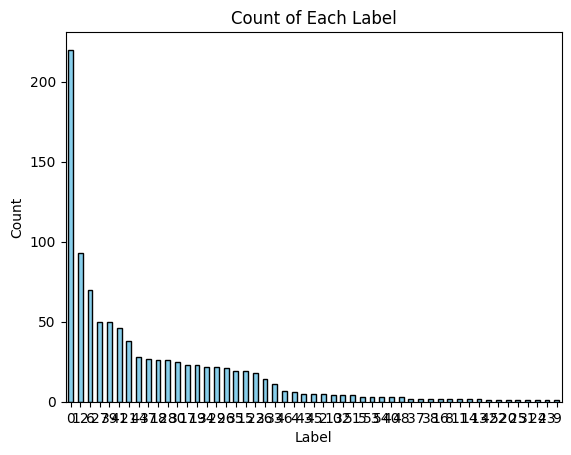

In [8]:
import matplotlib.pyplot as plt

# Count of each label
label_counts = df_no_duplicates['label'].value_counts()

# Plot bar graph
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Count of Each Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


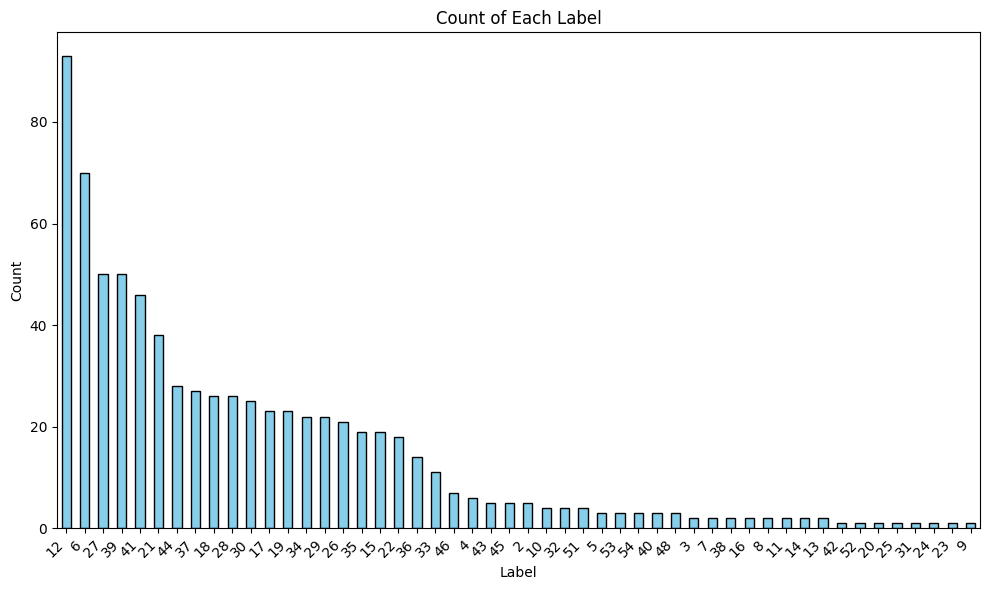

In [9]:

# Count of each label
label_counts = df_no_duplicates['label'].value_counts()
label_counts = label_counts[1:]

# Plot bar graph with adjusted width
plt.figure(figsize=(10, 6))  # Adjust the width and height of the figure
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Count of Each Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [ ]:
import re
from sympy import sympify, expand

def clean_latex(text):
    """
    Cleans the LaTeX formatted string by removing LaTeX commands and normalizing spaces.
    
    Args:
        text (str): The input string with LaTeX formatting.
    
    Returns:
        str: The cleaned string with LaTeX commands removed.
    """
    # Remove LaTeX commands like '\,' and other formatting commands
    cleaned_text = re.sub(r'\\[a-zA-Z]+\s*', '', text)  # Remove LaTeX commands (e.g. '\,', '\cdot', etc.)
    
    # Replace any remaining LaTeX spaces (e.g. \, becomes just a space)
    cleaned_text = re.sub(r'\\,', '', cleaned_text)  # Remove LaTeX space
    
    # Ensure multiplication is explicit (i.e., 3n -> 3*n)
    cleaned_text = re.sub(r'(\d)([a-zA-Z])', r'\1*\2', cleaned_text)  # Adds '*' between numbers and variables
    
    # Normalize spaces between terms
    cleaned_text = re.sub(r'\s+', '', cleaned_text)  # Remove any extra spaces
    
    return cleaned_text.strip()


def find_math_expressions(text):
    """
    Finds and returns all mathematical expressions of the form (x+y)(z+s),
    where x, y, z, and s can be any combination of variables or numbers.
    The operators '+' and '-' are supported.
    
    Args:
        text (str): The input string to search for expressions.

    Returns:
        list: A list of tuples containing the matching expressions.
    """
    pattern = r"\(([^()]+?)[\+\-]([^()]+?)\)\(([^()]+?)[\+\-]([^()]+?)\)"
    return re.findall(pattern, text)

def has_math_expression(text):
    """
    Checks if a mathematical expression of the form (x+y)(z+s) exists in the given text,
    where x, y, z, and s can be any combination of variables or numbers. Supports LaTeX formatting
    such as spaces or commands like '\,'.

    Args:
        text (str): The input string to search for expressions.

    Returns:
        bool: True if at least one matching expression is found, False otherwise.
    """
 # Remove LaTeX formatting like '\,' and handle spaces between terms
    cleaned_text = re.sub(r'\\[a-zA-Z]+\s*', '', text)  # Remove LaTeX commands (e.g. '\,', '\cdot')
    
    # Remove excessive spaces
    cleaned_text = re.sub(r'\s+', '', cleaned_text)  # Remove all spaces
    
    # Updated regex pattern for detecting expressions of the form (x+y)(z+s)
    pattern = r"\([^()]*?[\+\-][^()]*?\)\([^()]*?[\+\-][^()]*?\)"
    
    # Search for the pattern in the cleaned text
    return bool(re.search(pattern, cleaned_text))

# Example Usage
print(has_math_expression("(2\\,x + 4)\\,(2\\,x-4)"))  # Output: True

def expand_expression(text):
    """
    Expands a mathematical expression of the form (x+y)(z+s) using symbolic computation.

    Args:
        expression (str): The input mathematical expression as a string.

    Returns:
        str: The expanded expression as a string.
    """
    try:
        expression = clean_latex(text)  # Clean the LaTeX formatting before checking

        # Convert the input expression string to a symbolic expression
        symbolic_expr = sympify(expression)
        
        # Check if the expression is parsed correctly as a multiplication
        if symbolic_expr.is_Mul:  # Ensure it is a multiplication expression
            # Expand the symbolic expression
            expanded_expr = expand(symbolic_expr)
        else:
            return "Error: Expression is not in the expected form."
        
        # Return the expanded expression as a string
        return str(expanded_expr)
    except Exception as e:
        return f"Error: {e}"


False


In [15]:
import re

def has_math_expression(text):
    """
    Finds and returns all mathematical expressions of the form (x + y)(z + s),
    where x, y, z, and s can be any combination of variables or numbers.
    The operators '+' and '-' are supported.
    
    Args:
        text (str): The input string to search for expressions.

    Returns:
        list: A list of tuples containing the matching expressions.
    """
    # Regular expression to match (x + y)(z + s) patterns
    pattern1 = r"\(\(?\s*([a-zA-Z0-9]+)\s*[\+\-]\s*([a-zA-Z0-9]+)\s*\)?\s*\(?\s*([a-zA-Z0-9]+)\s*[\+\-]\s*([a-zA0-9]+)\s*\)?\)"
    pattern2 = r"\(\(?\s*([a-zA-Z0-9]+)\s*[\+\-]\s*([a-zA-Z0-9]+)\s*\)?\*\(?\s*([a-zA-Z0-9]+)\s*[\+\-]\s*([a-zA0-9]+)\s*\)?\)"
    res = bool(re.search(pattern1, text)) or bool(re.search(pattern2, text))
 
    
    #  Search for the pattern in the cleaned text
    return res


In [ ]:
# Test cases
print(has_math_expression("Some examples: (a+b)(c+d)"))     # Output: True
print(has_math_expression("No matching expressions here!")) # Output: False
print(has_math_expression("(x+2)(3x-4) is valid"))           # Output: True
print(has_math_expression("Nested: ((a+b)(c+d))"))          # Output: False


True
False
True
False


In [55]:
import re

def find_math_expressions(text):
    """
    Finds and returns all mathematical expressions in LaTeX format, such as:
    (x + y)(z + s), ((x + y)(z + s)), or their LaTeX equivalents.
    
    Args:
        text (str): The input string to search for LaTeX expressions.

    Returns:
        list: A list of tuples containing the matching expressions.
    """
    # Regular expression to match LaTeX formatted expressions:
    # e.g., \left( a + b \right) \left( c + d \right)
    pattern = r"\\left\(\s*([a-zA-Z0-9]+)\s*[\+\-]\s*([a-zA-Z0-9]+)\s*\\right\)\s*\\left\(\s*([a-zA-Z0-9]+)\s*[\+\-]\s*([a-zA-Z0-9]+)\s*\\right\)"
    
    # Find all matches in the text
    matches = re.findall(pattern, text)
    
    return matches

def has_math_expression(text):
    """
    Checks if the given LaTeX formatted text contains a valid mathematical expression,
    such as (x + y)(z + s) or ((x + y)(z + s)).
    
    Args:
        text (str): The input string to search for LaTeX expressions.

    Returns:
        bool: True if a valid LaTeX expression is found, False otherwise.
    """
    # Use the same regex pattern to search for expressions
     # Regular expression to match (x + y)(z + s) patterns
    pattern1 = r"\(\(?\s*([a-zA-Z0-9]+)\s*[\+\-]\s*([a-zA-Z0-9]+)\s*\)?\s*\(?\s*([a-zA-Z0-9]+)\s*[\+\-]\s*([a-zA0-9]+)\s*\)?\)"
    pattern2 = r"\(\(?\s*([a-zA-Z0-9]+)\s*[\+\-]\s*([a-zA-Z0-9]+)\s*\)?\*\(?\s*([a-zA-Z0-9]+)\s*[\+\-]\s*([a-zA0-9]+)\s*\)?\)"

    pattern1 = r"\\left\(\s*([a-zA-Z0-9]+)\s*[\+\-\\cdot]\s*([a-zA-Z0-9]+)\s*\\right\)\s*\\left\(\s*([a-zA-Z0-9]+)\s*\\s*([a-zA-Z0-9]+)\s*\\right\)"
    pattern2 = r"\\left\(\s*([a-zA-Z0-9]+)\s*[\+\-\\cdot]\s*([a-zA-Z0-9]+)\s*\\right\)\s*\\left\(\s*([a-zA-Z0-9]+)\s*\\cdot\s*([a-zA-Z0-9]+)\s*\\right\)"
    pattern3 = r"\\left\(\s*([a-zA-Z0-9]+)\s*[\+\-\\cdot]\s*([a-zA-Z0-9]+)\s*\\right\)\s*\\left\(\s*([a-zA-Z0-9]+)\*\s*([a-zA-Z0-9]+)\s*\\right\)"

    
    # Search for matches
    matches1 = re.findall(pattern1, text)
    matches2 = re.findall(pattern2, text)
    matches3 = re.findall(pattern3, text)
    
    # Return True if any match is found, else False
    return len(matches1) > 0 or len(matches2) > 0 or len(matches3) > 0


In [56]:
text1 = "\\left( a + b \\right) \\left( c + d \\right)"
print(has_math_expression(text1)) 

False


In [ ]:
def has_math_expression(text):
    """
    Checks if the given LaTeX formatted text contains a valid mathematical expression,
    such as (x + y)(z + s) or ((x + y)(z + s)).
    
    Args:
        text (str): The input string to search for LaTeX expressions.

    Returns:
        bool: True if a valid LaTeX expression is found, False otherwise.
    """
    # Use the same regex pattern to search for expressions
     # Regular expression to match (x + y)(z + s) patterns
    pattern1 = r"\(\(?\s*([a-zA-Z0-9]+)\s*[\+\-]\s*([a-zA-Z0-9]+)\s*\)?\s*\(?\s*([a-zA-Z0-9]+)\s*[\+\-]\s*([a-zA0-9]+)\s*\)?\)"
    pattern2 = r"\(\(?\s*([a-zA-Z0-9]+)\s*[\+\-]\s*([a-zA-Z0-9]+)\s*\)?\*\(?\s*([a-zA-Z0-9]+)\s*[\+\-]\s*([a-zA0-9]+)\s*\)?\)"

    pattern1 = r"\\left\(\s*([a-zA-Z0-9]+)\s*[\+\-\\cdot]\s*([a-zA-Z0-9]+)\s*\\right\)\s*\\left\(\s*([a-zA-Z0-9]+)\s*\\s*([a-zA-Z0-9]+)\s*\\right\)"
    pattern2 = r"\\left\(\s*([a-zA-Z0-9]+)\s*[\+\-\\cdot]\s*([a-zA-Z0-9]+)\s*\\right\)\s*\\left\(\s*([a-zA-Z0-9]+)\s*\\cdot\s*([a-zA-Z0-9]+)\s*\\right\)"
    pattern3 = r"\\left\(\s*([a-zA-Z0-9]+)\s*[\+\-\\cdot]\s*([a-zA-Z0-9]+)\s*\\right\)\s*\\left\(\s*([a-zA-Z0-9]+)\*\s*([a-zA-Z0-9]+)\s*\\right\)"

    
    # Search for matches
    matches1 = re.findall(pattern1, text)
    matches2 = re.findall(pattern2, text)
    matches3 = re.findall(pattern3, text)
    
    # Return True if any match is found, else False
    return len(matches1) > 0 or len(matches2) > 0 or len(matches3) > 0
# Test case 1: Basic case with LaTeX formatted (x + y)(z + s)
text1 = "\\left( a + b \\right) \\left( c + d \\right)"
print(has_math_expression(text1))  # Expected: True
print(find_math_expressions(text1))  # Expected: [('a', 'b', 'c', 'd')]

# Test case 2: Nested expression with LaTeX
text2 = "Nested: \\left( \\left( a + b \\right) \\left( c + d \\right) \\right)"
print(has_math_expression(text2))  # Expected: True
print(find_math_expressions(text2))  # Expected: [('a', 'b', 'c', 'd')]

# Test case 3: LaTeX with addition and subtraction
text3 = "\\left( x - y \\right) \\left( z + w \\right)"
print(has_math_expression(text3))  # Expected: True
print(find_math_expressions(text3))  # Expected: [('x', 'y', 'z', 'w')]

# Test case 4: LaTeX with numbers
text4 = "\\left( 2 + 3 \\right) \\left( 4 + 5 \\right)"
print(has_math_expression(text4))  # Expected: True
print(find_math_expressions(text4))  # Expected: [('2', '3', '4', '5')]

# Test case 5: LaTeX expression with extra spaces
text5 = "\\left( a  +  b \\right) * \\left(  c  +  d \\right)"
print(has_math_expression(text5))  # Expected: True
print(find_math_expressions(text5))  # Expected: [('a', 'b', 'c', 'd')]

# Test case 6: LaTeX expression with nested parentheses and multiplication
text6 = "\\left( \\left( a + b \\right) * \\left( c + d \\right) \\right)"
print(6, has_math_expression(text6))  # Expected: True
print(find_math_expressions(text6))  # Expected: [('a', 'b', 'c', 'd')]

# Test case 7: Invalid expression (no matching pattern)
text7 = "This is just text without LaTeX math expressions"
print(has_math_expression(text7))  # Expected: False
print(find_math_expressions(text7))  # Expected: []

# Test case 8: Multiple LaTeX valid expressions in a string
text8 = "This is \\left( a + b \\right) \\left( c + d \\right) and \\left( x - y \\right) \\left( z + w \\right)"
print(has_math_expression(text8))  # Expected: True
print(find_math_expressions(text8))  # Expected: [('a', 'b', 'c', 'd'), ('x', 'y', 'z', 'w')]

# Test case 9: Complex LaTeX expression with mixed operators and spacing
text9 = "\\left( xxda + b \\right) \\left( x - y \\right) \\left( \\left( z + w \\right) + \\left( p - q \\right) \\right)"
print(has_math_expression(text9))  # Expected: True
print(find_math_expressions(text9))  # Expected: [('a', 'b', 'x', 'y'), ('z', 'w', 'p', 'q')]

# Test case 10: LaTeX expression with subtraction only (no valid pattern)
text10 = "a - b"
print(has_math_expression(text10))  # Expected: False
print(find_math_expressions(text10))  # Expected: []


False
[('a', 'b', 'c', 'd')]
False
[('a', 'b', 'c', 'd')]
False
[('x', 'y', 'z', 'w')]
False
[('2', '3', '4', '5')]
False
[]
6 False
[]
False
[]
False
[('a', 'b', 'c', 'd'), ('x', 'y', 'z', 'w')]
False
[('xxda', 'b', 'x', 'y')]
False
[]


: 

In [32]:
display(Latex(f"${text6}$"))

<IPython.core.display.Latex object>

In [ ]:

# Example Usage
def check_expression(text):
    cleaned_text = clean_latex(text)  # Clean the LaTeX formatting before checking
    return has_math_expression(cleaned_text)


# Test cases
print(check_expression("(2\\,x + 4)\\,(2\\,x-4)"))  # Output: True
print(check_expression("(a+b)(c+d)"))              # Output: True
print(check_expression("(x+2)(3x-4) is valid"))    # Output: True
print(check_expression("(x+2)\\,(3x-4)"))          # Output: True
print(check_expression("Some text without expressions"))  # Output: False

True
True
True
True
False


In [ ]:

df_no_duplicates['has_()()_expression'] = df_no_duplicates['t0'].apply(has_math_expression)


    
        
    

ValueError: Columns must be same length as key

In [71]:
df.iloc[2][['t0','t1','solution_expression']]

t0                              (3\,n-4\,k)\,(3\,n + 4\,k)
t1                                          9\,n^{2}-16\,k
solution_expression    Error: 'Add' object is not callable
Name: 2, dtype: object

In [76]:
print(expand_expression("(3\\,n - 4\\,k)\\,(3\\,n + 4\\,k)"))  # Output: 9*n**2 - 12*n*k + 12*n*k - 16*k**2
print(expand_expression("(x+2)(3x-4)"))  

Error: 'Add' object is not callable
Error: 'Add' object is not callable


In [73]:
# Test cases
print(expand_expression("(3\,n-4\,k)\,(3\,n + 4\,k)"))          # Output: 3*x**2 + 2*x - 8



Error: 'Add' object is not callable


In [82]:
print(df[df['has_()()_expression'] == True]['id'].to_list())

[2, 3, 25, 28, 35, 36, 42, 43, 47, 94, 125, 126, 128, 129, 130, 142, 143, 150, 151, 153, 159, 160, 162, 163, 164, 165, 166, 200, 204, 208, 213, 214, 215, 216, 217, 223, 224, 225, 226, 250, 252, 254, 263, 264, 265, 272, 293, 342, 368, 369, 439, 440, 441, 465, 466, 468, 469, 490, 497, 508, 514, 517, 523, 547, 549, 552, 555, 556, 557, 558, 561, 563, 565, 566, 610, 629, 632, 634, 641, 643, 645, 647, 649, 662, 699, 700, 708, 737, 741, 742, 797, 798, 892, 908, 915, 922, 923, 980, 981, 982, 1035, 1036, 1042, 1068, 1088, 1089, 1090, 1114, 1115, 1116, 1117, 1118, 1119, 1122, 1123, 1124, 1125, 1126, 1127, 1130, 1131, 1132, 1139, 1153, 1161, 1162, 1167, 1168, 1169, 1174, 1232, 1242, 1249, 1269, 1270, 1271, 1275, 1276, 1277, 1282, 1286, 1288, 1290, 1305, 1331, 1332, 1360, 1363, 1373, 1379, 1382, 1383, 1385, 1393, 1400, 1401, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1441, 1442, 1460, 1473, 1474, 1493, 1496, 1499, 1500, 1511, 1559, 1560, 1625, 1661, 1663, 1665, 1686, 1

In [40]:
df

,id,category,assumptions,t0,t1,label,has_()()_expression
0,1,2,\textrm{wahr},\left| \begin{array}{cc}a + 7& 7\\2& 4\end{arr...,"4\,(a + 7) + 2 \cdot 7 = -4",0,False
1,2,1,\textrm{wahr},"(2\,x + 4)\,(2\,x-4)","4\,x-16",3,False
2,3,1,\textrm{wahr},"(3\,n-4\,k)\,(3\,n + 4\,k)","9\,n^{2}-16\,k",3,False
3,4,1,\textrm{wahr},"-4\,l\,b + \frac{4\,b^{2}}{b^{2}-l\,b}","\frac{4\,(b^{2}-l\,b)}{b^{2}-l\,b}",0,False
4,5,1,\textrm{wahr},"-\frac{4\,l\,b}{b^{2}-l\,b} + \frac{4\,b^{2}}{...","-4\,l\,b + \frac{4\,b^{2}}{b^{2}-l\,b}",0,False
...,...,...,...,...,...,...,...
1415,1995,2,\textrm{wahr},"8\,z^{2} + 16\,z + 8 = 0","z + 2\,z + 1 = 0^{16\,z}",34,False
1416,1996,2,\textrm{wahr},"-8\,z^{2}-8\,z + 8\,z + 8 = 0","8\,z^{2} + 16\,z + 8 = 0",13,False
1417,1997,2,\textrm{wahr},"8\,z^{2} + 16\,z + 8 = 0","z + 2\,z + 1 = 0^{16\,z}",0,False
1418,1998,2,\textrm{wahr},"-8\,z^{2} = -8","z + 2\,z + 1 = 0^{16\,z}",0,False


In [41]:
has_math_expression("(2\,x + 4)\,(2\,x-4)")

False

In [44]:
# Test cases with LaTeX formatting
print(has_math_expression("(2\\,x + 4)\\,(2\\,x-4)"))   # Output: True
print(has_math_expression("(a+b)(c+d)"))               # Output: True
print(has_math_expression("(x+2)(3x-4) is valid"))     # Output: True
print(has_math_expression("(x+2)\\,(3x-4)"))           # Output: True
print(has_math_expression("Some text without expressions"))  # Output: False


False
True
True
False
False
